In [1]:
pip install --upgrade pip

In [1]:
pip install tensorflow

  Using cached numpy-1.24.3-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.3-cp38-cp38-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
libfmp 1.2.2 requires pandas<2.0.0,>=1.0.0, but you have pandas 2.0.3 which is incompatible.
scipy 1.6.2 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.3 which is incompatible.


In [1]:
pip install --upgrade numpy

  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
libfmp 1.2.2 requires pandas<2.0.0,>=1.0.0, but you have pandas 2.0.3 which is incompatible.
scipy 1.6.2 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.4 which is incompatible.
tensorflow-intel 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.24.4 which is incompatible.


In [1]:
import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([1000, 1000])))

C:\Users\Juan\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


tf.Tensor(-855.188, shape=(), dtype=float32)


In [2]:
# Librerías necesarias
from random import seed  # Para inicializar el generador de números aleatorios
from random import randrange  # Para generar números aleatorios dentro de un rango
from csv import reader  # Para leer y analizar archivos CSV


#from google.colab import drive
import pandas as pd
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Activation


import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import VarianceThreshold
import os
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, export_graphviz
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
import ipywidgets as widgets
from IPython.display import display
from datetime import timedelta
from scipy.spatial.distance import euclidean
import sys
from matplotlib.lines import Line2D
import pickle
from scipy.spatial.distance import cdist


from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import math
#from ctgan import CTGAN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import joblib


from sklearn.model_selection import StratifiedKFold

from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy
from keras.callbacks import EarlyStopping


import matplotlib.pyplot as plt
import time
import gc

from sklearn.metrics import confusion_matrix

import pickle

from sklearn.metrics import accuracy_score

import pandas as pd
import matplotlib.pyplot as plt






from sklearn.metrics import recall_score, confusion_matrix
import seaborn as sns


In [3]:
import os
print("Número de núcleos de CPU disponibles:", os.cpu_count())

Número de núcleos de CPU disponibles: 16


In [4]:
def reproducibilidad():
    # Numpy
    np.random.seed(3)

    # Python Random
    random.seed(3)

    # Tensorflow
    tf.random.set_seed(3)


def experimentosMLP(df_red_neuronal, nombre_archivo):
    reproducibilidad()

    modelos = {}

    skf = StratifiedKFold(n_splits=10, shuffle=True)

    X = df_red_neuronal.drop(labels='IMECA_Total', axis=1).values
    Y = df_red_neuronal['IMECA_Total'].values

    tiempo_inicio = time.time()  # Tiempo de inicio

    acc_promedio = 0.0  # Variable para acumular la precisión de cada modelo
    i=1
    for train_index, test_index in skf.split(X, Y):
        dim_entrada = X.shape[1]
        dim_salida = 4  # Número de clases
        na = ((2/3) * dim_entrada) + (dim_salida)
        na = math.trunc(na)

        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]

        modelo = Sequential()
        modelo.add(Dense(na, input_dim=dim_entrada, activation='tanh'))
        modelo.add(Dense(na/2, activation='tanh'))
        modelo.add(Dense(dim_salida, activation='softmax'))

        modelo.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=[categorical_accuracy])

        # Ajustar los índices de las clases para estar en el rango de 0 a 3
        Y_train_onehot = to_categorical(Y_train - 1, num_classes=dim_salida)
        Y_test_onehot = to_categorical(Y_test - 1, num_classes=dim_salida)

        history = modelo.fit(X_train, Y_train_onehot, validation_data=(X_test, Y_test_onehot), batch_size=50, epochs=50, 
                             shuffle=True, verbose=1, workers=14, callbacks=[EarlyStopping(monitor='categorical_accuracy', patience=3)])
                                #Originalmente shuffle es False
        modelos['modelo_prueba_kfold_' + str(len(modelos) + 1)] = modelo

        _, acc = modelo.evaluate(X_test, Y_test_onehot)  # Obtenemos la precisión del modelo
        acc_promedio += acc  # Acumulamos la precisión


        print('####\tResultado del Modelo K-Fold\t####', i)

        print(modelo.evaluate(X_test, Y_test_onehot))
        i=i+1
    tiempo_fin = time.time()  # Tiempo de finalización
    tiempo_total = tiempo_fin - tiempo_inicio  # Tiempo total

    acc_promedio /= 10  # Calculamos el promedio de la precisión

    print("Tiempo total:", tiempo_total)
    print("Promedio de categorical_accuracy:", acc_promedio)

    ruta_modelos ='Segundo_Modelo_neuronal_'+ nombre_archivo + '.pkl'
    with open(ruta_modelos, 'wb') as archivo:
        pickle.dump(modelos, archivo)


    # Liberar la memoria de los objetos que ya no se necesitan
    del modelos
    del skf
    del X
    del Y

    gc.collect()

    return tiempo_total, acc_promedio




def cargar_modelos(ruta_modelos):
    with open(ruta_modelos, 'rb') as archivo:
        modelos = pickle.load(archivo)
    return modelos

def evaluar_modelo(modelo, X_test, y_test):
    # Evaluar el modelo en los datos de prueba
    y_pred = modelo.predict(X_test)
    
    # Convertir las predicciones a etiquetas si es necesario
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred_labels = np.argmax(y_pred, axis=1) + 1
    else:
        y_pred_labels = y_pred.astype(int)
    
    # Calcular el recall para la clase 4
    recall_clase_4 = recall_score(y_test, y_pred_labels, labels=[4], average='micro')
    return recall_clase_4, y_pred_labels


#modificar la ruta para guardar los modelos de las redes neuronales

# DataFrame Normal

In [13]:
TIMES1 = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES1)

df_normalizado1['TIMESTAMP'] = pd.to_datetime(df_normalizado1['TIMESTAMP'])

df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)

df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA-_Total'].replace(5, 4)

num_columnas1 = df_red_neuronal1.shape[1]

print("Número de columnas:", num_columnas1)

Número de columnas: 24


In [14]:
Tiempo, accuracy= experimentosMLP(df_red_neuronal1, nombre_archivo='Normal_Completo')
print(Tiempo, accuracy)

Epoch 1/50
17942/17942 [==============================] - 13s 679us/step - loss: 0.3387 - categorical_accuracy: 0.9040 - val_loss: 0.3224 - val_categorical_accuracy: 0.9048
Epoch 2/50
17942/17942 [==============================] - 12s 664us/step - loss: 0.3169 - categorical_accuracy: 0.9051 - val_loss: 0.3114 - val_categorical_accuracy: 0.9058
Epoch 3/50
17942/17942 [==============================] - 12s 672us/step - loss: 0.3087 - categorical_accuracy: 0.9056 - val_loss: 0.3066 - val_categorical_accuracy: 0.9061
Epoch 4/50
17942/17942 [==============================] - 12s 666us/step - loss: 0.3032 - categorical_accuracy: 0.9061 - val_loss: 0.2998 - val_categorical_accuracy: 0.9068
Epoch 5/50
17942/17942 [==============================] - 12s 667us/step - loss: 0.2995 - categorical_accuracy: 0.9066 - val_loss: 0.2961 - val_categorical_accuracy: 0.9073
Epoch 6/50
17942/17942 [==============================] - 12s 672us/step - loss: 0.2968 - categorical_accuracy: 0.9069 - val_loss: 0.29

Epoch 1/50
17942/17942 [==============================] - 13s 677us/step - loss: 0.3392 - categorical_accuracy: 0.9042 - val_loss: 0.3247 - val_categorical_accuracy: 0.9046
Epoch 2/50
17942/17942 [==============================] - 12s 669us/step - loss: 0.3165 - categorical_accuracy: 0.9051 - val_loss: 0.3106 - val_categorical_accuracy: 0.9053
Epoch 3/50
17942/17942 [==============================] - 12s 672us/step - loss: 0.3074 - categorical_accuracy: 0.9059 - val_loss: 0.3058 - val_categorical_accuracy: 0.9058
Epoch 4/50
17942/17942 [==============================] - 12s 671us/step - loss: 0.3025 - categorical_accuracy: 0.9063 - val_loss: 0.3043 - val_categorical_accuracy: 0.9060
Epoch 5/50
17942/17942 [==============================] - 12s 668us/step - loss: 0.2993 - categorical_accuracy: 0.9066 - val_loss: 0.2986 - val_categorical_accuracy: 0.9068
Epoch 6/50
17942/17942 [==============================] - 12s 672us/step - loss: 0.2971 - categorical_accuracy: 0.9067 - val_loss: 0.29

17942/17942 [==============================] - 12s 657us/step - loss: 0.2837 - categorical_accuracy: 0.9091 - val_loss: 0.2848 - val_categorical_accuracy: 0.9093
Epoch 24/50
17942/17942 [==============================] - 12s 664us/step - loss: 0.2833 - categorical_accuracy: 0.9093 - val_loss: 0.2816 - val_categorical_accuracy: 0.9097
Epoch 25/50
17942/17942 [==============================] - 12s 667us/step - loss: 0.2828 - categorical_accuracy: 0.9094 - val_loss: 0.2820 - val_categorical_accuracy: 0.9098
Epoch 26/50
17942/17942 [==============================] - 12s 671us/step - loss: 0.2824 - categorical_accuracy: 0.9095 - val_loss: 0.2828 - val_categorical_accuracy: 0.9092
Epoch 27/50
17942/17942 [==============================] - 12s 678us/step - loss: 0.2821 - categorical_accuracy: 0.9094 - val_loss: 0.2813 - val_categorical_accuracy: 0.9096
Epoch 28/50
17942/17942 [==============================] - 12s 668us/step - loss: 0.2817 - categorical_accuracy: 0.9096 - val_loss: 0.2842 - v

Epoch 2/50
17942/17942 [==============================] - 13s 703us/step - loss: 0.3179 - categorical_accuracy: 0.9051 - val_loss: 0.3141 - val_categorical_accuracy: 0.9054
Epoch 3/50
17942/17942 [==============================] - 13s 698us/step - loss: 0.3105 - categorical_accuracy: 0.9058 - val_loss: 0.3089 - val_categorical_accuracy: 0.9061
Epoch 4/50
17942/17942 [==============================] - 12s 670us/step - loss: 0.3062 - categorical_accuracy: 0.9064 - val_loss: 0.3053 - val_categorical_accuracy: 0.9068
Epoch 5/50
17942/17942 [==============================] - 12s 686us/step - loss: 0.3031 - categorical_accuracy: 0.9070 - val_loss: 0.3042 - val_categorical_accuracy: 0.9065
Epoch 6/50
17942/17942 [==============================] - 12s 675us/step - loss: 0.3009 - categorical_accuracy: 0.9073 - val_loss: 0.3008 - val_categorical_accuracy: 0.9068
Epoch 7/50
17942/17942 [==============================] - 12s 670us/step - loss: 0.2992 - categorical_accuracy: 0.9074 - val_loss: 0.30

17942/17942 [==============================] - 12s 674us/step - loss: 0.2894 - categorical_accuracy: 0.9079 - val_loss: 0.2889 - val_categorical_accuracy: 0.9080
Epoch 13/50
17942/17942 [==============================] - 12s 669us/step - loss: 0.2889 - categorical_accuracy: 0.9080 - val_loss: 0.2896 - val_categorical_accuracy: 0.9080
Epoch 14/50
17942/17942 [==============================] - 12s 673us/step - loss: 0.2884 - categorical_accuracy: 0.9080 - val_loss: 0.2892 - val_categorical_accuracy: 0.9080
Epoch 15/50
17942/17942 [==============================] - 12s 673us/step - loss: 0.2879 - categorical_accuracy: 0.9080 - val_loss: 0.2889 - val_categorical_accuracy: 0.9076
Epoch 16/50
17942/17942 [==============================] - 12s 665us/step - loss: 0.2875 - categorical_accuracy: 0.9080 - val_loss: 0.2901 - val_categorical_accuracy: 0.9076
Epoch 17/50
17942/17942 [==============================] - 12s 683us/step - loss: 0.2870 - categorical_accuracy: 0.9082 - val_loss: 0.2866 - v

In [15]:
df_rendimiento_Smote = pd.DataFrame({'Num_Características': 24,'Tiempo_Total': Tiempo, 'Accuracy_Promedio': accuracy}, index=[24])
    #'Num_Características': num_características,'Tiempo_Total': tiempo_total_lista, 'Accuracy_Promedio': acc_promedio_lista})

guardar_rendimiento = 'AaccuracyTime_Normal_Completo.csv'
df_rendimiento_Smote.to_csv(guardar_rendimiento, index=True)

## Información de los mejores k-folds de data completo normal 


In [13]:
# Cargar los datos
TIMES1 = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES1)

df_normalizado1['TIMESTAMP'] = pd.to_datetime(df_normalizado1['TIMESTAMP'])
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2', 'PM25', 'NO2', 'CO', 'Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']


ruta_modelos = 'Modelo_neuronal_Normal_Completo.pkl'#'Modelo_neuronal_Normal_Completo.pkl'
modelos_kfold = cargar_modelos(ruta_modelos)

mejor_recall = -1
mejor_modelo = None
mejor_kfold = None

# Evaluar cada uno de los modelos k-fold
for nombre_modelo, modelo in modelos_kfold.items():
    recall_clase_4, _ = evaluar_modelo(modelo, X_test, y_test)
    
    if recall_clase_4 > mejor_recall:
        mejor_recall = recall_clase_4
        mejor_modelo = modelo
        mejor_kfold = nombre_modelo

# Guardar la información del mejor modelo en un archivo CSV
if mejor_modelo:
    mejores_modelos_info = {
        'Mejor_KFold': [mejor_kfold],
        'Mejor_Recall_Clase_4': [mejor_recall]
    }

    df_mejor_modelo = pd.DataFrame(mejores_modelos_info)
    df_mejor_modelo.to_csv('Aa_Mejores_Modelos_CCOMPLETO_CLASE4.csv', index=False)

    print(f"El mejor modelo es {mejor_kfold} con un recall de la clase 4 de {mejor_recall:.4f}.")
else:
    print("No se encontró un modelo válido.")

62298/62298 [==============================] - 30s 478us/step
El mejor modelo es modelo_prueba_kfold_5 con un recall de la clase 4 de 0.0872.


In [10]:
print(type(modelos_kfold))
for i, modelo in enumerate(modelos_kfold):
    print(f"Modelo {i}: {type(modelo)}")


<class 'dict'>
Modelo 0: <class 'str'>
Modelo 1: <class 'str'>
Modelo 2: <class 'str'>
Modelo 3: <class 'str'>
Modelo 4: <class 'str'>
Modelo 5: <class 'str'>
Modelo 6: <class 'str'>
Modelo 7: <class 'str'>
Modelo 8: <class 'str'>
Modelo 9: <class 'str'>


# DataFrame Varianza

# SEGUNDA PRUEBA DE LOS MEJORES DE LA CLASE 4

In [44]:
# Cargar características seleccionadas
seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['Varianza'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')

# Cargar y preparar los datos
TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']

# Definir las rutas de los modelos
base_nombre = 'Modelo_neuronal_Varianza_con_'
ext_nombre = '_caracteristicas.pkl'
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in range(23, 1, -1)]

mejores_modelos = []
matrices_confusion = []

for ruta in rutas_modelos:
    print('ruta', ruta)
    if len(caracteristicas_seleccionadas) == 1:
        break

    caracteristicas_seleccionadas.pop()
    print('características seleccionadas')
    print(caracteristicas_seleccionadas)

    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    predicciones_mejor_modelo = None
    i = 1
    for nombre_modelo, modelo in modelos_cargados.items():
        rendimiento, y_pred_labels = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {i} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        
        if predicciones_mejor_modelo is None or rendimiento > rendimientos[mejor_modelo]:
            mejor_modelo = nombre_modelo
            predicciones_mejor_modelo = y_pred_labels
        
        i += 1
        print(' ')
    
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con un recall de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    # Guardar información del mejor modelo
    mejores_modelos.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, predicciones_mejor_modelo)

    # Imprimir la matriz de confusión
    print(f"Matriz de Confusión para el modelo en {ruta}:")
    print(cm)

    # Guardar la matriz de confusión
    matrices_confusion.append({
        'Ruta': ruta,
        'Confusion_Matrix': cm
    })

# Guardar los mejores modelos en un CSV
df_mejores_modelos = pd.DataFrame(mejores_modelos)
df_mejores_modelos.to_csv('Aa_Mejores_Modelos_Varianza_SEGUNDO_clase4.csv', index=False)
print("Los mejores modelos se han guardado en 'Aa_Mejores_Modelos_Varianza_SEGUNDO_clase4.csv'.")




ruta Modelo_neuronal_Varianza_con_23_caracteristicas.pkl
características seleccionadas
['IMECA_Total', 'Wind_Direction_Std', 'Irradiation_Tot', 'Irradiance_Avg', 'Wind_Direction_SMM', 'Pot_Irradiance_Avg', 'RH_Avg', 'Wind_Speed_Avg', 'Wind_Speed_Max', 'Sun_Hrs_Tot', 'Wind_Direction_Avg', 'Wind_Speed_Std', 'T_amb_Avg', 'Heat_Inedx_Avg', 'Wind_Chill_Avg', 'BattV_Min', 'T_Wet_Bulb_Avg', 'T_amb_Max', 'Dew_Point_Avg', 'P_Sat_vap_Avg', 'P_atm_q', 'T_amb_Min', 'T_air']
62298/62298 [==============================] - 30s 480us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.004774966981611298
 
62298/62298 [==============================] - 30s 481us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.021741339022655695
 
62298/62298 [==============================] - 30s 477us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0

62298/62298 [==============================] - 32s 519us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0
 
62298/62298 [==============================] - 33s 523us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0
 
62298/62298 [==============================] - 32s 518us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0013207355481052526
 
62298/62298 [==============================] - 32s 517us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.0
 
62298/62298 [==============================] - 32s 517us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.011480239764299502
 
62298/62298 [==============================] - 32s 520us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento 

62298/62298 [==============================] - 32s 516us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es: 0.0
 
62298/62298 [==============================] - 33s 526us/step
Acabé 7 veces con el modelo modelo_prueba_kfold_7.
Rendimiento del modelo modelo_prueba_kfold_7 es: 0.0
 
62298/62298 [==============================] - 32s 519us/step
Acabé 8 veces con el modelo modelo_prueba_kfold_8.
Rendimiento del modelo modelo_prueba_kfold_8 es: 0.0
 
62298/62298 [==============================] - 32s 512us/step
Acabé 9 veces con el modelo modelo_prueba_kfold_9.
Rendimiento del modelo modelo_prueba_kfold_9 es: 0.016966372041044397
 
62298/62298 [==============================] - 32s 514us/step
Acabé 10 veces con el modelo modelo_prueba_kfold_10.
Rendimiento del modelo modelo_prueba_kfold_10 es: 0.0
 
El mejor modelo para Modelo_neuronal_Varianza_con_17_caracteristicas.pkl es: modelo_prueba_kfold_9
Con un recall de: 0.016966372041044397
 


62298/62298 [==============================] - 31s 503us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.004673371939449355
 
62298/62298 [==============================] - 32s 505us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0
 
62298/62298 [==============================] - 31s 496us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0
 
62298/62298 [==============================] - 31s 492us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.0
 
62298/62298 [==============================] - 31s 499us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.0
 
62298/62298 [==============================] - 30s 486us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_

62298/62298 [==============================] - 32s 518us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0
 
62298/62298 [==============================] - 33s 529us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.0
 
62298/62298 [==============================] - 32s 520us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.0
 
62298/62298 [==============================] - 32s 516us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es: 0.0
 
62298/62298 [==============================] - 32s 520us/step
Acabé 7 veces con el modelo modelo_prueba_kfold_7.
Rendimiento del modelo modelo_prueba_kfold_7 es: 0.0
 
62298/62298 [==============================] - 33s 530us/step
Acabé 8 veces con el modelo modelo_prueba_kfold_8.
Rendimiento del modelo modelo_prueba_kfold_8 es

62298/62298 [==============================] - 34s 546us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0
 
62298/62298 [==============================] - 34s 542us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0
 
62298/62298 [==============================] - 34s 549us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0
 
62298/62298 [==============================] - 34s 537us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.0
 
62298/62298 [==============================] - 34s 543us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.0
 
62298/62298 [==============================] - 34s 546us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es

62298/62298 [==============================] - 34s 544us/step


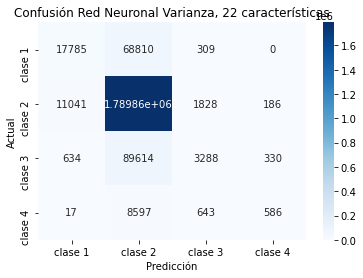

Confusión Red Neuronal Varianza, 22 características:
[[  17785   68810     309       0]
 [  11041 1789864    1828     186]
 [    634   89614    3288     330]
 [     17    8597     643     586]]
62298/62298 [==============================] - 34s 544us/step


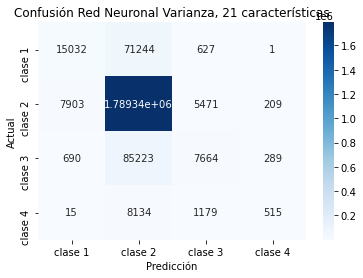

Confusión Red Neuronal Varianza, 21 características:
[[  15032   71244     627       1]
 [   7903 1789336    5471     209]
 [    690   85223    7664     289]
 [     15    8134    1179     515]]
62298/62298 [==============================] - 34s 543us/step


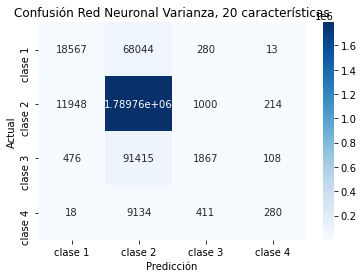

Confusión Red Neuronal Varianza, 20 características:
[[  18567   68044     280      13]
 [  11948 1789757    1000     214]
 [    476   91415    1867     108]
 [     18    9134     411     280]]
62298/62298 [==============================] - 34s 544us/step


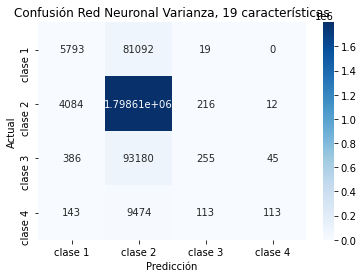

Confusión Red Neuronal Varianza, 19 características:
[[   5793   81092      19       0]
 [   4084 1798607     216      12]
 [    386   93180     255      45]
 [    143    9474     113     113]]
62298/62298 [==============================] - 34s 541us/step


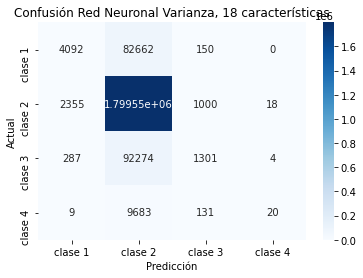

Confusión Red Neuronal Varianza, 18 características:
[[   4092   82662     150       0]
 [   2355 1799546    1000      18]
 [    287   92274    1301       4]
 [      9    9683     131      20]]
62298/62298 [==============================] - 33s 533us/step


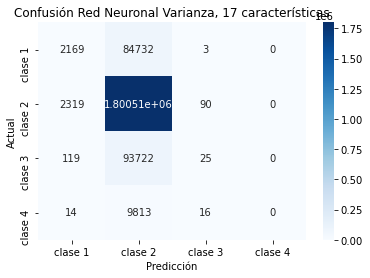

Confusión Red Neuronal Varianza, 17 características:
[[   2169   84732       3       0]
 [   2319 1800510      90       0]
 [    119   93722      25       0]
 [     14    9813      16       0]]
62298/62298 [==============================] - 33s 533us/step


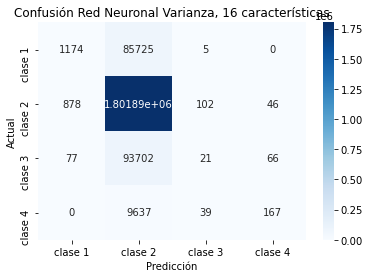

Confusión Red Neuronal Varianza, 16 características:
[[   1174   85725       5       0]
 [    878 1801893     102      46]
 [     77   93702      21      66]
 [      0    9637      39     167]]
62298/62298 [==============================] - 35s 558us/step


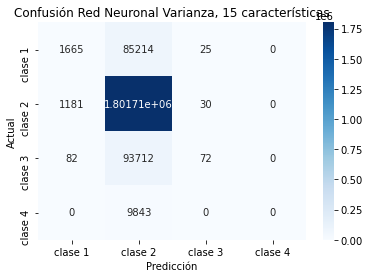

Confusión Red Neuronal Varianza, 15 características:
[[   1665   85214      25       0]
 [   1181 1801708      30       0]
 [     82   93712      72       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 34s 538us/step


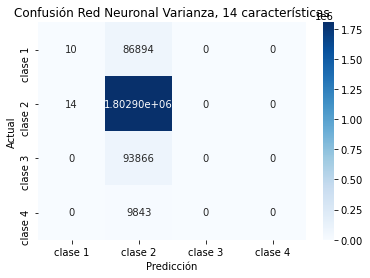

Confusión Red Neuronal Varianza, 14 características:
[[     10   86894       0       0]
 [     14 1802905       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 33s 526us/step


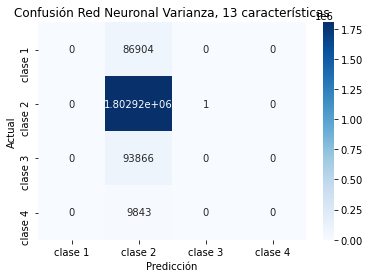

Confusión Red Neuronal Varianza, 13 características:
[[      0   86904       0       0]
 [      0 1802918       1       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 30s 488us/step


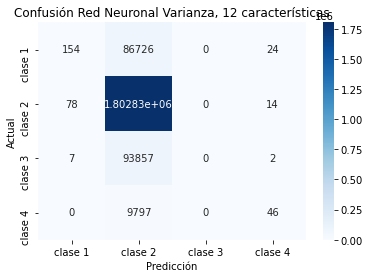

Confusión Red Neuronal Varianza, 12 características:
[[    154   86726       0      24]
 [     78 1802827       0      14]
 [      7   93857       0       2]
 [      0    9797       0      46]]
62298/62298 [==============================] - 30s 481us/step


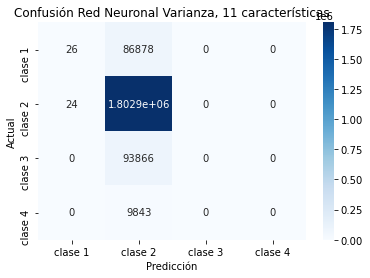

Confusión Red Neuronal Varianza, 11 características:
[[     26   86878       0       0]
 [     24 1802895       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 463us/step


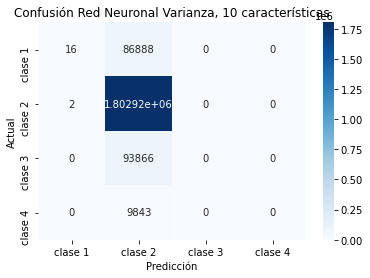

Confusión Red Neuronal Varianza, 10 características:
[[     16   86888       0       0]
 [      2 1802917       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 30s 475us/step


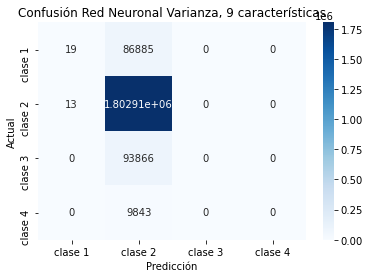

Confusión Red Neuronal Varianza, 9 características:
[[     19   86885       0       0]
 [     13 1802906       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 30s 474us/step


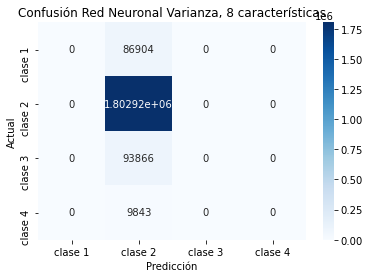

Confusión Red Neuronal Varianza, 8 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 31s 490us/step


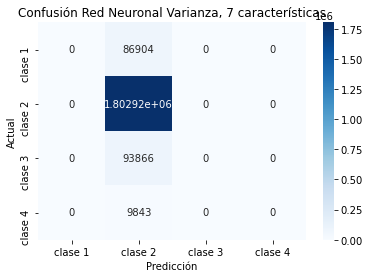

Confusión Red Neuronal Varianza, 7 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 471us/step


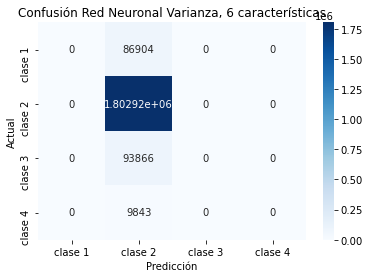

Confusión Red Neuronal Varianza, 6 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 30s 482us/step


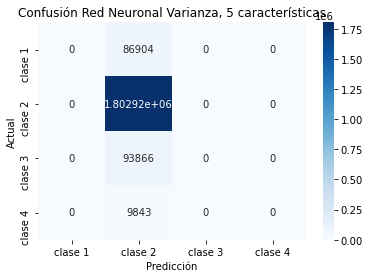

Confusión Red Neuronal Varianza, 5 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 32s 507us/step


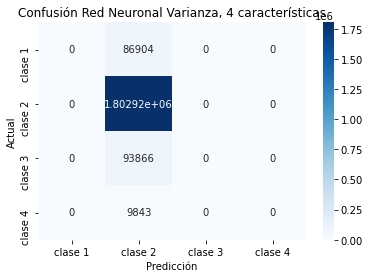

Confusión Red Neuronal Varianza, 4 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 31s 497us/step


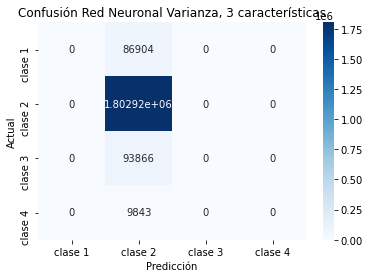

Confusión Red Neuronal Varianza, 3 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 30s 487us/step


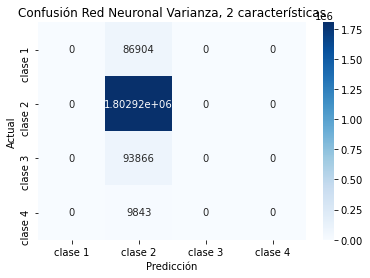

Confusión Red Neuronal Varianza, 2 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 30s 476us/step


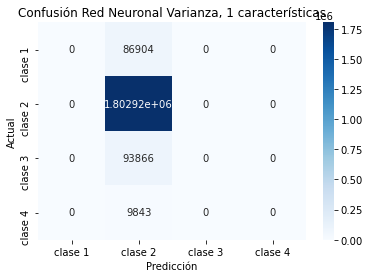

Confusión Red Neuronal Varianza, 1 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]


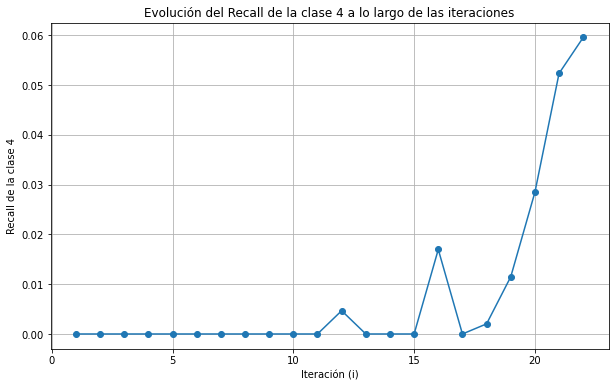

In [45]:
# Cargar los datos
Mejores_Modelos_RUTA_csv = 'Aa_Mejores_Modelos_Varianza_SEGUNDO_clase4.csv'
mejores_modelos = pd.read_csv(Mejores_Modelos_RUTA_csv)

TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['Varianza'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')

i = 22
recall_clase_4_values = []

for _, mejor_modelo in mejores_modelos.iterrows():
    if len(caracteristicas_seleccionadas) <= 1:
        break

    caracteristicas_seleccionadas.pop()
    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    ruta_modelo = mejor_modelo['Ruta']
    nombre_modelo = mejor_modelo['Mejor_Modelo']
    
    modelos_cargados = cargar_modelos(ruta_modelo)
    modelo_especifico = modelos_cargados[nombre_modelo]
    
    recall_clase_4, y_pred_labels = evaluar_modelo(modelo_especifico, X_test, y_test)
    recall_clase_4_values.append(recall_clase_4)
    
    labels = ['clase 1', 'clase 2', 'clase 3', 'clase 4']
    conf_matrix = confusion_matrix(y_test.to_list(), y_pred_labels)
    sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues", fmt="g")
    
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.title(f'Confusión Red Neuronal Varianza, {i} características')
    plt.show()
    
    print(f"Confusión Red Neuronal Varianza, {i} características:")
    print(conf_matrix)
    i -= 1

# Graficar los valores de recall_clase_4
plt.figure(figsize=(10, 6))
plt.plot(range(22, 22-len(recall_clase_4_values), -1), recall_clase_4_values, marker='o')
plt.xlabel('Iteración (i)')
plt.ylabel('Recall de la clase 4')
plt.title('Evolución del Recall de la clase 4 a lo largo de las iteraciones')
plt.grid(True)
plt.show()

# DataFrame MAD

In [7]:

# Cargar características seleccionadas
seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['MAD'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')

# Cargar y preparar los datos
TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']

# Definir las rutas de los modelos
base_nombre = 'Modelo_neuronal_MAD_con_'
ext_nombre = '_caracteristicas.pkl'
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in range(23, 1, -1)]

mejores_modelos = []
matrices_confusion = []

for ruta in rutas_modelos:
    print('ruta', ruta)
    if len(caracteristicas_seleccionadas) == 1:
        break

    caracteristicas_seleccionadas.pop()
    print('características seleccionadas')
    print(caracteristicas_seleccionadas)

    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    predicciones_mejor_modelo = None
    i = 1
    for nombre_modelo, modelo in modelos_cargados.items():
        rendimiento, y_pred_labels = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {i} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        
        if predicciones_mejor_modelo is None or rendimiento > rendimientos[mejor_modelo]:
            mejor_modelo = nombre_modelo
            predicciones_mejor_modelo = y_pred_labels
        
        i += 1
        print(' ')
    
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con un recall de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    # Guardar información del mejor modelo
    mejores_modelos.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, predicciones_mejor_modelo)

    # Imprimir la matriz de confusión
    print(f"Matriz de Confusión para el modelo en {ruta}:")
    print(cm)

    # Guardar la matriz de confusión
    matrices_confusion.append({
        'Ruta': ruta,
        'Confusion_Matrix': cm
    })

# Guardar los mejores modelos en un CSV
df_mejores_modelos = pd.DataFrame(mejores_modelos)
df_mejores_modelos.to_csv('Aa_Mejores_Modelos_MAD_SEGUNDO_clase4.csv', index=False)
print("Los mejores modelos se han guardado en 'Aa_Mejores_Modelos_MAD_SEGUNDO_clase4.csv'.")




ruta Modelo_neuronal_MAD_con_23_caracteristicas.pkl
características seleccionadas
['IMECA_Total', 'Wind_Direction_Std', 'Irradiation_Tot', 'Wind_Direction_SMM', 'Pot_Irradiance_Avg', 'Irradiance_Avg', 'RH_Avg', 'Sun_Hrs_Tot', 'Wind_Direction_Avg', 'Wind_Speed_Max', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'T_Wet_Bulb_Avg', 'T_amb_Avg', 'P_atm_q', 'Heat_Inedx_Avg', 'Wind_Chill_Avg', 'BattV_Min', 'Dew_Point_Avg', 'T_amb_Max', 'P_Sat_vap_Avg', 'T_air', 'T_amb_Min']
62298/62298 [==============================] - 29s 464us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.016864776998882454
 
62298/62298 [==============================] - 29s 464us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.015747231535101085
 
62298/62298 [==============================] - 30s 479us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0395

62298/62298 [==============================] - 29s 472us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0069084628670120895
 
62298/62298 [==============================] - 30s 473us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0
 
62298/62298 [==============================] - 30s 483us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.006400487656202377
 
62298/62298 [==============================] - 29s 467us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.0
 
62298/62298 [==============================] - 30s 475us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.01097226455348979
 
62298/62298 [==============================] - 29s 469us/step
Acabé 6 veces con el modelo modelo_prueba_kfold

62298/62298 [==============================] - 28s 447us/step
Acabé 10 veces con el modelo modelo_prueba_kfold_10.
Rendimiento del modelo modelo_prueba_kfold_10 es: 0.0
 
El mejor modelo para Modelo_neuronal_MAD_con_14_caracteristicas.pkl es: modelo_prueba_kfold_5
Con un recall de: 0.0017271157167530224
 
Matriz de Confusión para el modelo en Modelo_neuronal_MAD_con_14_caracteristicas.pkl:
[[    190   86714       0       0]
 [    114 1802804       1       0]
 [     15   93851       0       0]
 [      0    9826       0      17]]
ruta Modelo_neuronal_MAD_con_13_caracteristicas.pkl
características seleccionadas
['IMECA_Total', 'Wind_Direction_Std', 'Irradiation_Tot', 'Wind_Direction_SMM', 'Pot_Irradiance_Avg', 'Irradiance_Avg', 'RH_Avg', 'Sun_Hrs_Tot', 'Wind_Direction_Avg', 'Wind_Speed_Max', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'T_Wet_Bulb_Avg']
62298/62298 [==============================] - 28s 445us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_pru

Matriz de Confusión para el modelo en Modelo_neuronal_MAD_con_7_caracteristicas.pkl:
[[    181   86723       0       0]
 [     60 1802859       0       0]
 [      8   93858       0       0]
 [      0    9843       0       0]]
ruta Modelo_neuronal_MAD_con_6_caracteristicas.pkl
características seleccionadas
['IMECA_Total', 'Wind_Direction_Std', 'Irradiation_Tot', 'Wind_Direction_SMM', 'Pot_Irradiance_Avg', 'Irradiance_Avg']
62298/62298 [==============================] - 28s 445us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0
 
62298/62298 [==============================] - 28s 453us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0
 
62298/62298 [==============================] - 27s 432us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0
 
62298/62298 [==============================] - 28s 445us/step
Acabé 4 

62298/62298 [==============================] - 30s 469us/step


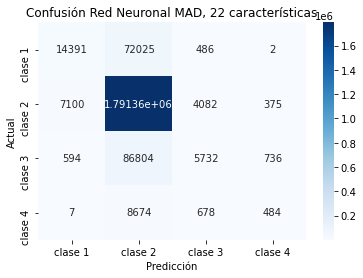

Confusión Red Neuronal MAD, 22 características:
[[  14391   72025     486       2]
 [   7100 1791362    4082     375]
 [    594   86804    5732     736]
 [      7    8674     678     484]]
62298/62298 [==============================] - 28s 454us/step


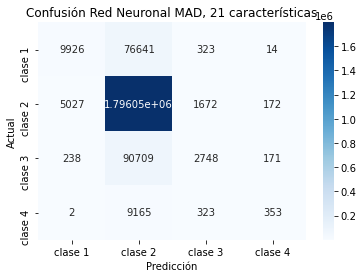

Confusión Red Neuronal MAD, 21 características:
[[   9926   76641     323      14]
 [   5027 1796048    1672     172]
 [    238   90709    2748     171]
 [      2    9165     323     353]]
62298/62298 [==============================] - 28s 443us/step


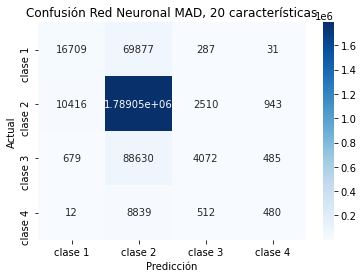

Confusión Red Neuronal MAD, 20 características:
[[  16709   69877     287      31]
 [  10416 1789050    2510     943]
 [    679   88630    4072     485]
 [     12    8839     512     480]]
62298/62298 [==============================] - 27s 439us/step


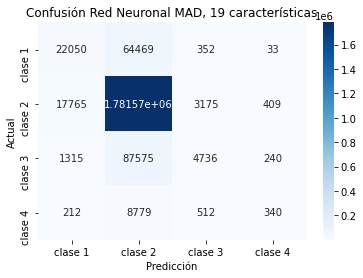

Confusión Red Neuronal MAD, 19 características:
[[  22050   64469     352      33]
 [  17765 1781570    3175     409]
 [   1315   87575    4736     240]
 [    212    8779     512     340]]
62298/62298 [==============================] - 29s 457us/step


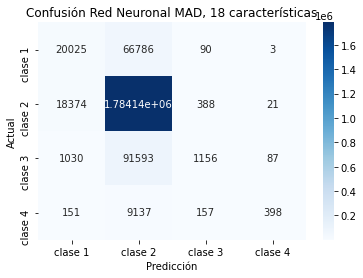

Confusión Red Neuronal MAD, 18 características:
[[  20025   66786      90       3]
 [  18374 1784136     388      21]
 [   1030   91593    1156      87]
 [    151    9137     157     398]]
62298/62298 [==============================] - 27s 438us/step


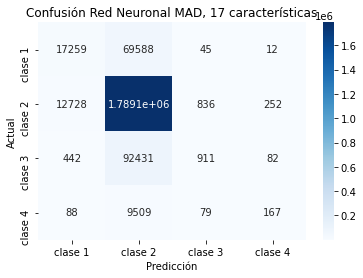

Confusión Red Neuronal MAD, 17 características:
[[  17259   69588      45      12]
 [  12728 1789103     836     252]
 [    442   92431     911      82]
 [     88    9509      79     167]]
62298/62298 [==============================] - 28s 453us/step


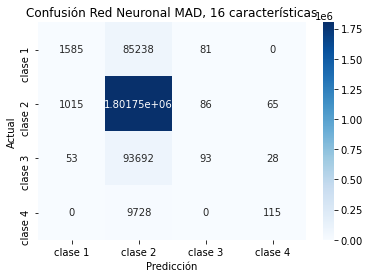

Confusión Red Neuronal MAD, 16 características:
[[   1585   85238      81       0]
 [   1015 1801753      86      65]
 [     53   93692      93      28]
 [      0    9728       0     115]]
62298/62298 [==============================] - 29s 458us/step


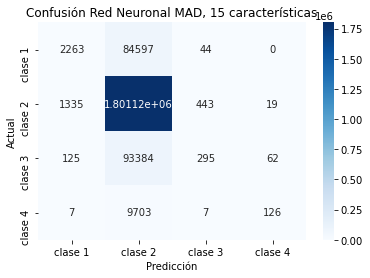

Confusión Red Neuronal MAD, 15 características:
[[   2263   84597      44       0]
 [   1335 1801122     443      19]
 [    125   93384     295      62]
 [      7    9703       7     126]]
62298/62298 [==============================] - 29s 457us/step


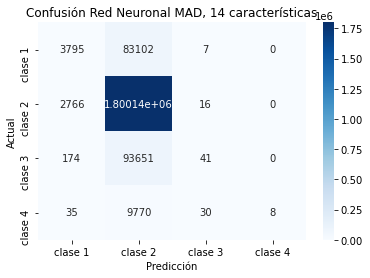

Confusión Red Neuronal MAD, 14 características:
[[   3795   83102       7       0]
 [   2766 1800137      16       0]
 [    174   93651      41       0]
 [     35    9770      30       8]]
62298/62298 [==============================] - 29s 458us/step


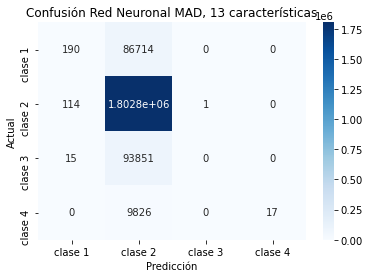

Confusión Red Neuronal MAD, 13 características:
[[    190   86714       0       0]
 [    114 1802804       1       0]
 [     15   93851       0       0]
 [      0    9826       0      17]]
62298/62298 [==============================] - 29s 457us/step


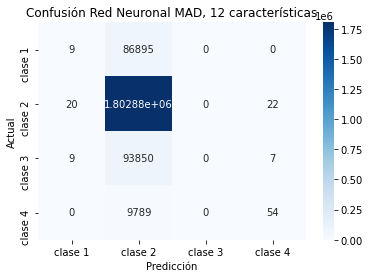

Confusión Red Neuronal MAD, 12 características:
[[      9   86895       0       0]
 [     20 1802877       0      22]
 [      9   93850       0       7]
 [      0    9789       0      54]]
62298/62298 [==============================] - 29s 458us/step


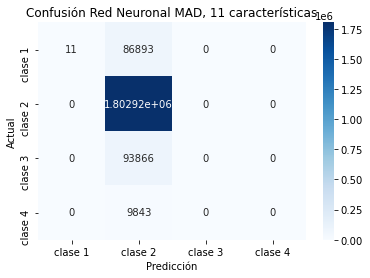

Confusión Red Neuronal MAD, 11 características:
[[     11   86893       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 28s 450us/step


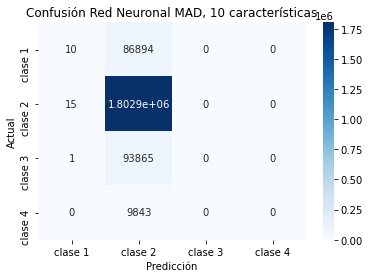

Confusión Red Neuronal MAD, 10 características:
[[     10   86894       0       0]
 [     15 1802904       0       0]
 [      1   93865       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 28s 454us/step


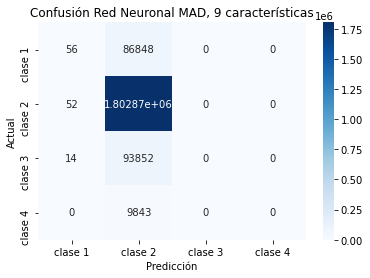

Confusión Red Neuronal MAD, 9 características:
[[     56   86848       0       0]
 [     52 1802867       0       0]
 [     14   93852       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 461us/step


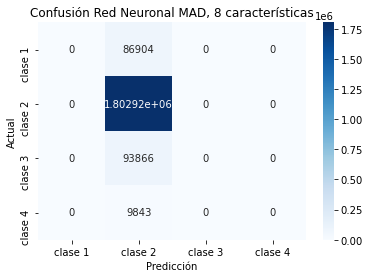

Confusión Red Neuronal MAD, 8 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 27s 436us/step


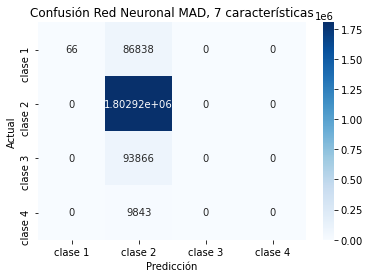

Confusión Red Neuronal MAD, 7 características:
[[     66   86838       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 28s 454us/step


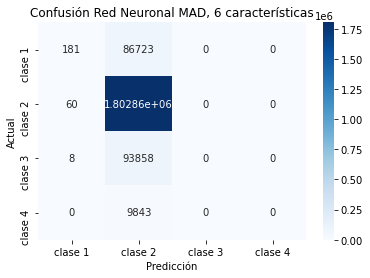

Confusión Red Neuronal MAD, 6 características:
[[    181   86723       0       0]
 [     60 1802859       0       0]
 [      8   93858       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 458us/step


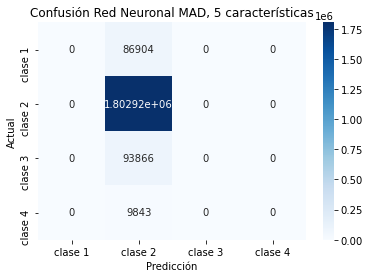

Confusión Red Neuronal MAD, 5 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 28s 446us/step


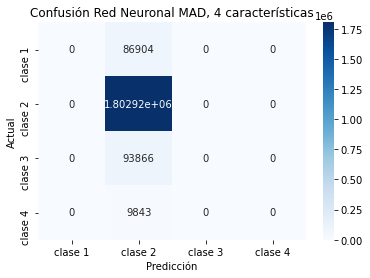

Confusión Red Neuronal MAD, 4 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 27s 440us/step


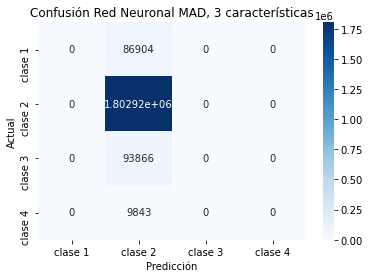

Confusión Red Neuronal MAD, 3 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 28s 456us/step


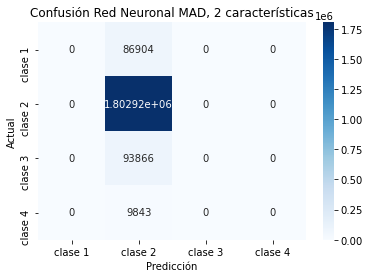

Confusión Red Neuronal MAD, 2 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 28s 454us/step


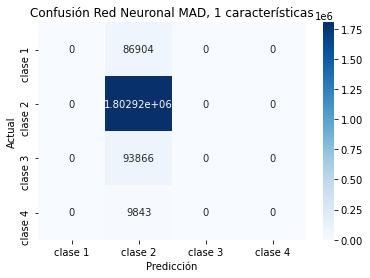

Confusión Red Neuronal MAD, 1 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]


In [8]:

Mejores_Modelos_RUTA_csv = 'Aa_Mejores_Modelos_MAD_SEGUNDO_clase4.csv'
mejores_modelos = pd.read_csv(Mejores_Modelos_RUTA_csv)


TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
# Cambia los valores de 'IMECA_Total' de 5 a 4
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['MAD'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')


i = 22
recall_clase_4_values = []

for _, mejor_modelo in mejores_modelos.iterrows():
    if len(caracteristicas_seleccionadas) <= 1:
        break

    caracteristicas_seleccionadas.pop()
    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    ruta_modelo = mejor_modelo['Ruta']
    nombre_modelo = mejor_modelo['Mejor_Modelo']
    
    modelos_cargados = cargar_modelos(ruta_modelo)
    modelo_especifico = modelos_cargados[nombre_modelo]
    
    recall_clase_4, y_pred_labels = evaluar_modelo(modelo_especifico, X_test, y_test)
    recall_clase_4_values.append(recall_clase_4)
    
    labels = ['clase 1', 'clase 2', 'clase 3', 'clase 4']
    conf_matrix = confusion_matrix(y_test.to_list(), y_pred_labels)
    sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues", fmt="g")
    
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.title(f'Confusión Red Neuronal Varianza, {i} características')
    plt.show()
    
    print(f"Confusión Red Neuronal Varianza, {i} características:")
    print(conf_matrix)
    i -= 1

# Graficar los valores de recall_clase_4
plt.figure(figsize=(10, 6))
plt.plot(range(22, 22-len(recall_clase_4_values), -1), recall_clase_4_values, marker='o')
plt.xlabel('Iteración (i)')
plt.ylabel('Recall de la clase 4')
plt.title('Evolución del Recall de la clase 4 a lo largo de las iteraciones')
plt.grid(True)
plt.show()

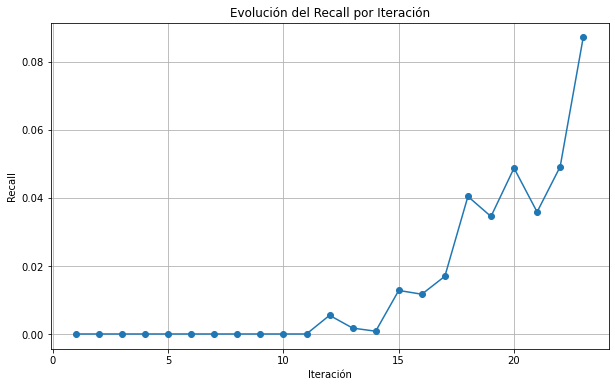

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los archivos CSV
ruta_csv_mad = 'Aa_Mejores_Modelos_MAD_SEGUNDO_clase4.csv'
ruta_csv_completo = 'Aa_Mejores_Modelos_CCOMPLETO_CLASE4.csv'

df_mejores_modelos_mad = pd.read_csv(ruta_csv_mad)
df_mejores_modelos_completo = pd.read_csv(ruta_csv_completo)

# Extraer el valor de Mejor_Recall_Clase_4 del archivo completo
mejor_recall_clase_4 = df_mejores_modelos_completo['Mejor_Recall_Clase_4'].values[0]

# Asegurarse de que la columna 'Recall' sea un array unidimensional
recall_values = df_mejores_modelos_mad['Recall'].values.flatten()

# Crear la columna 'Iteración' asignando los valores 22, 21, 20, etc.
iteracion_values = list(range(22, 22 - len(df_mejores_modelos_mad), -1))

# Agregar el punto (23, Mejor_Recall_Clase_4) a los datos
iteracion_values.insert(0, 23)
recall_values = np.insert(recall_values, 0, mejor_recall_clase_4)

# Graficar la columna 'Recall' en función de la columna 'Iteración'
plt.figure(figsize=(10, 6))
plt.plot(iteracion_values, recall_values, marker='o')

# Etiquetas y título
plt.xlabel('Iteración')
plt.ylabel('Recall')
plt.title('Evolución del Recall por Iteración')
plt.grid(True)

# Mostrar la gráfica
plt.show()



# DR

In [9]:

# Cargar características seleccionadas
seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['DR'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')

# Cargar y preparar los datos
TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']

# Definir las rutas de los modelos
base_nombre = 'Modelo_neuronal_DR_con_'
ext_nombre = '_caracteristicas.pkl'
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in range(23, 1, -1)]

mejores_modelos = []
matrices_confusion = []

for ruta in rutas_modelos:
    print('ruta', ruta)
    if len(caracteristicas_seleccionadas) == 1:
        break

    caracteristicas_seleccionadas.pop()
    print('características seleccionadas')
    print(caracteristicas_seleccionadas)

    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    predicciones_mejor_modelo = None
    i = 1
    for nombre_modelo, modelo in modelos_cargados.items():
        rendimiento, y_pred_labels = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {i} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        
        if predicciones_mejor_modelo is None or rendimiento > rendimientos[mejor_modelo]:
            mejor_modelo = nombre_modelo
            predicciones_mejor_modelo = y_pred_labels
        
        i += 1
        print(' ')
    
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con un recall de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    # Guardar información del mejor modelo
    mejores_modelos.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, predicciones_mejor_modelo)

    # Imprimir la matriz de confusión
    print(f"Matriz de Confusión para el modelo en {ruta}:")
    print(cm)

    # Guardar la matriz de confusión
    matrices_confusion.append({
        'Ruta': ruta,
        'Confusion_Matrix': cm
    })

# Guardar los mejores modelos en un CSV
df_mejores_modelos = pd.DataFrame(mejores_modelos)
df_mejores_modelos.to_csv('Aa_Mejores_Modelos_DR_SEGUNDO_clase4.csv', index=False)
print("Los mejores modelos se han guardado en 'Aa_Mejores_Modelos_DR_SEGUNDO_clase4.csv'.")




ruta Modelo_neuronal_DR_con_23_caracteristicas.pkl
características seleccionadas
['IMECA_Total', 'Wind_Direction_SMM', 'Dew_Point_Avg', 'T_amb_Max', 'T_amb_Min', 'T_air', 'P_atm_q', 'Irradiance_Avg', 'T_amb_Avg', 'RH_Avg', 'BattV_Min', 'Precipitation_Tot', 'T_Wet_Bulb_Avg', 'Wind_Speed_Max', 'Heat_Inedx_Avg', 'Wind_Chill_Avg', 'Pot_Irradiance_Avg', 'P_Sat_vap_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'Wind_Direction_Avg', 'Wind_Direction_Std']
62298/62298 [==============================] - 29s 455us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.01503606623996749
 
62298/62298 [==============================] - 28s 442us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.01503606623996749
 
62298/62298 [==============================] - 27s 440us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0

62298/62298 [==============================] - 28s 445us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.028345016763181956
 
62298/62298 [==============================] - 28s 454us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0005079752108097125
 
62298/62298 [==============================] - 27s 439us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.015239256324291375
 
62298/62298 [==============================] - 27s 428us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.0001015950421619425
 
62298/62298 [==============================] - 27s 437us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.0006095702529716549
 
62298/62298 [==============================] - 27s 439us/step
Acabé 6 ve

62298/62298 [==============================] - 27s 438us/step
Acabé 8 veces con el modelo modelo_prueba_kfold_8.
Rendimiento del modelo modelo_prueba_kfold_8 es: 0.017372752209692168
 
62298/62298 [==============================] - 29s 460us/step
Acabé 9 veces con el modelo modelo_prueba_kfold_9.
Rendimiento del modelo modelo_prueba_kfold_9 es: 0.009651529005384537
 
62298/62298 [==============================] - 29s 458us/step
Acabé 10 veces con el modelo modelo_prueba_kfold_10.
Rendimiento del modelo modelo_prueba_kfold_10 es: 0.018083917504825766
 
El mejor modelo para Modelo_neuronal_DR_con_14_caracteristicas.pkl es: modelo_prueba_kfold_10
Con un recall de: 0.018083917504825766
 
Matriz de Confusión para el modelo en Modelo_neuronal_DR_con_14_caracteristicas.pkl:
[[   5049   81825      29       1]
 [   2062 1800732     116       9]
 [    212   93500     130      24]
 [      5    9660       0     178]]
ruta Modelo_neuronal_DR_con_13_caracteristicas.pkl
características seleccionadas


62298/62298 [==============================] - 28s 447us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0
 
62298/62298 [==============================] - 28s 456us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0
 
62298/62298 [==============================] - 28s 443us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.0
 
62298/62298 [==============================] - 28s 452us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.0
 
62298/62298 [==============================] - 29s 457us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es: 0.0001015950421619425
 
62298/62298 [==============================] - 28s 451us/step
Acabé 7 veces con el modelo modelo_prueba_kfold_7.
Rendimiento del modelo modelo

Matriz de Confusión para el modelo en Modelo_neuronal_DR_con_7_caracteristicas.pkl:
[[      0   86679     225       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
ruta Modelo_neuronal_DR_con_6_caracteristicas.pkl
características seleccionadas
['IMECA_Total', 'Wind_Direction_SMM', 'Dew_Point_Avg', 'T_amb_Max', 'T_amb_Min', 'T_air']
62298/62298 [==============================] - 27s 434us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0
 
62298/62298 [==============================] - 28s 452us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0
 
62298/62298 [==============================] - 29s 458us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0
 
62298/62298 [==============================] - 28s 456us/step
Acabé 4 veces con el modelo modelo_prue

62298/62298 [==============================] - 28s 454us/step
Acabé 9 veces con el modelo modelo_prueba_kfold_9.
Rendimiento del modelo modelo_prueba_kfold_9 es: 0.0
 
62298/62298 [==============================] - 27s 434us/step
Acabé 10 veces con el modelo modelo_prueba_kfold_10.
Rendimiento del modelo modelo_prueba_kfold_10 es: 0.0
 
El mejor modelo para Modelo_neuronal_DR_con_3_caracteristicas.pkl es: modelo_prueba_kfold_1
Con un recall de: 0.0
 
Matriz de Confusión para el modelo en Modelo_neuronal_DR_con_3_caracteristicas.pkl:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
ruta Modelo_neuronal_DR_con_2_caracteristicas.pkl
características seleccionadas
['IMECA_Total', 'Wind_Direction_SMM']
62298/62298 [==============================] - 27s 433us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0
 
62298/62298 [=====================

62298/62298 [==============================] - 29s 459us/step


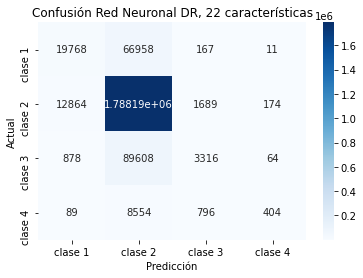

Confusión Red Neuronal DR, 22 características:
[[  19768   66958     167      11]
 [  12864 1788192    1689     174]
 [    878   89608    3316      64]
 [     89    8554     796     404]]
62298/62298 [==============================] - 27s 440us/step


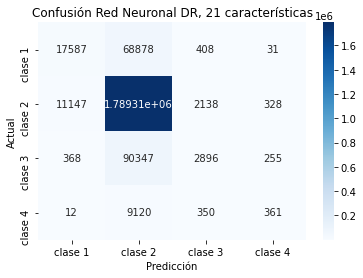

Confusión Red Neuronal DR, 21 características:
[[  17587   68878     408      31]
 [  11147 1789306    2138     328]
 [    368   90347    2896     255]
 [     12    9120     350     361]]
62298/62298 [==============================] - 28s 447us/step


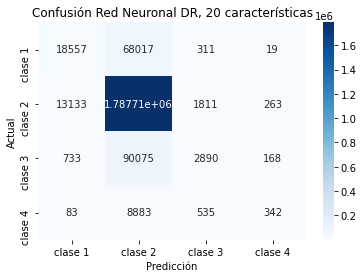

Confusión Red Neuronal DR, 20 características:
[[  18557   68017     311      19]
 [  13133 1787712    1811     263]
 [    733   90075    2890     168]
 [     83    8883     535     342]]
62298/62298 [==============================] - 29s 462us/step


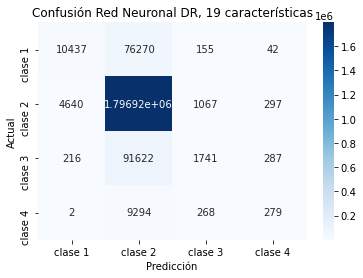

Confusión Red Neuronal DR, 19 características:
[[  10437   76270     155      42]
 [   4640 1796915    1067     297]
 [    216   91622    1741     287]
 [      2    9294     268     279]]
62298/62298 [==============================] - 28s 446us/step


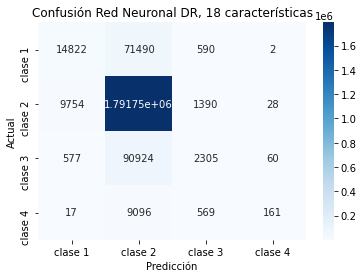

Confusión Red Neuronal DR, 18 características:
[[  14822   71490     590       2]
 [   9754 1791747    1390      28]
 [    577   90924    2305      60]
 [     17    9096     569     161]]
62298/62298 [==============================] - 27s 428us/step


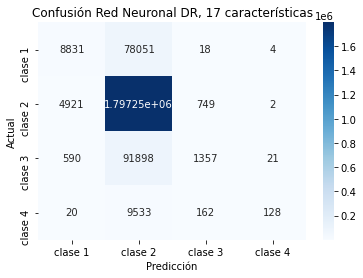

Confusión Red Neuronal DR, 17 características:
[[   8831   78051      18       4]
 [   4921 1797247     749       2]
 [    590   91898    1357      21]
 [     20    9533     162     128]]
62298/62298 [==============================] - 29s 458us/step


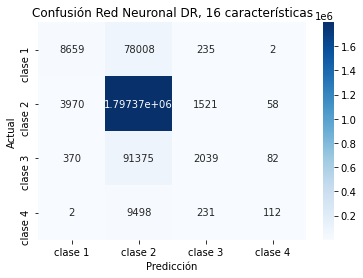

Confusión Red Neuronal DR, 16 características:
[[   8659   78008     235       2]
 [   3970 1797370    1521      58]
 [    370   91375    2039      82]
 [      2    9498     231     112]]
62298/62298 [==============================] - 28s 456us/step


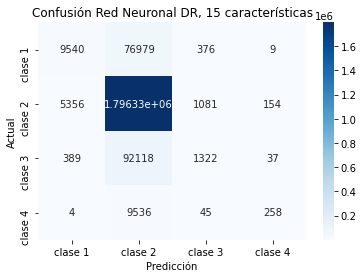

Confusión Red Neuronal DR, 15 características:
[[   9540   76979     376       9]
 [   5356 1796328    1081     154]
 [    389   92118    1322      37]
 [      4    9536      45     258]]
62298/62298 [==============================] - 28s 449us/step


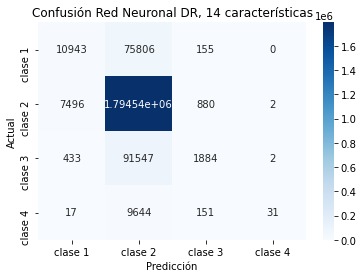

Confusión Red Neuronal DR, 14 características:
[[  10943   75806     155       0]
 [   7496 1794541     880       2]
 [    433   91547    1884       2]
 [     17    9644     151      31]]
62298/62298 [==============================] - 29s 460us/step


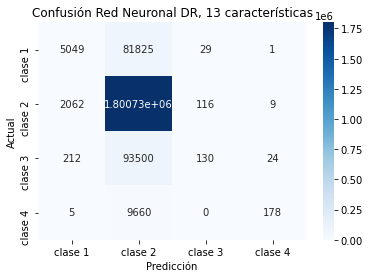

Confusión Red Neuronal DR, 13 características:
[[   5049   81825      29       1]
 [   2062 1800732     116       9]
 [    212   93500     130      24]
 [      5    9660       0     178]]
62298/62298 [==============================] - 28s 453us/step


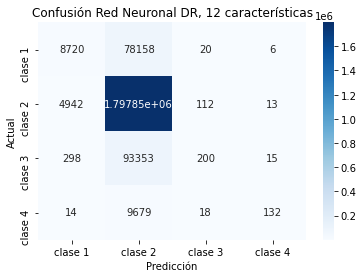

Confusión Red Neuronal DR, 12 características:
[[   8720   78158      20       6]
 [   4942 1797852     112      13]
 [    298   93353     200      15]
 [     14    9679      18     132]]
62298/62298 [==============================] - 28s 456us/step


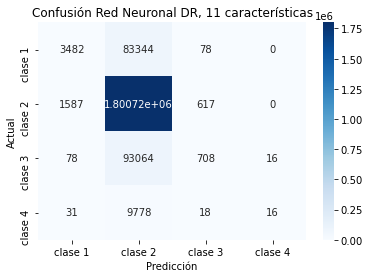

Confusión Red Neuronal DR, 11 características:
[[   3482   83344      78       0]
 [   1587 1800715     617       0]
 [     78   93064     708      16]
 [     31    9778      18      16]]
62298/62298 [==============================] - 28s 456us/step


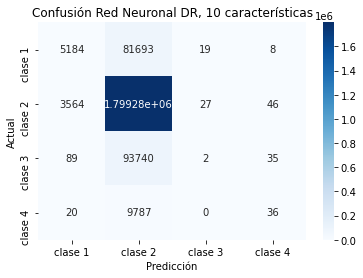

Confusión Red Neuronal DR, 10 características:
[[   5184   81693      19       8]
 [   3564 1799282      27      46]
 [     89   93740       2      35]
 [     20    9787       0      36]]
62298/62298 [==============================] - 28s 449us/step


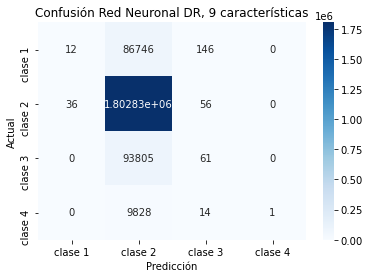

Confusión Red Neuronal DR, 9 características:
[[     12   86746     146       0]
 [     36 1802827      56       0]
 [      0   93805      61       0]
 [      0    9828      14       1]]
62298/62298 [==============================] - 28s 451us/step


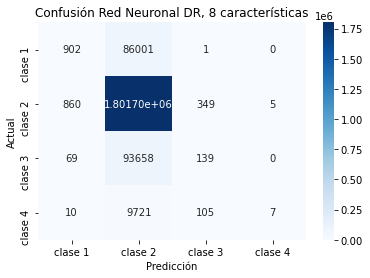

Confusión Red Neuronal DR, 8 características:
[[    902   86001       1       0]
 [    860 1801705     349       5]
 [     69   93658     139       0]
 [     10    9721     105       7]]
62298/62298 [==============================] - 28s 455us/step


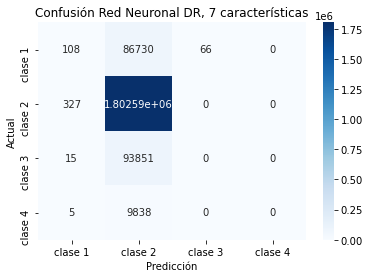

Confusión Red Neuronal DR, 7 características:
[[    108   86730      66       0]
 [    327 1802592       0       0]
 [     15   93851       0       0]
 [      5    9838       0       0]]
62298/62298 [==============================] - 28s 450us/step


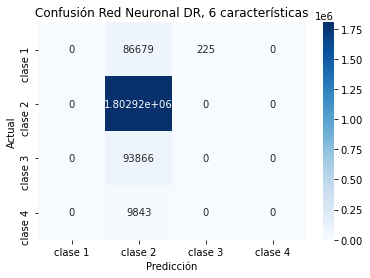

Confusión Red Neuronal DR, 6 características:
[[      0   86679     225       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 463us/step


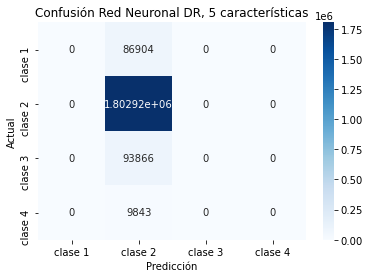

Confusión Red Neuronal DR, 5 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 459us/step


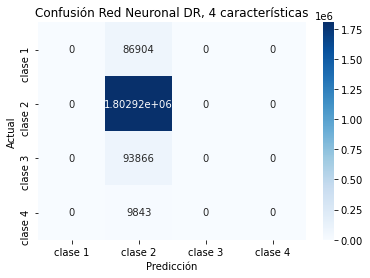

Confusión Red Neuronal DR, 4 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 27s 437us/step


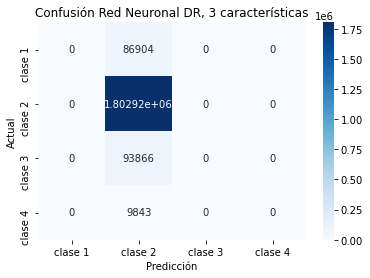

Confusión Red Neuronal DR, 3 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 27s 434us/step


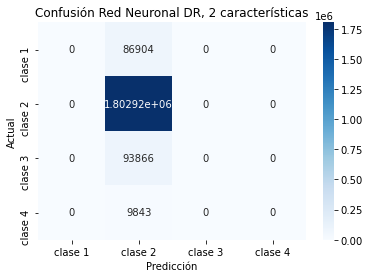

Confusión Red Neuronal DR, 2 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 28s 446us/step


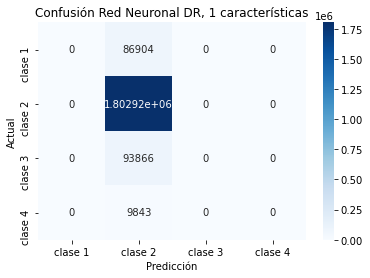

Confusión Red Neuronal DR, 1 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]


In [10]:

Mejores_Modelos_RUTA_csv = 'Aa_Mejores_Modelos_DR_SEGUNDO_clase4.csv'
mejores_modelos = pd.read_csv(Mejores_Modelos_RUTA_csv)


TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
# Cambia los valores de 'IMECA_Total' de 5 a 4
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['DR'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')


i=22
for _, mejor_modelo in mejores_modelos.iterrows():

    if len(caracteristicas_seleccionadas) <= 1:
        break
    

    caracteristicas_seleccionadas.pop()


    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]


    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    ruta_modelo = mejor_modelo['Ruta']
    nombre_modelo = mejor_modelo['Mejor_Modelo']
    
    modelos_cargados = cargar_modelos(ruta_modelo)
    modelo_especifico = modelos_cargados[nombre_modelo]
    
    y_pred = modelo_especifico.predict(X_test)
    
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_pred_labels = [x + 1 for x in y_pred_labels]
    
    labels = ['clase 1', 'clase 2', 'clase 3', 'clase 4']
    
    conf_matrix = confusion_matrix(y_test.to_list(), y_pred_labels)
    sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues", fmt="g")
    
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.title(f'Confusión Red Neuronal DR, {i} características')
    
    plt.show()
    
    print(f"Confusión Red Neuronal DR, {i} características:")
    print(conf_matrix)
    i=i-1

# PCA

In [11]:

# Cargar características seleccionadas
seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['PCA'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')

# Cargar y preparar los datos
TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']

# Definir las rutas de los modelos
base_nombre = 'Modelo_neuronal_PCA_con_'
ext_nombre = '_caracteristicas.pkl'
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in range(23, 1, -1)]

mejores_modelos = []
matrices_confusion = []

for ruta in rutas_modelos:
    print('ruta', ruta)
    if len(caracteristicas_seleccionadas) == 1:
        break

    caracteristicas_seleccionadas.pop()
    print('características seleccionadas')
    print(caracteristicas_seleccionadas)

    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    predicciones_mejor_modelo = None
    i = 1
    for nombre_modelo, modelo in modelos_cargados.items():
        rendimiento, y_pred_labels = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {i} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        
        if predicciones_mejor_modelo is None or rendimiento > rendimientos[mejor_modelo]:
            mejor_modelo = nombre_modelo
            predicciones_mejor_modelo = y_pred_labels
        
        i += 1
        print(' ')
    
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con un recall de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    # Guardar información del mejor modelo
    mejores_modelos.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, predicciones_mejor_modelo)

    # Imprimir la matriz de confusión
    print(f"Matriz de Confusión para el modelo en {ruta}:")
    print(cm)

    # Guardar la matriz de confusión
    matrices_confusion.append({
        'Ruta': ruta,
        'Confusion_Matrix': cm
    })

# Guardar los mejores modelos en un CSV
df_mejores_modelos = pd.DataFrame(mejores_modelos)
df_mejores_modelos.to_csv('Aa_Mejores_Modelos_PCA_SEGUNDO_clase4.csv', index=False)
print("Los mejores modelos se han guardado en 'Aa_Mejores_Modelos_PCA_SEGUNDO_clase4.csv'.")




ruta Modelo_neuronal_PCA_con_23_caracteristicas.pkl
características seleccionadas
['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Max', 'T_amb_Min', 'T_air', 'P_atm_q', 'Irradiance_Avg', 'T_amb_Avg', 'RH_Avg', 'BattV_Min', 'Precipitation_Tot', 'Dew_Point_Avg', 'T_Wet_Bulb_Avg', 'Heat_Inedx_Avg', 'Wind_Chill_Avg', 'Pot_Irradiance_Avg', 'P_Sat_vap_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'Wind_Direction_Avg', 'Wind_Direction_Std', 'Wind_Speed_Max']
62298/62298 [==============================] - 29s 471us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.024179620034542316
 
62298/62298 [==============================] - 28s 454us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.01341054556537641
 
62298/62298 [==============================] - 28s 454us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.013105

62298/62298 [==============================] - 28s 453us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.020522198516712383
 
62298/62298 [==============================] - 29s 460us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.025093975413999797
 
62298/62298 [==============================] - 27s 433us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0001015950421619425
 
62298/62298 [==============================] - 29s 461us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.015239256324291375
 
62298/62298 [==============================] - 28s 453us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.027430661383724474
 
62298/62298 [==============================] - 28s 442us/step
Acabé 6 vece

62298/62298 [==============================] - 28s 452us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.0
 
62298/62298 [==============================] - 27s 433us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.00284466118053439
 
62298/62298 [==============================] - 28s 447us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es: 0.008229198415117342
 
62298/62298 [==============================] - 29s 466us/step
Acabé 7 veces con el modelo modelo_prueba_kfold_7.
Rendimiento del modelo modelo_prueba_kfold_7 es: 0.0
 
62298/62298 [==============================] - 28s 444us/step
Acabé 8 veces con el modelo modelo_prueba_kfold_8.
Rendimiento del modelo modelo_prueba_kfold_8 es: 0.02194452910697958
 
62298/62298 [==============================] - 28s 453us/step
Acabé 9 veces con el modelo modelo_prueba_kfold_9

62298/62298 [==============================] - 29s 459us/step
Acabé 9 veces con el modelo modelo_prueba_kfold_9.
Rendimiento del modelo modelo_prueba_kfold_9 es: 0.0001015950421619425
 
62298/62298 [==============================] - 28s 455us/step
Acabé 10 veces con el modelo modelo_prueba_kfold_10.
Rendimiento del modelo modelo_prueba_kfold_10 es: 0.0
 
El mejor modelo para Modelo_neuronal_PCA_con_14_caracteristicas.pkl es: modelo_prueba_kfold_5
Con un recall de: 0.005384537234582952
 
Matriz de Confusión para el modelo en Modelo_neuronal_PCA_con_14_caracteristicas.pkl:
[[   7422   79474       8       0]
 [   3029 1799873      13       4]
 [    141   93593     118      14]
 [      0    9790       0      53]]
ruta Modelo_neuronal_PCA_con_13_caracteristicas.pkl
características seleccionadas
['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Max', 'T_amb_Min', 'T_air', 'P_atm_q', 'Irradiance_Avg', 'T_amb_Avg', 'RH_Avg', 'BattV_Min', 'Precipitation_Tot', 'Dew_Point_Avg', 'T_Wet_Bulb_Avg']
62298/62298 

62298/62298 [==============================] - 28s 453us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0
 
62298/62298 [==============================] - 28s 456us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.0
 
62298/62298 [==============================] - 28s 454us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.0
 
62298/62298 [==============================] - 27s 437us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es: 0.0013207355481052526
 
62298/62298 [==============================] - 28s 455us/step
Acabé 7 veces con el modelo modelo_prueba_kfold_7.
Rendimiento del modelo modelo_prueba_kfold_7 es: 0.0
 
62298/62298 [==============================] - 28s 448us/step
Acabé 8 veces con el modelo modelo_prueba_kfold_8.
Rendimiento del modelo modelo

62298/62298 [==============================] - 29s 462us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0
 
62298/62298 [==============================] - 28s 444us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0
 
62298/62298 [==============================] - 28s 456us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0
 
62298/62298 [==============================] - 29s 458us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.0
 
62298/62298 [==============================] - 29s 464us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.0
 
62298/62298 [==============================] - 28s 447us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es

Matriz de Confusión para el modelo en Modelo_neuronal_PCA_con_3_caracteristicas.pkl:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
ruta Modelo_neuronal_PCA_con_2_caracteristicas.pkl
características seleccionadas
['IMECA_Total', 'Sun_Hrs_Tot']
62298/62298 [==============================] - 28s 448us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0
 
62298/62298 [==============================] - 29s 457us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0
 
62298/62298 [==============================] - 28s 453us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0
 
62298/62298 [==============================] - 28s 453us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 

62298/62298 [==============================] - 29s 464us/step


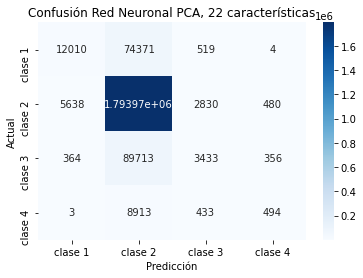

Confusión Red Neuronal PCA, 22 características:
[[  12010   74371     519       4]
 [   5638 1793971    2830     480]
 [    364   89713    3433     356]
 [      3    8913     433     494]]
62298/62298 [==============================] - 28s 450us/step


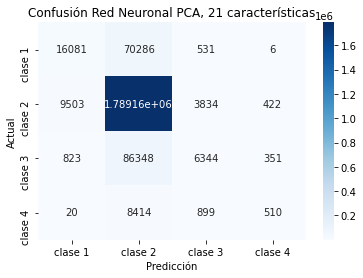

Confusión Red Neuronal PCA, 21 características:
[[  16081   70286     531       6]
 [   9503 1789160    3834     422]
 [    823   86348    6344     351]
 [     20    8414     899     510]]
62298/62298 [==============================] - 28s 444us/step


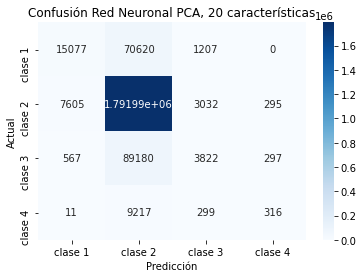

Confusión Red Neuronal PCA, 20 características:
[[  15077   70620    1207       0]
 [   7605 1791987    3032     295]
 [    567   89180    3822     297]
 [     11    9217     299     316]]
62298/62298 [==============================] - 28s 456us/step


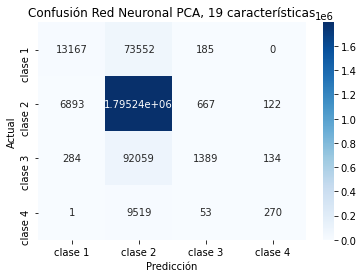

Confusión Red Neuronal PCA, 19 características:
[[  13167   73552     185       0]
 [   6893 1795237     667     122]
 [    284   92059    1389     134]
 [      1    9519      53     270]]
62298/62298 [==============================] - 27s 439us/step


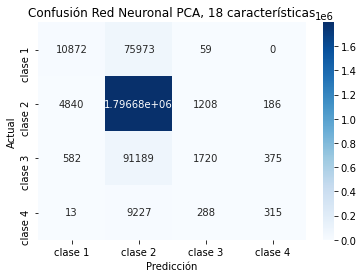

Confusión Red Neuronal PCA, 18 características:
[[  10872   75973      59       0]
 [   4840 1796685    1208     186]
 [    582   91189    1720     375]
 [     13    9227     288     315]]
62298/62298 [==============================] - 28s 456us/step


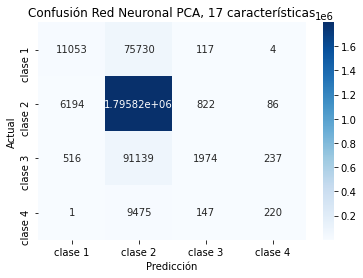

Confusión Red Neuronal PCA, 17 características:
[[  11053   75730     117       4]
 [   6194 1795817     822      86]
 [    516   91139    1974     237]
 [      1    9475     147     220]]
62298/62298 [==============================] - 28s 450us/step


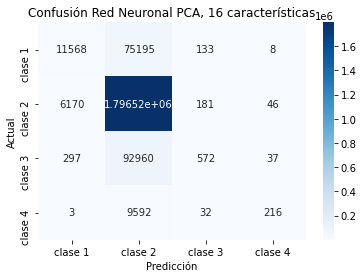

Confusión Red Neuronal PCA, 16 características:
[[  11568   75195     133       8]
 [   6170 1796522     181      46]
 [    297   92960     572      37]
 [      3    9592      32     216]]
62298/62298 [==============================] - 29s 463us/step


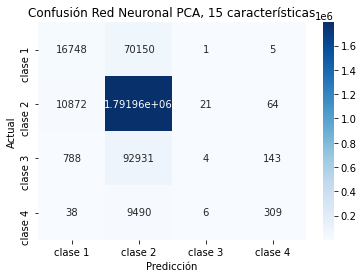

Confusión Red Neuronal PCA, 15 características:
[[  16748   70150       1       5]
 [  10872 1791962      21      64]
 [    788   92931       4     143]
 [     38    9490       6     309]]
62298/62298 [==============================] - 28s 453us/step


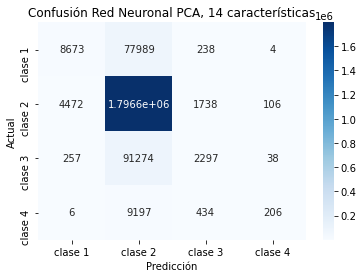

Confusión Red Neuronal PCA, 14 características:
[[   8673   77989     238       4]
 [   4472 1796603    1738     106]
 [    257   91274    2297      38]
 [      6    9197     434     206]]
62298/62298 [==============================] - 28s 447us/step


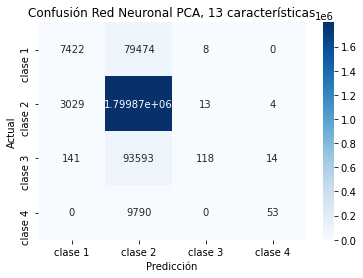

Confusión Red Neuronal PCA, 13 características:
[[   7422   79474       8       0]
 [   3029 1799873      13       4]
 [    141   93593     118      14]
 [      0    9790       0      53]]
62298/62298 [==============================] - 28s 454us/step


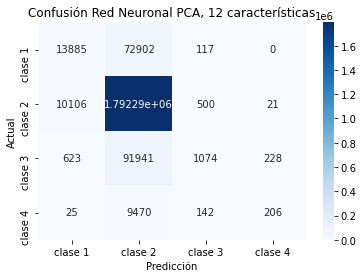

Confusión Red Neuronal PCA, 12 características:
[[  13885   72902     117       0]
 [  10106 1792292     500      21]
 [    623   91941    1074     228]
 [     25    9470     142     206]]
62298/62298 [==============================] - 27s 439us/step


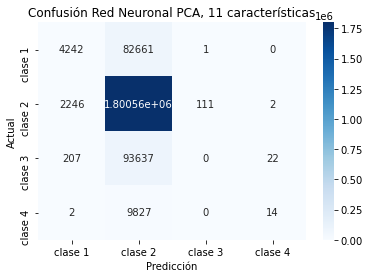

Confusión Red Neuronal PCA, 11 características:
[[   4242   82661       1       0]
 [   2246 1800560     111       2]
 [    207   93637       0      22]
 [      2    9827       0      14]]
62298/62298 [==============================] - 28s 449us/step


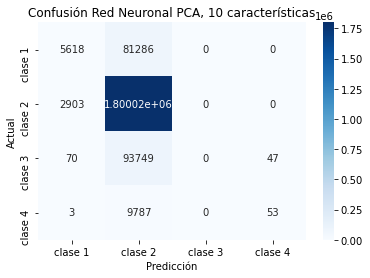

Confusión Red Neuronal PCA, 10 características:
[[   5618   81286       0       0]
 [   2903 1800016       0       0]
 [     70   93749       0      47]
 [      3    9787       0      53]]
62298/62298 [==============================] - 29s 465us/step


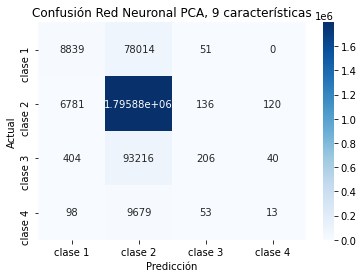

Confusión Red Neuronal PCA, 9 características:
[[   8839   78014      51       0]
 [   6781 1795882     136     120]
 [    404   93216     206      40]
 [     98    9679      53      13]]
62298/62298 [==============================] - 28s 449us/step


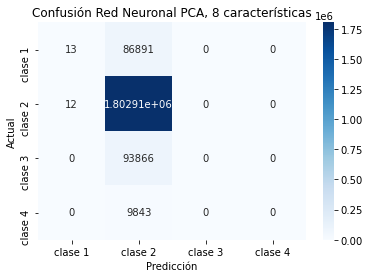

Confusión Red Neuronal PCA, 8 características:
[[     13   86891       0       0]
 [     12 1802907       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 28s 443us/step


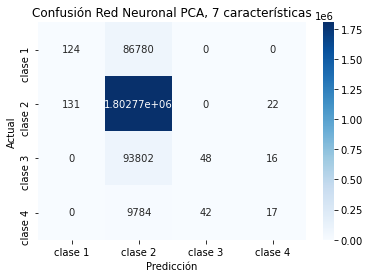

Confusión Red Neuronal PCA, 7 características:
[[    124   86780       0       0]
 [    131 1802766       0      22]
 [      0   93802      48      16]
 [      0    9784      42      17]]
62298/62298 [==============================] - 28s 449us/step


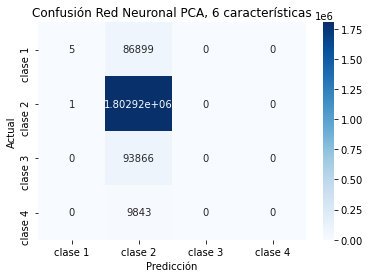

Confusión Red Neuronal PCA, 6 características:
[[      5   86899       0       0]
 [      1 1802918       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 463us/step


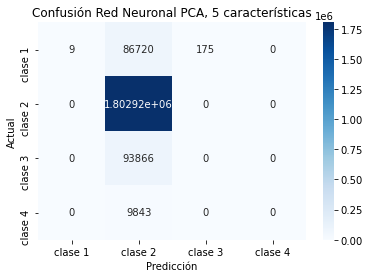

Confusión Red Neuronal PCA, 5 características:
[[      9   86720     175       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 27s 439us/step


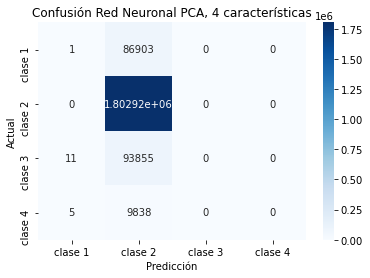

Confusión Red Neuronal PCA, 4 características:
[[      1   86903       0       0]
 [      0 1802919       0       0]
 [     11   93855       0       0]
 [      5    9838       0       0]]
62298/62298 [==============================] - 27s 438us/step


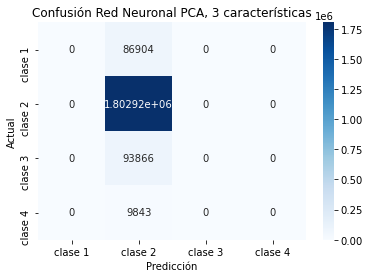

Confusión Red Neuronal PCA, 3 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 460us/step


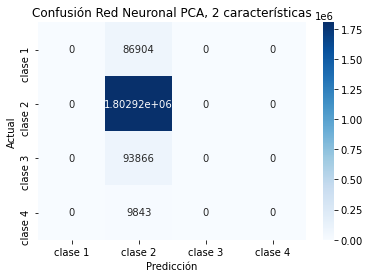

Confusión Red Neuronal PCA, 2 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 27s 435us/step


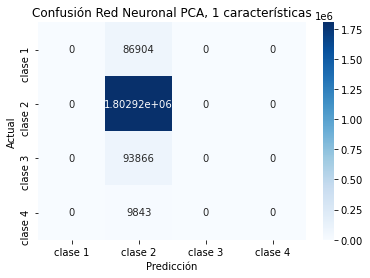

Confusión Red Neuronal PCA, 1 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]


In [12]:

Mejores_Modelos_RUTA_csv = 'Aa_Mejores_Modelos_PCA_SEGUNDO_clase4.csv'
mejores_modelos = pd.read_csv(Mejores_Modelos_RUTA_csv)


TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
# Cambia los valores de 'IMECA_Total' de 5 a 4
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['PCA'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')


i=22
for _, mejor_modelo in mejores_modelos.iterrows():

    if len(caracteristicas_seleccionadas) <= 1:
        break
    

    caracteristicas_seleccionadas.pop()


    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]


    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    ruta_modelo = mejor_modelo['Ruta']
    nombre_modelo = mejor_modelo['Mejor_Modelo']
    
    modelos_cargados = cargar_modelos(ruta_modelo)
    modelo_especifico = modelos_cargados[nombre_modelo]
    
    y_pred = modelo_especifico.predict(X_test)
    
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_pred_labels = [x + 1 for x in y_pred_labels]
    
    labels = ['clase 1', 'clase 2', 'clase 3', 'clase 4']
    
    conf_matrix = confusion_matrix(y_test.to_list(), y_pred_labels)
    sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues", fmt="g")
    
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.title(f'Confusión Red Neuronal PCA, {i} características')
    
    plt.show()
    
    print(f"Confusión Red Neuronal PCA, {i} características:")
    print(conf_matrix)
    i=i-1

# Chi-cuadradada

In [5]:

# Cargar características seleccionadas
seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['Chi-cuadradada'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')

# Cargar y preparar los datos
TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']

# Definir las rutas de los modelos
base_nombre = 'Modelo_neuronal_Chi-cuadradada_con_'
ext_nombre = '_caracteristicas.pkl'
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in range(23, 1, -1)]

mejores_modelos = []
matrices_confusion = []

for ruta in rutas_modelos:
    print('ruta', ruta)
    if len(caracteristicas_seleccionadas) == 1:
        break

    caracteristicas_seleccionadas.pop()
    print('características seleccionadas')
    print(caracteristicas_seleccionadas)

    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    predicciones_mejor_modelo = None
    i = 1
    for nombre_modelo, modelo in modelos_cargados.items():
        rendimiento, y_pred_labels = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {i} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        
        if predicciones_mejor_modelo is None or rendimiento > rendimientos[mejor_modelo]:
            mejor_modelo = nombre_modelo
            predicciones_mejor_modelo = y_pred_labels
        
        i += 1
        print(' ')
    
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con un recall de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    # Guardar información del mejor modelo
    mejores_modelos.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, predicciones_mejor_modelo)

    # Imprimir la matriz de confusión
    print(f"Matriz de Confusión para el modelo en {ruta}:")
    print(cm)

    # Guardar la matriz de confusión
    matrices_confusion.append({
        'Ruta': ruta,
        'Confusion_Matrix': cm
    })

# Guardar los mejores modelos en un CSV
df_mejores_modelos = pd.DataFrame(mejores_modelos)
df_mejores_modelos.to_csv('Aa_Mejores_Modelos_Chi-cuadradada_SEGUNDO_clase4.csv', index=False)
print("Los mejores modelos se han guardado en 'Aa_Mejores_Modelos_Chi-cuadradada_SEGUNDO_clase4.csv'.")




ruta Modelo_neuronal_Chi-cuadradada_con_23_caracteristicas.pkl
características seleccionadas
['IMECA_Total', 'Irradiation_Tot', 'Irradiance_Avg', 'T_amb_Avg', 'T_air', 'Heat_Inedx_Avg', 'Wind_Direction_Std', 'Wind_Chill_Avg', 'P_Sat_vap_Avg', 'RH_Avg', 'Wind_Speed_Std', 'Wind_Speed_Max', 'Wind_Direction_SMM', 'Pot_Irradiance_Avg', 'Wind_Speed_Avg', 'T_amb_Max', 'Dew_Point_Avg', 'Wind_Direction_Avg', 'BattV_Min', 'Sun_Hrs_Tot', 'T_Wet_Bulb_Avg', 'Precipitation_Tot', 'T_amb_Min']
62298/62298 [==============================] - 29s 460us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0015239256324291375
 
62298/62298 [==============================] - 29s 462us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0
 
62298/62298 [==============================] - 28s 454us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0

62298/62298 [==============================] - 29s 458us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.00284466118053439
 
62298/62298 [==============================] - 29s 458us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.00030478512648582747
 
62298/62298 [==============================] - 30s 473us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0
 
62298/62298 [==============================] - 29s 464us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.0
 
62298/62298 [==============================] - 26s 424us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.013105760438890583
 
62298/62298 [==============================] - 29s 463us/step
Acabé 6 veces con el modelo modelo_prueba_kfol

62298/62298 [==============================] - 27s 440us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.0
 
62298/62298 [==============================] - 28s 455us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es: 0.0
 
62298/62298 [==============================] - 28s 452us/step
Acabé 7 veces con el modelo modelo_prueba_kfold_7.
Rendimiento del modelo modelo_prueba_kfold_7 es: 0.0
 
62298/62298 [==============================] - 26s 424us/step
Acabé 8 veces con el modelo modelo_prueba_kfold_8.
Rendimiento del modelo modelo_prueba_kfold_8 es: 0.0
 
62298/62298 [==============================] - 28s 453us/step
Acabé 9 veces con el modelo modelo_prueba_kfold_9.
Rendimiento del modelo modelo_prueba_kfold_9 es: 0.00081276033729554
 
62298/62298 [==============================] - 28s 454us/step
Acabé 10 veces con el modelo modelo_prueba_kfold_10.
Rendimiento del modelo modelo

Matriz de Confusión para el modelo en Modelo_neuronal_Chi-cuadradada_con_14_caracteristicas.pkl:
[[    673   86198      33       0]
 [     95 1802824       0       0]
 [      5   93861       0       0]
 [      0    9843       0       0]]
ruta Modelo_neuronal_Chi-cuadradada_con_13_caracteristicas.pkl
características seleccionadas
['IMECA_Total', 'Irradiation_Tot', 'Irradiance_Avg', 'T_amb_Avg', 'T_air', 'Heat_Inedx_Avg', 'Wind_Direction_Std', 'Wind_Chill_Avg', 'P_Sat_vap_Avg', 'RH_Avg', 'Wind_Speed_Std', 'Wind_Speed_Max', 'Wind_Direction_SMM']
62298/62298 [==============================] - 29s 463us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0
 
62298/62298 [==============================] - 30s 477us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0
 
62298/62298 [==============================] - 28s 442us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Re

62298/62298 [==============================] - 26s 424us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0
 
62298/62298 [==============================] - 27s 437us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0
 
62298/62298 [==============================] - 28s 444us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0
 
62298/62298 [==============================] - 29s 472us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.0
 
62298/62298 [==============================] - 29s 461us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.0
 
62298/62298 [==============================] - 28s 457us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es

Matriz de Confusión para el modelo en Modelo_neuronal_Chi-cuadradada_con_3_caracteristicas.pkl:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
ruta Modelo_neuronal_Chi-cuadradada_con_2_caracteristicas.pkl
características seleccionadas
['IMECA_Total', 'Irradiation_Tot']
62298/62298 [==============================] - 27s 440us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0
 
62298/62298 [==============================] - 29s 458us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0
 
62298/62298 [==============================] - 28s 448us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0
 
62298/62298 [==============================] - 28s 449us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del mod

62298/62298 [==============================] - 28s 442us/step


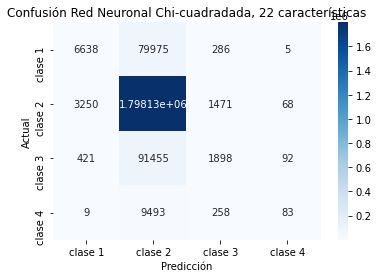

Confusión Red Neuronal Chi-cuadradada, 22 características:
[[   6638   79975     286       5]
 [   3250 1798130    1471      68]
 [    421   91455    1898      92]
 [      9    9493     258      83]]
62298/62298 [==============================] - 28s 446us/step


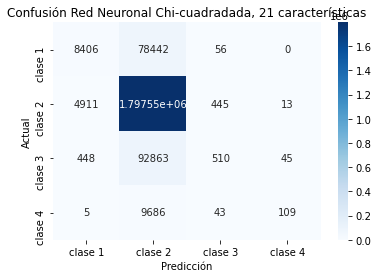

Confusión Red Neuronal Chi-cuadradada, 21 características:
[[   8406   78442      56       0]
 [   4911 1797550     445      13]
 [    448   92863     510      45]
 [      5    9686      43     109]]
62298/62298 [==============================] - 29s 469us/step


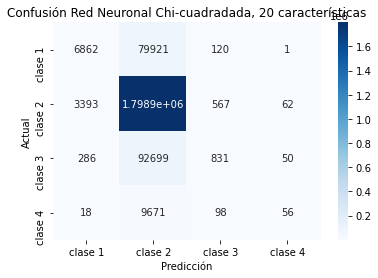

Confusión Red Neuronal Chi-cuadradada, 20 características:
[[   6862   79921     120       1]
 [   3393 1798897     567      62]
 [    286   92699     831      50]
 [     18    9671      98      56]]
62298/62298 [==============================] - 28s 449us/step


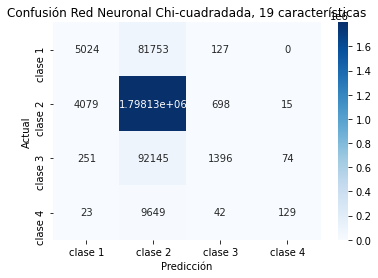

Confusión Red Neuronal Chi-cuadradada, 19 características:
[[   5024   81753     127       0]
 [   4079 1798127     698      15]
 [    251   92145    1396      74]
 [     23    9649      42     129]]
62298/62298 [==============================] - 28s 448us/step


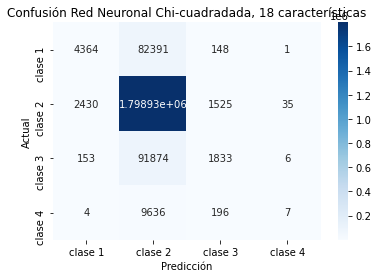

Confusión Red Neuronal Chi-cuadradada, 18 características:
[[   4364   82391     148       1]
 [   2430 1798929    1525      35]
 [    153   91874    1833       6]
 [      4    9636     196       7]]
62298/62298 [==============================] - 26s 424us/step


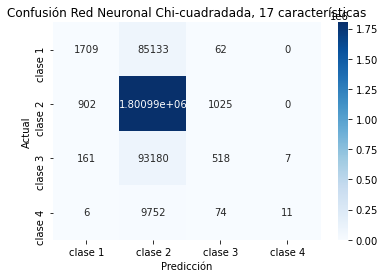

Confusión Red Neuronal Chi-cuadradada, 17 características:
[[   1709   85133      62       0]
 [    902 1800992    1025       0]
 [    161   93180     518       7]
 [      6    9752      74      11]]
62298/62298 [==============================] - 29s 458us/step


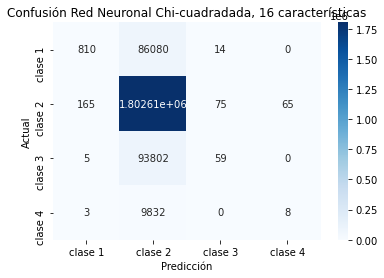

Confusión Red Neuronal Chi-cuadradada, 16 características:
[[    810   86080      14       0]
 [    165 1802614      75      65]
 [      5   93802      59       0]
 [      3    9832       0       8]]
62298/62298 [==============================] - 28s 450us/step


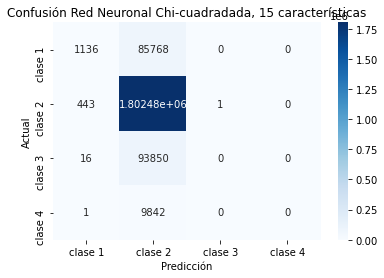

Confusión Red Neuronal Chi-cuadradada, 15 características:
[[   1136   85768       0       0]
 [    443 1802475       1       0]
 [     16   93850       0       0]
 [      1    9842       0       0]]
62298/62298 [==============================] - 29s 460us/step


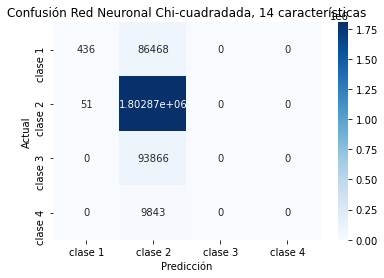

Confusión Red Neuronal Chi-cuadradada, 14 características:
[[    436   86468       0       0]
 [     51 1802868       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 28s 456us/step


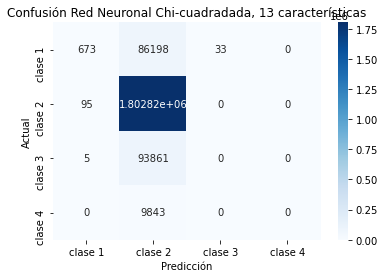

Confusión Red Neuronal Chi-cuadradada, 13 características:
[[    673   86198      33       0]
 [     95 1802824       0       0]
 [      5   93861       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 27s 435us/step


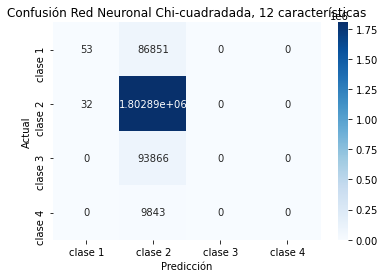

Confusión Red Neuronal Chi-cuadradada, 12 características:
[[     53   86851       0       0]
 [     32 1802887       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 462us/step


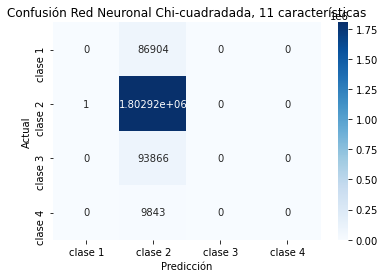

Confusión Red Neuronal Chi-cuadradada, 11 características:
[[      0   86904       0       0]
 [      1 1802918       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 28s 457us/step


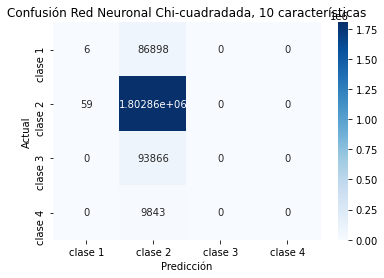

Confusión Red Neuronal Chi-cuadradada, 10 características:
[[      6   86898       0       0]
 [     59 1802860       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 462us/step


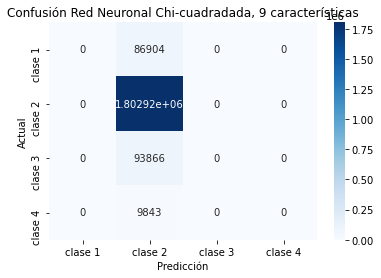

Confusión Red Neuronal Chi-cuadradada, 9 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 462us/step


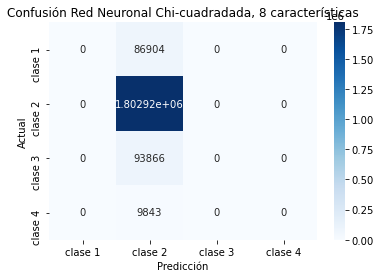

Confusión Red Neuronal Chi-cuadradada, 8 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 28s 450us/step


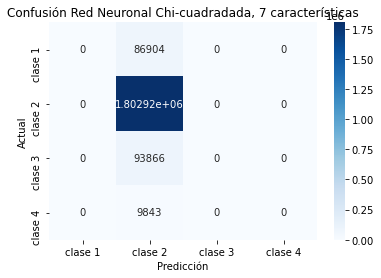

Confusión Red Neuronal Chi-cuadradada, 7 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 465us/step


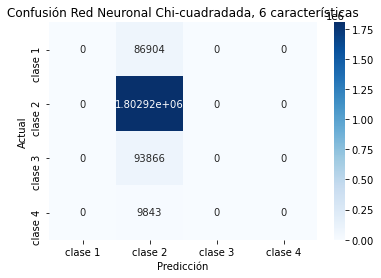

Confusión Red Neuronal Chi-cuadradada, 6 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 466us/step


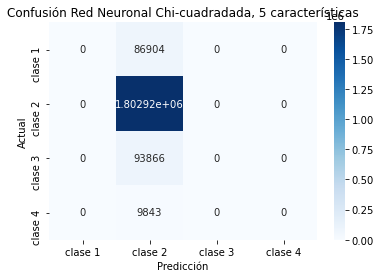

Confusión Red Neuronal Chi-cuadradada, 5 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 28s 453us/step


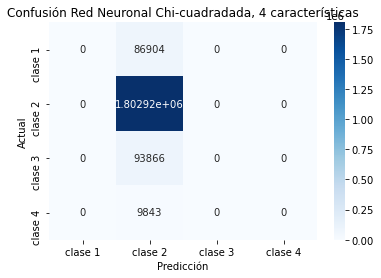

Confusión Red Neuronal Chi-cuadradada, 4 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 28s 446us/step


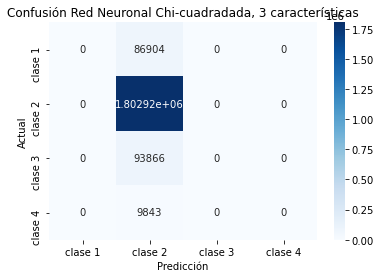

Confusión Red Neuronal Chi-cuadradada, 3 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 28s 453us/step


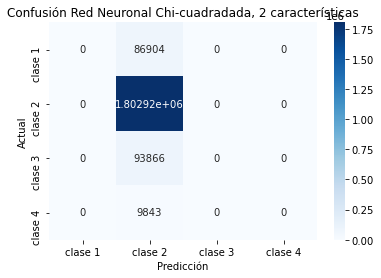

Confusión Red Neuronal Chi-cuadradada, 2 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 28s 442us/step


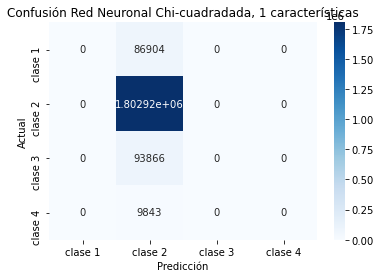

Confusión Red Neuronal Chi-cuadradada, 1 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]


In [6]:

Mejores_Modelos_RUTA_csv = 'Aa_Mejores_Modelos_Chi-cuadradada_SEGUNDO_clase4.csv'
mejores_modelos = pd.read_csv(Mejores_Modelos_RUTA_csv)


TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
# Cambia los valores de 'IMECA_Total' de 5 a 4
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['Chi-cuadradada'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')


i=22
for _, mejor_modelo in mejores_modelos.iterrows():

    if len(caracteristicas_seleccionadas) <= 1:
        break
    

    caracteristicas_seleccionadas.pop()


    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]


    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    ruta_modelo = mejor_modelo['Ruta']
    nombre_modelo = mejor_modelo['Mejor_Modelo']
    
    modelos_cargados = cargar_modelos(ruta_modelo)
    modelo_especifico = modelos_cargados[nombre_modelo]
    
    y_pred = modelo_especifico.predict(X_test)
    
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_pred_labels = [x + 1 for x in y_pred_labels]
    
    labels = ['clase 1', 'clase 2', 'clase 3', 'clase 4']
    
    conf_matrix = confusion_matrix(y_test.to_list(), y_pred_labels)
    sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues", fmt="g")
    
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.title(f'Confusión Red Neuronal Chi-cuadradada, {i} características')
    
    plt.show()
    
    print(f"Confusión Red Neuronal Chi-cuadradada, {i} características:")
    print(conf_matrix)
    i=i-1

# Pearson

In [7]:
# Cargar características seleccionadas
seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['Pearson'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')

# Cargar y preparar los datos
TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']

# Definir las rutas de los modelos
base_nombre = 'Modelo_neuronal_Pearson_con_'
ext_nombre = '_caracteristicas.pkl'
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in range(23, 1, -1)]

mejores_modelos = []
matrices_confusion = []

for ruta in rutas_modelos:
    print('ruta', ruta)
    if len(caracteristicas_seleccionadas) == 1:
        break

    caracteristicas_seleccionadas.pop()
    print('características seleccionadas')
    print(caracteristicas_seleccionadas)

    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    predicciones_mejor_modelo = None
    i = 1
    for nombre_modelo, modelo in modelos_cargados.items():
        rendimiento, y_pred_labels = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {i} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        
        if predicciones_mejor_modelo is None or rendimiento > rendimientos[mejor_modelo]:
            mejor_modelo = nombre_modelo
            predicciones_mejor_modelo = y_pred_labels
        
        i += 1
        print(' ')
    
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con un recall de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    # Guardar información del mejor modelo
    mejores_modelos.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, predicciones_mejor_modelo)

    # Imprimir la matriz de confusión
    print(f"Matriz de Confusión para el modelo en {ruta}:")
    print(cm)

    # Guardar la matriz de confusión
    matrices_confusion.append({
        'Ruta': ruta,
        'Confusion_Matrix': cm
    })

# Guardar los mejores modelos en un CSV
df_mejores_modelos = pd.DataFrame(mejores_modelos)
df_mejores_modelos.to_csv('Aa_Mejores_Modelos_Pearson_SEGUNDO_clase4.csv', index=False)
print("Los mejores modelos se han guardado en 'Aa_Mejores_Modelos_Pearson_SEGUNDO_clase4.csv'.")

ruta Modelo_neuronal_Pearson_con_23_caracteristicas.pkl
características seleccionadas
['IMECA_Total', 'Irradiation_Tot', 'T_air', 'T_amb_Avg', 'P_Sat_vap_Avg', 'Wind_Chill_Avg', 'Heat_Inedx_Avg', 'Irradiance_Avg', 'Wind_Speed_Std', 'Wind_Speed_Max', 'Wind_Direction_Std', 'Wind_Speed_Avg', 'Pot_Irradiance_Avg', 'RH_Avg', 'Wind_Direction_SMM', 'Wind_Direction_Avg', 'T_Wet_Bulb_Avg', 'T_amb_Max', 'Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Precipitation_Tot', 'BattV_Min']
62298/62298 [==============================] - 30s 489us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0058925124453926645
 
62298/62298 [==============================] - 33s 530us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.00162552067459108
 
62298/62298 [==============================] - 30s 485us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es

62298/62298 [==============================] - 28s 445us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0
 
62298/62298 [==============================] - 29s 459us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0
 
62298/62298 [==============================] - 28s 455us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.005384537234582952
 
62298/62298 [==============================] - 28s 442us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.0
 
62298/62298 [==============================] - 29s 460us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.0
 
62298/62298 [==============================] - 28s 447us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_

62298/62298 [==============================] - 28s 448us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es: 0.0
 
62298/62298 [==============================] - 28s 453us/step
Acabé 7 veces con el modelo modelo_prueba_kfold_7.
Rendimiento del modelo modelo_prueba_kfold_7 es: 0.0
 
62298/62298 [==============================] - 28s 448us/step
Acabé 8 veces con el modelo modelo_prueba_kfold_8.
Rendimiento del modelo modelo_prueba_kfold_8 es: 0.0
 
62298/62298 [==============================] - 28s 446us/step
Acabé 9 veces con el modelo modelo_prueba_kfold_9.
Rendimiento del modelo modelo_prueba_kfold_9 es: 0.0
 
62298/62298 [==============================] - 29s 463us/step
Acabé 10 veces con el modelo modelo_prueba_kfold_10.
Rendimiento del modelo modelo_prueba_kfold_10 es: 0.0
 
El mejor modelo para Modelo_neuronal_Pearson_con_17_caracteristicas.pkl es: modelo_prueba_kfold_1
Con un recall de: 0.0
 
Matriz de Confusión para el modelo 

62298/62298 [==============================] - 28s 449us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0
 
62298/62298 [==============================] - 28s 441us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0
 
62298/62298 [==============================] - 29s 457us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0
 
62298/62298 [==============================] - 27s 427us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.0
 
62298/62298 [==============================] - 27s 428us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.0
 
62298/62298 [==============================] - 29s 461us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es

62298/62298 [==============================] - 29s 463us/step
Acabé 9 veces con el modelo modelo_prueba_kfold_9.
Rendimiento del modelo modelo_prueba_kfold_9 es: 0.0
 
62298/62298 [==============================] - 27s 435us/step
Acabé 10 veces con el modelo modelo_prueba_kfold_10.
Rendimiento del modelo modelo_prueba_kfold_10 es: 0.0
 
El mejor modelo para Modelo_neuronal_Pearson_con_10_caracteristicas.pkl es: modelo_prueba_kfold_1
Con un recall de: 0.0
 
Matriz de Confusión para el modelo en Modelo_neuronal_Pearson_con_10_caracteristicas.pkl:
[[    204   86700       0       0]
 [     29 1802887       3       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
ruta Modelo_neuronal_Pearson_con_9_caracteristicas.pkl
características seleccionadas
['IMECA_Total', 'Irradiation_Tot', 'T_air', 'T_amb_Avg', 'P_Sat_vap_Avg', 'Wind_Chill_Avg', 'Heat_Inedx_Avg', 'Irradiance_Avg', 'Wind_Speed_Std']
62298/62298 [==============================] - 28s 452us/step
Acabé 1 veces c

62298/62298 [==============================] - 28s 454us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.0
 
62298/62298 [==============================] - 28s 453us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es: 0.0
 
62298/62298 [==============================] - 29s 458us/step
Acabé 7 veces con el modelo modelo_prueba_kfold_7.
Rendimiento del modelo modelo_prueba_kfold_7 es: 0.0
 
62298/62298 [==============================] - 28s 441us/step
Acabé 8 veces con el modelo modelo_prueba_kfold_8.
Rendimiento del modelo modelo_prueba_kfold_8 es: 0.0
 
62298/62298 [==============================] - 28s 451us/step
Acabé 9 veces con el modelo modelo_prueba_kfold_9.
Rendimiento del modelo modelo_prueba_kfold_9 es: 0.0
 
62298/62298 [==============================] - 29s 463us/step
Acabé 10 veces con el modelo modelo_prueba_kfold_10.
Rendimiento del modelo modelo_prueba_kfold_10

62298/62298 [==============================] - 29s 460us/step


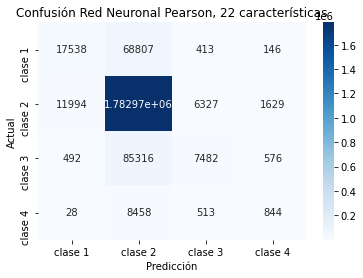

Confusión Red Neuronal Pearson, 22 características:
[[  17538   68807     413     146]
 [  11994 1782969    6327    1629]
 [    492   85316    7482     576]
 [     28    8458     513     844]]
62298/62298 [==============================] - 28s 453us/step


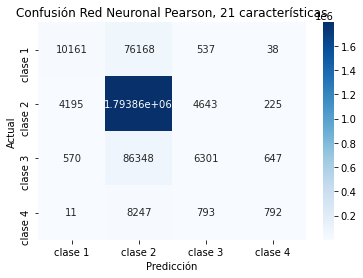

Confusión Red Neuronal Pearson, 21 características:
[[  10161   76168     537      38]
 [   4195 1793856    4643     225]
 [    570   86348    6301     647]
 [     11    8247     793     792]]
62298/62298 [==============================] - 29s 457us/step


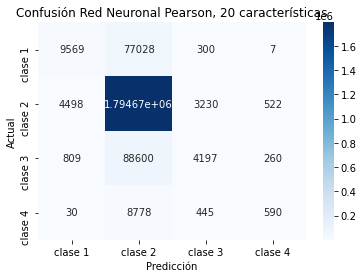

Confusión Red Neuronal Pearson, 20 características:
[[   9569   77028     300       7]
 [   4498 1794669    3230     522]
 [    809   88600    4197     260]
 [     30    8778     445     590]]
62298/62298 [==============================] - 28s 445us/step


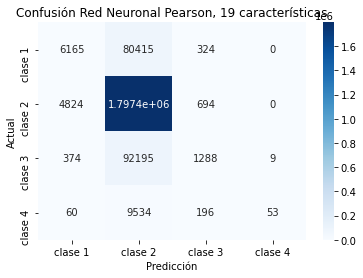

Confusión Red Neuronal Pearson, 19 características:
[[   6165   80415     324       0]
 [   4824 1797401     694       0]
 [    374   92195    1288       9]
 [     60    9534     196      53]]
62298/62298 [==============================] - 28s 450us/step


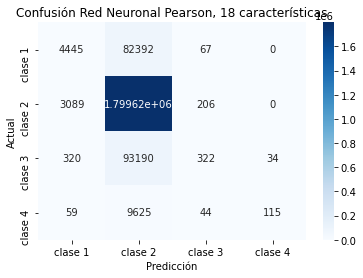

Confusión Red Neuronal Pearson, 18 características:
[[   4445   82392      67       0]
 [   3089 1799624     206       0]
 [    320   93190     322      34]
 [     59    9625      44     115]]
62298/62298 [==============================] - 27s 440us/step


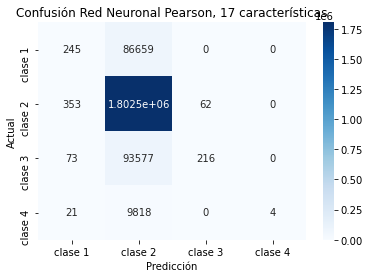

Confusión Red Neuronal Pearson, 17 características:
[[    245   86659       0       0]
 [    353 1802504      62       0]
 [     73   93577     216       0]
 [     21    9818       0       4]]
62298/62298 [==============================] - 28s 453us/step


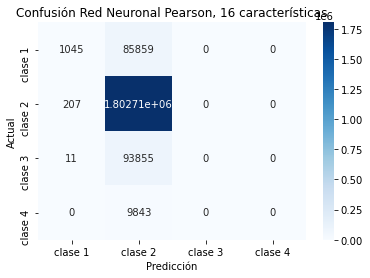

Confusión Red Neuronal Pearson, 16 características:
[[   1045   85859       0       0]
 [    207 1802712       0       0]
 [     11   93855       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 28s 442us/step


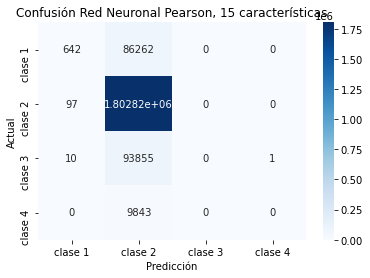

Confusión Red Neuronal Pearson, 15 características:
[[    642   86262       0       0]
 [     97 1802822       0       0]
 [     10   93855       0       1]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 457us/step


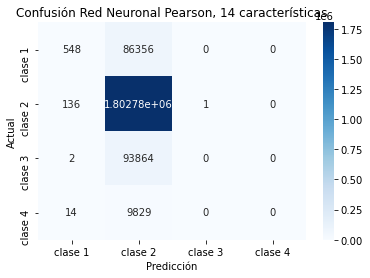

Confusión Red Neuronal Pearson, 14 características:
[[    548   86356       0       0]
 [    136 1802782       1       0]
 [      2   93864       0       0]
 [     14    9829       0       0]]
62298/62298 [==============================] - 28s 444us/step


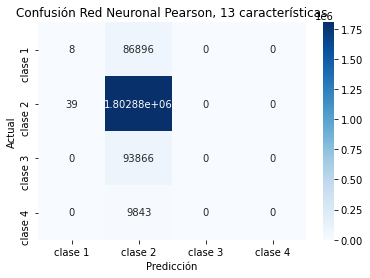

Confusión Red Neuronal Pearson, 13 características:
[[      8   86896       0       0]
 [     39 1802880       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 459us/step


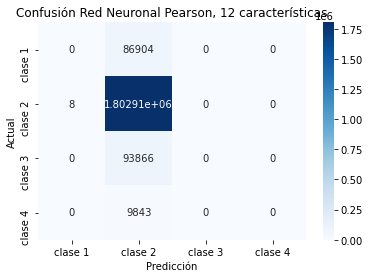

Confusión Red Neuronal Pearson, 12 características:
[[      0   86904       0       0]
 [      8 1802911       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 28s 456us/step


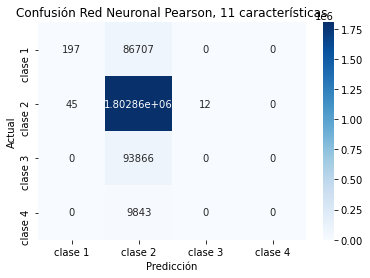

Confusión Red Neuronal Pearson, 11 características:
[[    197   86707       0       0]
 [     45 1802862      12       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 27s 426us/step


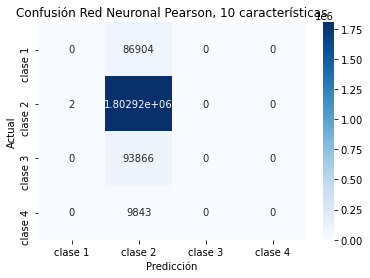

Confusión Red Neuronal Pearson, 10 características:
[[      0   86904       0       0]
 [      2 1802917       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 27s 432us/step


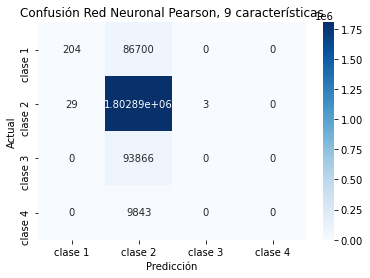

Confusión Red Neuronal Pearson, 9 características:
[[    204   86700       0       0]
 [     29 1802887       3       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 27s 437us/step


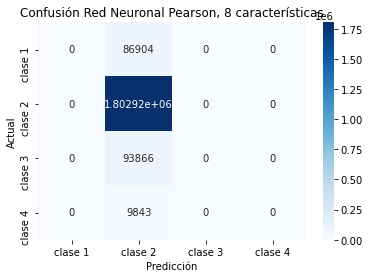

Confusión Red Neuronal Pearson, 8 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 28s 451us/step


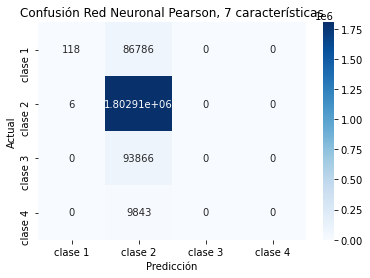

Confusión Red Neuronal Pearson, 7 características:
[[    118   86786       0       0]
 [      6 1802913       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 27s 435us/step


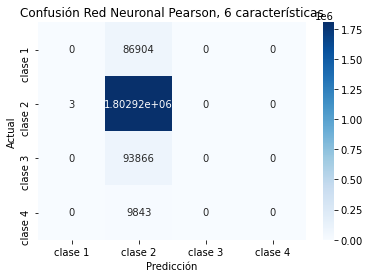

Confusión Red Neuronal Pearson, 6 características:
[[      0   86904       0       0]
 [      3 1802916       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 466us/step


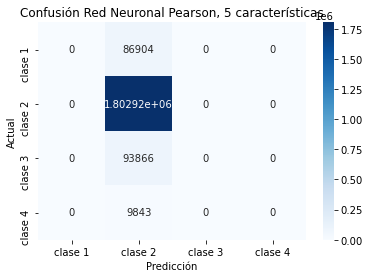

Confusión Red Neuronal Pearson, 5 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 458us/step


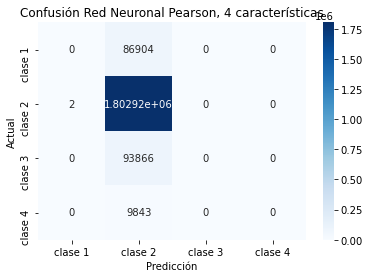

Confusión Red Neuronal Pearson, 4 características:
[[      0   86904       0       0]
 [      2 1802917       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 27s 430us/step


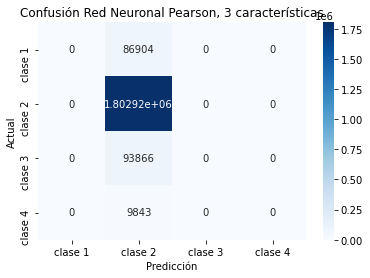

Confusión Red Neuronal Pearson, 3 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 26s 424us/step


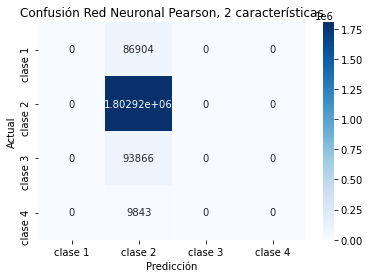

Confusión Red Neuronal Pearson, 2 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 460us/step


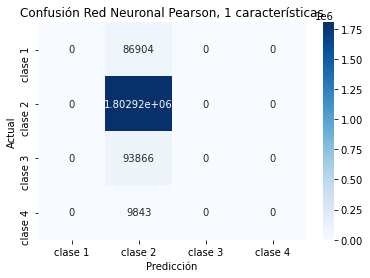

Confusión Red Neuronal Pearson, 1 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]


In [8]:

Mejores_Modelos_RUTA_csv = 'Aa_Mejores_Modelos_Pearson_SEGUNDO_clase4.csv'
mejores_modelos = pd.read_csv(Mejores_Modelos_RUTA_csv)


TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
# Cambia los valores de 'IMECA_Total' de 5 a 4
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['Pearson'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')


i=22
for _, mejor_modelo in mejores_modelos.iterrows():

    if len(caracteristicas_seleccionadas) <= 1:
        break
    

    caracteristicas_seleccionadas.pop()


    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]


    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    ruta_modelo = mejor_modelo['Ruta']
    nombre_modelo = mejor_modelo['Mejor_Modelo']
    
    modelos_cargados = cargar_modelos(ruta_modelo)
    modelo_especifico = modelos_cargados[nombre_modelo]
    
    y_pred = modelo_especifico.predict(X_test)
    
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_pred_labels = [x + 1 for x in y_pred_labels]
    
    labels = ['clase 1', 'clase 2', 'clase 3', 'clase 4']
    
    conf_matrix = confusion_matrix(y_test.to_list(), y_pred_labels)
    sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues", fmt="g")
    
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.title(f'Confusión Red Neuronal Pearson, {i} características')
    
    plt.show()
    
    print(f"Confusión Red Neuronal Pearson, {i} características:")
    print(conf_matrix)
    i=i-1

# CART

In [9]:
# Cargar características seleccionadas
seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['CART'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')

# Cargar y preparar los datos
TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']

# Definir las rutas de los modelos
base_nombre = 'Modelo_neuronal_CART_con_'
ext_nombre = '_caracteristicas.pkl'
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in range(23, 1, -1)]

mejores_modelos = []
matrices_confusion = []

for ruta in rutas_modelos:
    print('ruta', ruta)
    if len(caracteristicas_seleccionadas) == 1:
        break

    caracteristicas_seleccionadas.pop()
    print('características seleccionadas')
    print(caracteristicas_seleccionadas)

    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    predicciones_mejor_modelo = None
    i = 1
    for nombre_modelo, modelo in modelos_cargados.items():
        rendimiento, y_pred_labels = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {i} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        
        if predicciones_mejor_modelo is None or rendimiento > rendimientos[mejor_modelo]:
            mejor_modelo = nombre_modelo
            predicciones_mejor_modelo = y_pred_labels
        
        i += 1
        print(' ')
    
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con un recall de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    # Guardar información del mejor modelo
    mejores_modelos.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, predicciones_mejor_modelo)

    # Imprimir la matriz de confusión
    print(f"Matriz de Confusión para el modelo en {ruta}:")
    print(cm)

    # Guardar la matriz de confusión
    matrices_confusion.append({
        'Ruta': ruta,
        'Confusion_Matrix': cm
    })

# Guardar los mejores modelos en un CSV
df_mejores_modelos = pd.DataFrame(mejores_modelos)
df_mejores_modelos.to_csv('Aa_Mejores_Modelos_CART_SEGUNDO_clase4.csv', index=False)
print("Los mejores modelos se han guardado en 'Aa_Mejores_Modelos_CART_SEGUNDO_clase4.csv'.")

ruta Modelo_neuronal_CART_con_23_caracteristicas.pkl
características seleccionadas
['IMECA_Total', 'T_air', 'T_amb_Max', 'Irradiation_Tot', 'BattV_Min', 'Wind_Chill_Avg', 'RH_Avg', 'Wind_Direction_Avg', 'T_amb_Min', 'T_Wet_Bulb_Avg', 'P_atm_q', 'Sun_Hrs_Tot', 'Pot_Irradiance_Avg', 'Irradiance_Avg', 'Dew_Point_Avg', 'Wind_Speed_Avg', 'Wind_Speed_Max', 'T_amb_Avg', 'Wind_Direction_SMM', 'Wind_Speed_Std', 'Wind_Direction_Std', 'Heat_Inedx_Avg', 'P_Sat_vap_Avg']
62298/62298 [==============================] - 29s 465us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.007111652951335975
 
62298/62298 [==============================] - 28s 449us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.04368586812963527
 
62298/62298 [==============================] - 28s 455us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0455

62298/62298 [==============================] - 28s 451us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.00284466118053439
 
62298/62298 [==============================] - 28s 456us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.02113176876968404
 
62298/62298 [==============================] - 29s 459us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.022147719191303466
 
62298/62298 [==============================] - 29s 459us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.007010057909174032
 
62298/62298 [==============================] - 28s 449us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.026719496088590877
 
62298/62298 [==============================] - 28s 453us/step
Acabé 6 veces c

62298/62298 [==============================] - 29s 459us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.01920146296860713
 
62298/62298 [==============================] - 27s 438us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.00081276033729554
 
62298/62298 [==============================] - 28s 451us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es: 0.0
 
62298/62298 [==============================] - 29s 461us/step
Acabé 7 veces con el modelo modelo_prueba_kfold_7.
Rendimiento del modelo modelo_prueba_kfold_7 es: 0.004266991770801585
 
62298/62298 [==============================] - 28s 455us/step
Acabé 8 veces con el modelo modelo_prueba_kfold_8.
Rendimiento del modelo modelo_prueba_kfold_8 es: 0.003860611602153815
 
62298/62298 [==============================] - 28s 444us/step
Acabé 9 veces con el modelo mode

62298/62298 [==============================] - 28s 450us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0
 
62298/62298 [==============================] - 28s 450us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0
 
62298/62298 [==============================] - 28s 453us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0
 
62298/62298 [==============================] - 27s 435us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.0
 
62298/62298 [==============================] - 27s 439us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.0
 
62298/62298 [==============================] - 27s 429us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es

62298/62298 [==============================] - 28s 456us/step
Acabé 10 veces con el modelo modelo_prueba_kfold_10.
Rendimiento del modelo modelo_prueba_kfold_10 es: 0.0
 
El mejor modelo para Modelo_neuronal_CART_con_7_caracteristicas.pkl es: modelo_prueba_kfold_1
Con un recall de: 0.0
 
Matriz de Confusión para el modelo en Modelo_neuronal_CART_con_7_caracteristicas.pkl:
[[    182   86722       0       0]
 [    306 1802612       1       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
ruta Modelo_neuronal_CART_con_6_caracteristicas.pkl
características seleccionadas
['IMECA_Total', 'T_air', 'T_amb_Max', 'Irradiation_Tot', 'BattV_Min', 'Wind_Chill_Avg']
62298/62298 [==============================] - 27s 439us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0
 
62298/62298 [==============================] - 28s 442us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_pru

62298/62298 [==============================] - 29s 471us/step


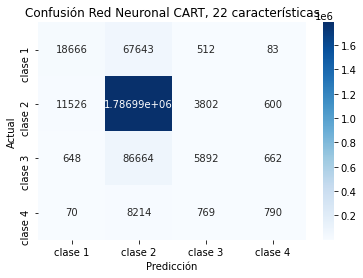

Confusión Red Neuronal CART, 22 características:
[[  18666   67643     512      83]
 [  11526 1786991    3802     600]
 [    648   86664    5892     662]
 [     70    8214     769     790]]
62298/62298 [==============================] - 29s 461us/step


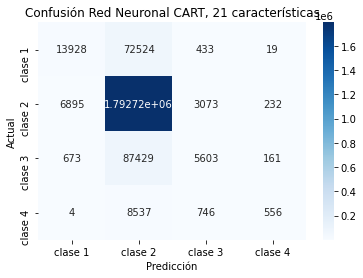

Confusión Red Neuronal CART, 21 características:
[[  13928   72524     433      19]
 [   6895 1792719    3073     232]
 [    673   87429    5603     161]
 [      4    8537     746     556]]
62298/62298 [==============================] - 28s 452us/step


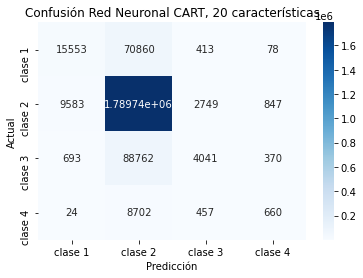

Confusión Red Neuronal CART, 20 características:
[[  15553   70860     413      78]
 [   9583 1789740    2749     847]
 [    693   88762    4041     370]
 [     24    8702     457     660]]
62298/62298 [==============================] - 27s 426us/step


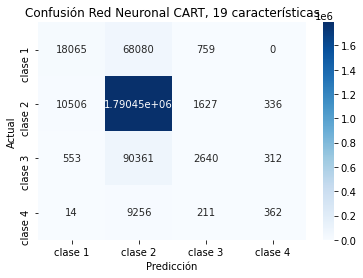

Confusión Red Neuronal CART, 19 características:
[[  18065   68080     759       0]
 [  10506 1790450    1627     336]
 [    553   90361    2640     312]
 [     14    9256     211     362]]
62298/62298 [==============================] - 28s 456us/step


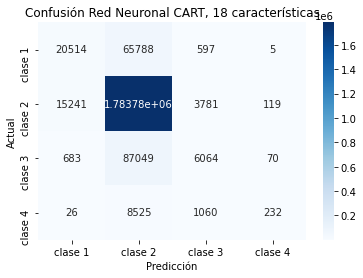

Confusión Red Neuronal CART, 18 características:
[[  20514   65788     597       5]
 [  15241 1783778    3781     119]
 [    683   87049    6064      70]
 [     26    8525    1060     232]]
62298/62298 [==============================] - 29s 460us/step


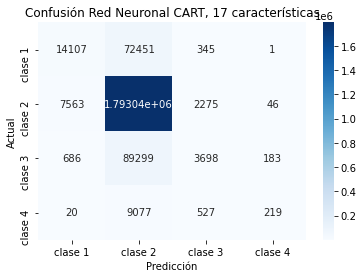

Confusión Red Neuronal CART, 17 características:
[[  14107   72451     345       1]
 [   7563 1793035    2275      46]
 [    686   89299    3698     183]
 [     20    9077     527     219]]
62298/62298 [==============================] - 28s 455us/step


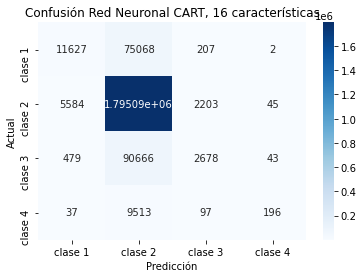

Confusión Red Neuronal CART, 16 características:
[[  11627   75068     207       2]
 [   5584 1795087    2203      45]
 [    479   90666    2678      43]
 [     37    9513      97     196]]
62298/62298 [==============================] - 30s 481us/step


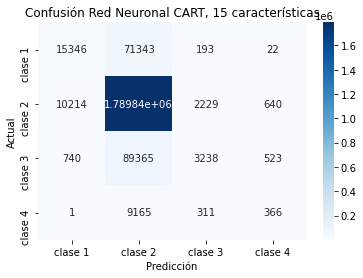

Confusión Red Neuronal CART, 15 características:
[[  15346   71343     193      22]
 [  10214 1789836    2229     640]
 [    740   89365    3238     523]
 [      1    9165     311     366]]
62298/62298 [==============================] - 28s 451us/step


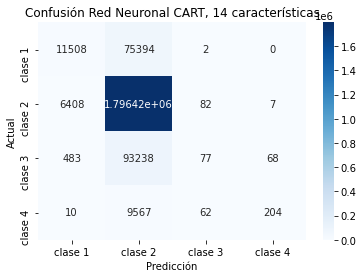

Confusión Red Neuronal CART, 14 características:
[[  11508   75394       2       0]
 [   6408 1796422      82       7]
 [    483   93238      77      68]
 [     10    9567      62     204]]
62298/62298 [==============================] - 28s 456us/step


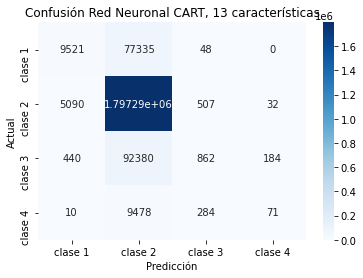

Confusión Red Neuronal CART, 13 características:
[[   9521   77335      48       0]
 [   5090 1797290     507      32]
 [    440   92380     862     184]
 [     10    9478     284      71]]
62298/62298 [==============================] - 29s 458us/step


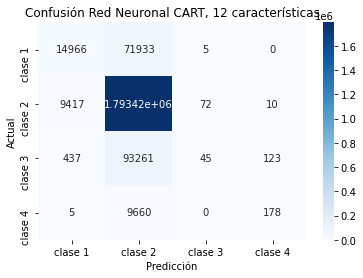

Confusión Red Neuronal CART, 12 características:
[[  14966   71933       5       0]
 [   9417 1793420      72      10]
 [    437   93261      45     123]
 [      5    9660       0     178]]
62298/62298 [==============================] - 29s 462us/step


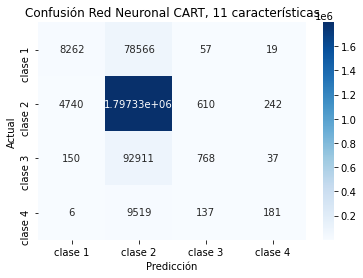

Confusión Red Neuronal CART, 11 características:
[[   8262   78566      57      19]
 [   4740 1797327     610     242]
 [    150   92911     768      37]
 [      6    9519     137     181]]
62298/62298 [==============================] - 28s 451us/step


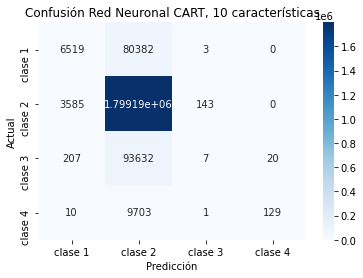

Confusión Red Neuronal CART, 10 características:
[[   6519   80382       3       0]
 [   3585 1799191     143       0]
 [    207   93632       7      20]
 [     10    9703       1     129]]
62298/62298 [==============================] - 29s 463us/step


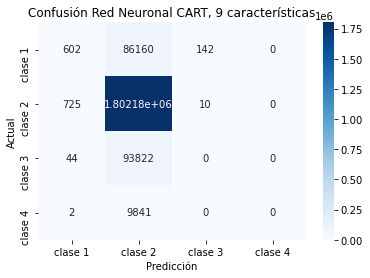

Confusión Red Neuronal CART, 9 características:
[[    602   86160     142       0]
 [    725 1802184      10       0]
 [     44   93822       0       0]
 [      2    9841       0       0]]
62298/62298 [==============================] - 28s 446us/step


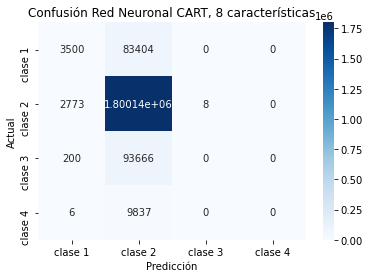

Confusión Red Neuronal CART, 8 características:
[[   3500   83404       0       0]
 [   2773 1800138       8       0]
 [    200   93666       0       0]
 [      6    9837       0       0]]
62298/62298 [==============================] - 29s 463us/step


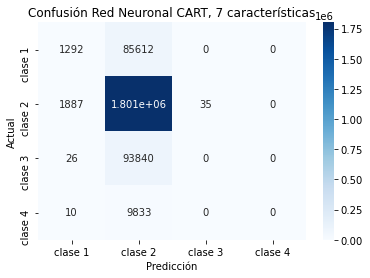

Confusión Red Neuronal CART, 7 características:
[[   1292   85612       0       0]
 [   1887 1800997      35       0]
 [     26   93840       0       0]
 [     10    9833       0       0]]
62298/62298 [==============================] - 28s 448us/step


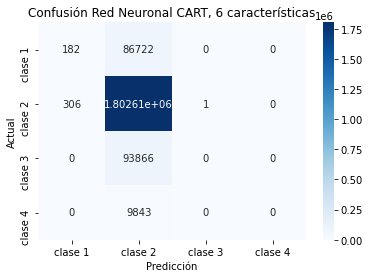

Confusión Red Neuronal CART, 6 características:
[[    182   86722       0       0]
 [    306 1802612       1       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 28s 443us/step


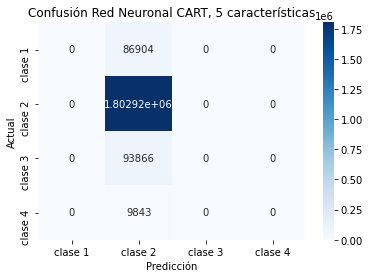

Confusión Red Neuronal CART, 5 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 462us/step


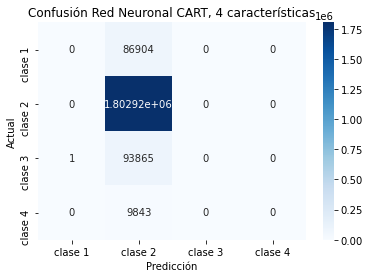

Confusión Red Neuronal CART, 4 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      1   93865       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 461us/step


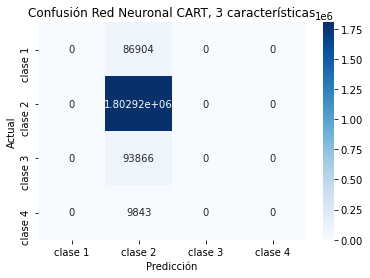

Confusión Red Neuronal CART, 3 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 27s 440us/step


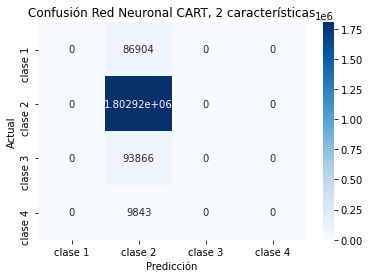

Confusión Red Neuronal CART, 2 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 28s 441us/step


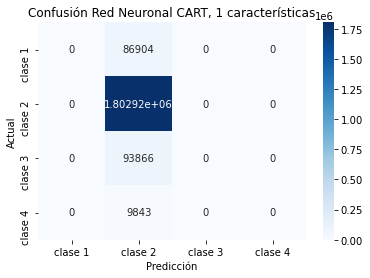

Confusión Red Neuronal CART, 1 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]


In [10]:
Mejores_Modelos_RUTA_csv = 'Aa_Mejores_Modelos_CART_SEGUNDO_clase4.csv'
mejores_modelos = pd.read_csv(Mejores_Modelos_RUTA_csv)


TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
# Cambia los valores de 'IMECA_Total' de 5 a 4
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['CART'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')


i=22
for _, mejor_modelo in mejores_modelos.iterrows():

    if len(caracteristicas_seleccionadas) <= 1:
        break
    

    caracteristicas_seleccionadas.pop()


    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]


    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    ruta_modelo = mejor_modelo['Ruta']
    nombre_modelo = mejor_modelo['Mejor_Modelo']
    
    modelos_cargados = cargar_modelos(ruta_modelo)
    modelo_especifico = modelos_cargados[nombre_modelo]
    
    y_pred = modelo_especifico.predict(X_test)
    
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_pred_labels = [x + 1 for x in y_pred_labels]
    
    labels = ['clase 1', 'clase 2', 'clase 3', 'clase 4']
    
    conf_matrix = confusion_matrix(y_test.to_list(), y_pred_labels)
    sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues", fmt="g")
    
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.title(f'Confusión Red Neuronal CART, {i} características')
    
    plt.show()
    
    print(f"Confusión Red Neuronal CART, {i} características:")
    print(conf_matrix)
    i=i-1

# ID3

In [6]:
# Cargar características seleccionadas
seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['ID3'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')

# Cargar y preparar los datos
TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']

# Definir las rutas de los modelos
base_nombre = 'Modelo_neuronal_ID3_con_'
ext_nombre = '_caracteristicas.pkl'
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in range(23, 1, -1)]

mejores_modelos = []
matrices_confusion = []

for ruta in rutas_modelos:
    print('ruta', ruta)
    if len(caracteristicas_seleccionadas) == 1:
        break

    caracteristicas_seleccionadas.pop()
    print('características seleccionadas')
    print(caracteristicas_seleccionadas)

    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    predicciones_mejor_modelo = None
    i = 1
    for nombre_modelo, modelo in modelos_cargados.items():
        rendimiento, y_pred_labels = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {i} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        
        if predicciones_mejor_modelo is None or rendimiento > rendimientos[mejor_modelo]:
            mejor_modelo = nombre_modelo
            predicciones_mejor_modelo = y_pred_labels
        
        i += 1
        print(' ')
    
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con un recall de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    # Guardar información del mejor modelo
    mejores_modelos.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })
    
    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, predicciones_mejor_modelo)

    # Imprimir la matriz de confusión
    print(f"Matriz de Confusión para el modelo en {ruta}:")
    print(cm)

    # Guardar la matriz de confusión
    matrices_confusion.append({
        'Ruta': ruta,
        'Confusion_Matrix': cm
    })

# Guardar los mejores modelos en un CSV
df_mejores_modelos = pd.DataFrame(mejores_modelos)
df_mejores_modelos.to_csv('Aa_Mejores_Modelos_ID3_SEGUNDO_clase4.csv', index=False)
print("Los mejores modelos se han guardado en 'Aa_Mejores_Modelos_ID3_SEGUNDO_clase4.csv'.")

ruta Modelo_neuronal_ID3_con_23_caracteristicas.pkl
características seleccionadas
['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg', 'P_atm_q', 'T_amb_Min', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'RH_Avg', 'Wind_Direction_Avg', 'BattV_Min', 'Wind_Speed_Std', 'Wind_Direction_SMM', 'T_Wet_Bulb_Avg', 'Sun_Hrs_Tot', 'Wind_Direction_Std', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Chill_Avg', 'Wind_Speed_Max', 'T_amb_Avg', 'Irradiance_Avg']
62298/62298 [==============================] - 31s 491us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.001422330590267195
 
62298/62298 [==============================] - 30s 483us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0325104134918216
 
62298/62298 [==============================] - 30s 483us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.005486

62298/62298 [==============================] - 29s 468us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.016356801788072743
 
62298/62298 [==============================] - 29s 467us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.013512140607538352
 
62298/62298 [==============================] - 29s 472us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.033627958955602964
 
62298/62298 [==============================] - 29s 466us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.0031494463070202176
 
62298/62298 [==============================] - 29s 458us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.004978157065935182
 
62298/62298 [==============================] - 29s 471us/step
Acabé 6 vece

62298/62298 [==============================] - 30s 475us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.008635578583765112
 
62298/62298 [==============================] - 29s 462us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.005587727318906837
 
62298/62298 [==============================] - 29s 471us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es: 0.01015950421619425
 
62298/62298 [==============================] - 29s 466us/step
Acabé 7 veces con el modelo modelo_prueba_kfold_7.
Rendimiento del modelo modelo_prueba_kfold_7 es: 0.015950421619424972
 
62298/62298 [==============================] - 29s 470us/step
Acabé 8 veces con el modelo modelo_prueba_kfold_8.
Rendimiento del modelo modelo_prueba_kfold_8 es: 0.00040638016864777
 
62298/62298 [==============================] - 29s 472us/step
Acabé 9 veces c

62298/62298 [==============================] - 29s 459us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0
 
62298/62298 [==============================] - 30s 475us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0
 
62298/62298 [==============================] - 29s 468us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.0
 
62298/62298 [==============================] - 29s 463us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.0
 
62298/62298 [==============================] - 30s 475us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es: 0.0
 
62298/62298 [==============================] - 29s 460us/step
Acabé 7 veces con el modelo modelo_prueba_kfold_7.
Rendimiento del modelo modelo_prueba_kfold_7 es

Matriz de Confusión para el modelo en Modelo_neuronal_ID3_con_7_caracteristicas.pkl:
[[     31   86873       0       0]
 [    182 1802737       0       0]
 [     10   93856       0       0]
 [      1    9842       0       0]]
ruta Modelo_neuronal_ID3_con_6_caracteristicas.pkl
características seleccionadas
['IMECA_Total', 'T_air', 'T_amb_Max', 'P_Sat_vap_Avg', 'P_atm_q', 'T_amb_Min']
62298/62298 [==============================] - 29s 460us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0
 
62298/62298 [==============================] - 30s 474us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0
 
62298/62298 [==============================] - 29s 468us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0
 
62298/62298 [==============================] - 29s 466us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_

62298/62298 [==============================] - 29s 461us/step
Acabé 9 veces con el modelo modelo_prueba_kfold_9.
Rendimiento del modelo modelo_prueba_kfold_9 es: 0.0
 
62298/62298 [==============================] - 29s 468us/step
Acabé 10 veces con el modelo modelo_prueba_kfold_10.
Rendimiento del modelo modelo_prueba_kfold_10 es: 0.0
 
El mejor modelo para Modelo_neuronal_ID3_con_3_caracteristicas.pkl es: modelo_prueba_kfold_1
Con un recall de: 0.0
 
Matriz de Confusión para el modelo en Modelo_neuronal_ID3_con_3_caracteristicas.pkl:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
ruta Modelo_neuronal_ID3_con_2_caracteristicas.pkl
características seleccionadas
['IMECA_Total', 'T_air']
62298/62298 [==============================] - 29s 460us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0
 
62298/62298 [==============================]

62298/62298 [==============================] - 29s 471us/step


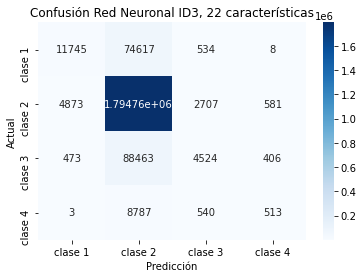

Confusión Red Neuronal ID3, 22 características:
[[  11745   74617     534       8]
 [   4873 1794758    2707     581]
 [    473   88463    4524     406]
 [      3    8787     540     513]]
62298/62298 [==============================] - 29s 470us/step


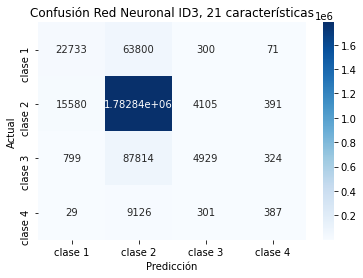

Confusión Red Neuronal ID3, 21 características:
[[  22733   63800     300      71]
 [  15580 1782843    4105     391]
 [    799   87814    4929     324]
 [     29    9126     301     387]]
62298/62298 [==============================] - 29s 466us/step


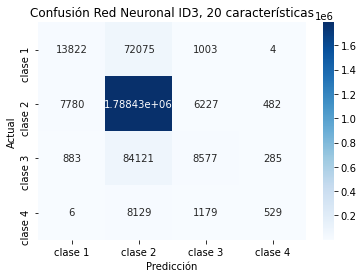

Confusión Red Neuronal ID3, 20 características:
[[  13822   72075    1003       4]
 [   7780 1788430    6227     482]
 [    883   84121    8577     285]
 [      6    8129    1179     529]]
62298/62298 [==============================] - 30s 477us/step


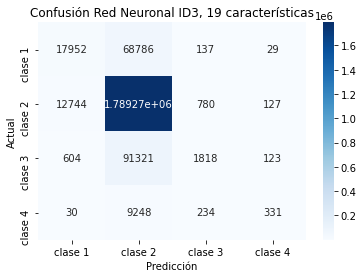

Confusión Red Neuronal ID3, 19 características:
[[  17952   68786     137      29]
 [  12744 1789268     780     127]
 [    604   91321    1818     123]
 [     30    9248     234     331]]
62298/62298 [==============================] - 28s 456us/step


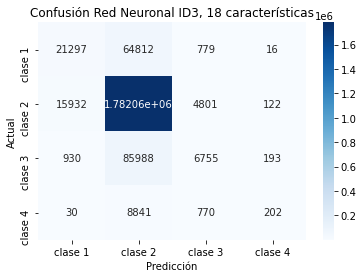

Confusión Red Neuronal ID3, 18 características:
[[  21297   64812     779      16]
 [  15932 1782064    4801     122]
 [    930   85988    6755     193]
 [     30    8841     770     202]]
62298/62298 [==============================] - 29s 463us/step


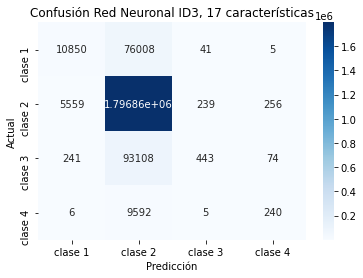

Confusión Red Neuronal ID3, 17 características:
[[  10850   76008      41       5]
 [   5559 1796865     239     256]
 [    241   93108     443      74]
 [      6    9592       5     240]]
62298/62298 [==============================] - 30s 474us/step


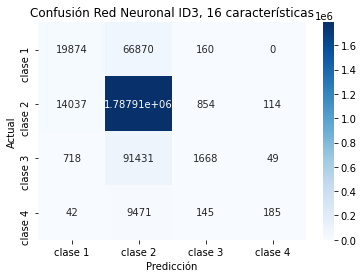

Confusión Red Neuronal ID3, 16 características:
[[  19874   66870     160       0]
 [  14037 1787914     854     114]
 [    718   91431    1668      49]
 [     42    9471     145     185]]
62298/62298 [==============================] - 30s 476us/step


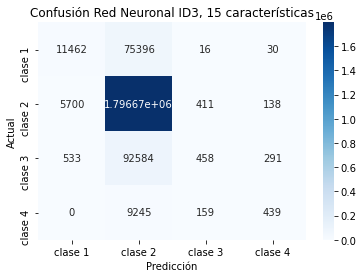

Confusión Red Neuronal ID3, 15 características:
[[  11462   75396      16      30]
 [   5700 1796670     411     138]
 [    533   92584     458     291]
 [      0    9245     159     439]]
62298/62298 [==============================] - 29s 458us/step


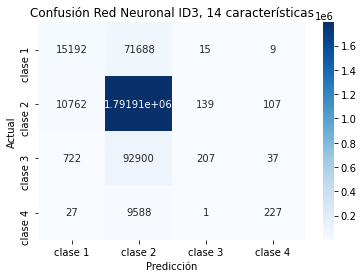

Confusión Red Neuronal ID3, 14 características:
[[  15192   71688      15       9]
 [  10762 1791911     139     107]
 [    722   92900     207      37]
 [     27    9588       1     227]]
62298/62298 [==============================] - 29s 470us/step


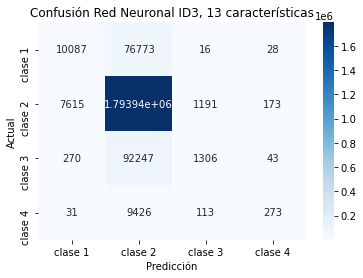

Confusión Red Neuronal ID3, 13 características:
[[  10087   76773      16      28]
 [   7615 1793940    1191     173]
 [    270   92247    1306      43]
 [     31    9426     113     273]]
62298/62298 [==============================] - 30s 484us/step


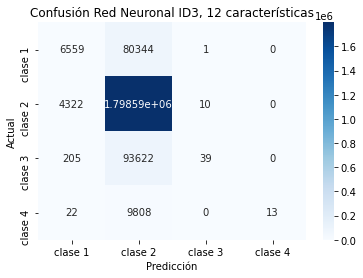

Confusión Red Neuronal ID3, 12 características:
[[   6559   80344       1       0]
 [   4322 1798587      10       0]
 [    205   93622      39       0]
 [     22    9808       0      13]]
62298/62298 [==============================] - 29s 465us/step


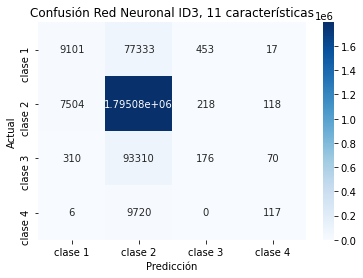

Confusión Red Neuronal ID3, 11 características:
[[   9101   77333     453      17]
 [   7504 1795079     218     118]
 [    310   93310     176      70]
 [      6    9720       0     117]]
62298/62298 [==============================] - 29s 460us/step


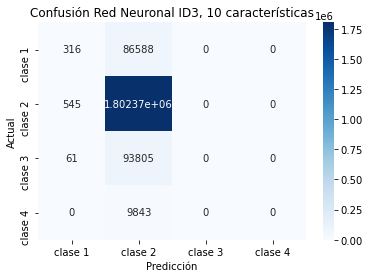

Confusión Red Neuronal ID3, 10 características:
[[    316   86588       0       0]
 [    545 1802374       0       0]
 [     61   93805       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 30s 474us/step


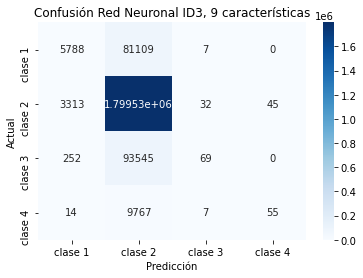

Confusión Red Neuronal ID3, 9 características:
[[   5788   81109       7       0]
 [   3313 1799529      32      45]
 [    252   93545      69       0]
 [     14    9767       7      55]]
62298/62298 [==============================] - 29s 470us/step


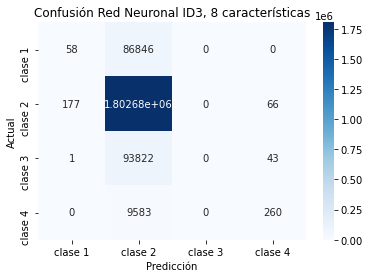

Confusión Red Neuronal ID3, 8 características:
[[     58   86846       0       0]
 [    177 1802676       0      66]
 [      1   93822       0      43]
 [      0    9583       0     260]]
62298/62298 [==============================] - 29s 457us/step


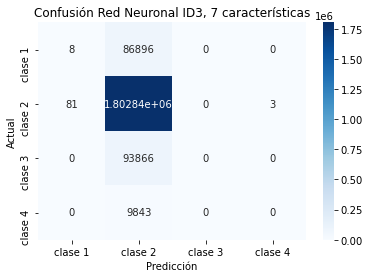

Confusión Red Neuronal ID3, 7 características:
[[      8   86896       0       0]
 [     81 1802835       0       3]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 466us/step


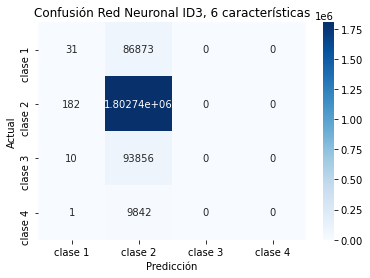

Confusión Red Neuronal ID3, 6 características:
[[     31   86873       0       0]
 [    182 1802737       0       0]
 [     10   93856       0       0]
 [      1    9842       0       0]]
62298/62298 [==============================] - 29s 466us/step


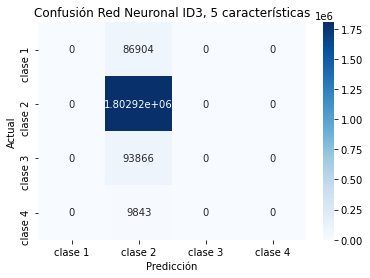

Confusión Red Neuronal ID3, 5 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 30s 474us/step


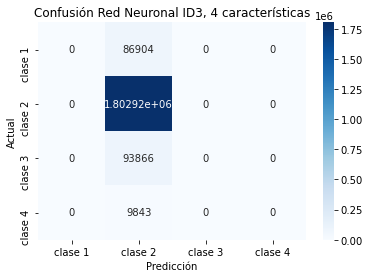

Confusión Red Neuronal ID3, 4 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 459us/step


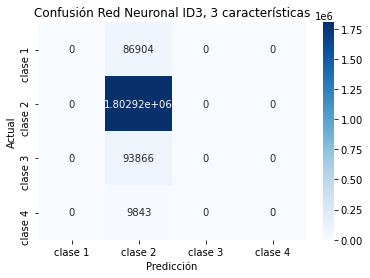

Confusión Red Neuronal ID3, 3 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 461us/step


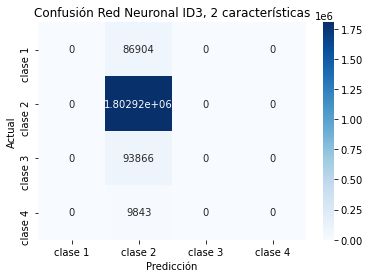

Confusión Red Neuronal ID3, 2 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]
62298/62298 [==============================] - 29s 470us/step


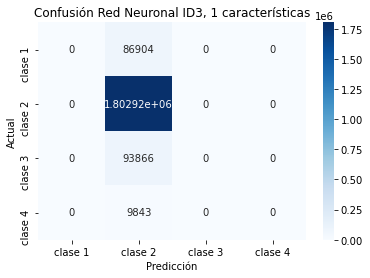

Confusión Red Neuronal ID3, 1 características:
[[      0   86904       0       0]
 [      0 1802919       0       0]
 [      0   93866       0       0]
 [      0    9843       0       0]]


In [7]:
Mejores_Modelos_RUTA_csv = 'Aa_Mejores_Modelos_ID3_SEGUNDO_clase4.csv'
mejores_modelos = pd.read_csv(Mejores_Modelos_RUTA_csv)


TIMES = 'Data_Original.csv'
df_normalizado1 = pd.read_csv(TIMES)
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
# Cambia los valores de 'IMECA_Total' de 5 a 4
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


seleccion_caracteristicas_csv = 'Seleccion_caracteristicas_todos.csv'
df_seleccion1 = pd.read_csv(seleccion_caracteristicas_csv)
caracteristicas_seleccionadas = df_seleccion1['ID3'].tolist()
caracteristicas_seleccionadas.remove('IMECA_Total')
caracteristicas_seleccionadas.insert(0, 'IMECA_Total')


i=22
for _, mejor_modelo in mejores_modelos.iterrows():

    if len(caracteristicas_seleccionadas) <= 1:
        break
    

    caracteristicas_seleccionadas.pop()


    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_seleccionadas]


    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    ruta_modelo = mejor_modelo['Ruta']
    nombre_modelo = mejor_modelo['Mejor_Modelo']
    
    modelos_cargados = cargar_modelos(ruta_modelo)
    modelo_especifico = modelos_cargados[nombre_modelo]
    
    y_pred = modelo_especifico.predict(X_test)
    
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_pred_labels = [x + 1 for x in y_pred_labels]
    
    labels = ['clase 1', 'clase 2', 'clase 3', 'clase 4']
    
    conf_matrix = confusion_matrix(y_test.to_list(), y_pred_labels)
    sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, cmap="Blues", fmt="g")
    
    plt.xlabel('Predicción')
    plt.ylabel('Actual')
    plt.title(f'Confusión Red Neuronal ID3, {i} características')
    
    plt.show()
    
    print(f"Confusión Red Neuronal ID3, {i} características:")
    print(conf_matrix)
    i=i-1

# LASSO

In [6]:
def evaluar_modelo(modelo, X_test, y_test):
    # Evaluar el modelo en los datos de prueba
    y_pred = modelo.predict(X_test)
    
    # Convertir las predicciones a etiquetas si es necesario
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred_labels = np.argmax(y_pred, axis=1) + 1
    else:
        y_pred_labels = y_pred.astype(int)
    
    # Calcular el recall para la clase 4
    recall_clase_4 = recall_score(y_test, y_pred_labels, labels=[4], average='micro')
    return recall_clase_4


import pandas as pd

# Cargar las características seleccionadas de LASSO
df_lasso = pd.read_csv('Seleccion_caracteristicas_LASSO.csv')
df_lasso = df_lasso.iloc[:, 1:]

# Cargar y preparar los datos originales
df_normalizado1 = pd.read_csv('Data_Original.csv')
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3','PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

# Crear la lista de características seleccionadas
caracteristicas_seleccionadas = []

for col in df_lasso.columns:
    caracteristicas = ['IMECA_Total'] + df_lasso[col].dropna().tolist()
    caracteristicas_seleccionadas.append(caracteristicas)

# Definir las rutas de los modelos
base_nombre = 'Modelo_neuronal_Lasso_con_'
ext_nombre = '_caracteristicas.pkl'
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in range(23, 1, -1)]

mejores_modelos = []

for i, ruta in enumerate(rutas_modelos):
    print('ruta', ruta)

    if len(caracteristicas_seleccionadas) <= i:
        break

    # Seleccionar las características correspondientes para este modelo
    caracteristicas_actuales = caracteristicas_seleccionadas[i]
    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_actuales]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    for j, (nombre_modelo, modelo) in enumerate(modelos_cargados.items()):
        rendimiento = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {j+1} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        print(' ')
    
    mejor_modelo = max(rendimientos, key=rendimientos.get)
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con una precisión de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    mejores_modelos.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Precision': rendimientos[mejor_modelo]
    })

# Guardar los resultados en un CSV
df_mejores_modelos = pd.DataFrame(mejores_modelos)
df_mejores_modelos.to_csv('Aa_Mejores_Modelos_Lasso_SEGUNDO_clase4.csv', index=False)

print("Los mejores modelos se han guardado en 'Aa_Mejores_Modelos_Lasso_SEGUNDO_clase4.csv'.")


ruta Modelo_neuronal_Lasso_con_23_caracteristicas.pkl
62298/62298 [==============================] - 29s 469us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.006400487656202377
 
62298/62298 [==============================] - 29s 465us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.004673371939449355
 
62298/62298 [==============================] - 29s 466us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.005486132276744895
 
62298/62298 [==============================] - 31s 489us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.02600833079345728
 
62298/62298 [==============================] - 30s 483us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.028649801889667783
 
62298/62298 [=========

62298/62298 [==============================] - 29s 461us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.03830133089505232
 
62298/62298 [==============================] - 29s 462us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.02519557045616174
 
62298/62298 [==============================] - 28s 455us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.016052016661586916
 
62298/62298 [==============================] - 29s 457us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.0001015950421619425
 
62298/62298 [==============================] - 29s 459us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.0035558264756679874
 
62298/62298 [==============================] - 29s 457us/step
Acabé 6 veces

62298/62298 [==============================] - 29s 469us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0
 
62298/62298 [==============================] - 28s 452us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0
 
62298/62298 [==============================] - 29s 471us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.0011175454637813674
 
62298/62298 [==============================] - 29s 465us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.018083917504825766
 
62298/62298 [==============================] - 29s 464us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es: 0.0
 
62298/62298 [==============================] - 28s 455us/step
Acabé 7 veces con el modelo modelo_prueba_kfold_7.
Rendimiento 

62298/62298 [==============================] - 29s 464us/step
Acabé 9 veces con el modelo modelo_prueba_kfold_9.
Rendimiento del modelo modelo_prueba_kfold_9 es: 0.0
 
62298/62298 [==============================] - 33s 530us/step
Acabé 10 veces con el modelo modelo_prueba_kfold_10.
Rendimiento del modelo modelo_prueba_kfold_10 es: 0.0
 
El mejor modelo para Modelo_neuronal_Lasso_con_7_caracteristicas.pkl es: modelo_prueba_kfold_1
Con una precisión de: 0.0
 
ruta Modelo_neuronal_Lasso_con_6_caracteristicas.pkl
62298/62298 [==============================] - 29s 467us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0
 
62298/62298 [==============================] - 30s 473us/step
Acabé 2 veces con el modelo modelo_prueba_kfold_2.
Rendimiento del modelo modelo_prueba_kfold_2 es: 0.0
 
62298/62298 [==============================] - 30s 475us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba

62298/62298 [==============================] - 29s 464us/step
Acabé 3 veces con el modelo modelo_prueba_kfold_3.
Rendimiento del modelo modelo_prueba_kfold_3 es: 0.0
 
62298/62298 [==============================] - 29s 461us/step
Acabé 4 veces con el modelo modelo_prueba_kfold_4.
Rendimiento del modelo modelo_prueba_kfold_4 es: 0.0
 
62298/62298 [==============================] - 29s 457us/step
Acabé 5 veces con el modelo modelo_prueba_kfold_5.
Rendimiento del modelo modelo_prueba_kfold_5 es: 0.0
 
62298/62298 [==============================] - 28s 449us/step
Acabé 6 veces con el modelo modelo_prueba_kfold_6.
Rendimiento del modelo modelo_prueba_kfold_6 es: 0.0
 
62298/62298 [==============================] - 29s 470us/step
Acabé 7 veces con el modelo modelo_prueba_kfold_7.
Rendimiento del modelo modelo_prueba_kfold_7 es: 0.0
 
62298/62298 [==============================] - 29s 461us/step
Acabé 8 veces con el modelo modelo_prueba_kfold_8.
Rendimiento del modelo modelo_prueba_kfold_8 es

# Extra de teoría de gráficas

In [19]:
# Leer el DataFrame de datos normalizados
df_red_neuronal1 = pd.read_csv('Data_Original.csv')
#df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2', 'PM25', 'NO2', 'CO', 'Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
#df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)
columnas_seleccionadas = [
    'Heat_Inedx_Avg', 'T_Wet_Bulb_Avg', 'Irradiance_Avg', 'RH_Avg', 'Wind_Direction_SMM',
    'Wind_Speed_Max', 'Wind_Chill_Avg', 'Sun_Hrs_Tot', 'Irradiation_Tot', 'Wind_Direction_Std', 
    'T_amb_Avg', 'Pot_Irradiance_Avg'
]

df_red_neuronal1 = df_red_neuronal1[columnas_seleccionadas + ['IMECA_Total']]

# Asegúrate de que la columna 'IMECA_Total' esté en el formato adecuado
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

In [9]:


# Ahora puedes llamar a tu función de entrenamiento como de costumbre
Tiempo, accuracy = experimentosMLP(df_red_neuronal1, nombre_archivo='Extra_Teoria_Graficas')
print(Tiempo, accuracy)

Epoch 1/50
35092/35884 [============================>.] - ETA: 0s - loss: 0.3539 - categorical_accuracy: 0.9044

KeyboardInterrupt: 

In [ ]:
df_rendimiento_Smote = pd.DataFrame({'Num_Características': 12,'Tiempo_Total': Tiempo, 'Accuracy_Promedio': accuracy}, index=[12])
    #'Num_Características': num_características,'Tiempo_Total': tiempo_total_lista, 'Accuracy_Promedio': acc_promedio_lista})

guardar_rendimiento = 'AaccuracyTime_Extra_Teoria_Graficas.csv'
df_rendimiento_Smote.to_csv(guardar_rendimiento, index=True)

In [20]:


# Separar características y etiquetas
X_test = df_red_neuronal1.drop('IMECA_Total', axis=1)
y_test = df_red_neuronal1['IMECA_Total']
#Segundo_Modelo_neuronal_
# Cargar los modelos entrenados
ruta_modelos = 'Segundo_Modelo_neuronal_Extra_Teoria_Graficas.pkl'
modelos_kfold = cargar_modelos(ruta_modelos)

# Evaluar cada uno de los modelos k-fold
mejor_recall = -1
mejor_modelo = None
mejor_kfold = None

for nombre_modelo, modelo in modelos_kfold.items():
    recall_clase_4, _ = evaluar_modelo(modelo, X_test, y_test)
    
    if recall_clase_4 > mejor_recall:
        mejor_recall = recall_clase_4
        mejor_modelo = modelo
        mejor_kfold = nombre_modelo

# Guardar la información del mejor modelo en un archivo CSV
if mejor_modelo:
    mejores_modelos_info = {
        'Mejor_KFold': [mejor_kfold],
        'Mejor_Recall_Clase_4': [mejor_recall]
    }

    df_mejor_modelo = pd.DataFrame(mejores_modelos_info)
    df_mejor_modelo.to_csv('Aa_Mejores_Modelos_extra_graficas_CLASE4.csv', index=False)

    print(f"El mejor modelo es {mejor_kfold} con un recall de la clase 4 de {mejor_recall:.4f}.")
else:
    print("No se encontró un modelo válido.")

62298/62298 [==============================] - 30s 488us/step
El mejor modelo es modelo_prueba_kfold_7 con un recall de la clase 4 de 0.0002.


# Modelo de gráficas

In [5]:
import pandas as pd


# Datos de importancia_varianza_graficas
#importancia_varianza_graficas = {
#    'Iteración 1': [('Wind_Direction_Avg', 37/4), ('Wind_Speed_Max', 8), ('Sun_Hrs_Tot', 29/4), 
#('T_amb_Min', 29/4), ('P_atm_q', 29/4), ('Irradiance_Avg', 29/4), ('Precipitation_Tot', 29/4), 
#('Dew_Point_Avg', 29/4), ('Pot_Irradiance_Avg', 29/4), ('Irradiation_Tot', 29/4), ('Wind_Speed_Avg', 29/4), 
#('Wind_Direction_Std', 29/4), ('Wind_Direction_SMM', 29/4), ('T_amb_Avg', 5/2)],

#    'Iteración 2': [('Irradiation_Tot', 23/2), ('Wind_Speed_Max', 45/4), ('Sun_Hrs_Tot', 10), ('Precipitation_Tot', 10), ('Dew_Point_Avg', 10), ('Pot_Irradiance_Avg', 10), ('Wind_Direction_Std', 10), ('Wind_Direction_SMM', 10), ('BattV_Min', 7/2)],
#    'Iteración 3': [('Wind_Speed_Max', 27/2), ('Sun_Hrs_Tot', 51/4), ('Precipitation_Tot', 51/4), ('Pot_Irradiance_Avg', 51/4), ('Irradiation_Tot', 23/2), ('Wind_Direction_Avg', 4)],
#    'Iteración 4': [('Wind_Speed_Avg', 29/2), ('Sun_Hrs_Tot', 49/4), ('Precipitation_Tot', 49/4), ('Pot_Irradiance_Avg', 49/4), ('Irradiation_Tot', 43/4), ('Wind_Direction_Avg', 13/4)],
#    'Iteración 5': [('Sun_Hrs_Tot', 25/2), ('Precipitation_Tot', 25/2), ('Wind_Direction_Std', 25/2), ('Wind_Speed_Max', 15/2), ('Wind_Direction_SMM', 6)],
#    'Iteración 6': [('Precipitation_Tot', 27/2), ('Wind_Direction_Std', 25/2), ('Wind_Direction_SMM', 7)],
#    'Iteración 7': [('Irradiance_Avg', 81/5), ('Wind_Direction_SMM', 37/5)],
#    'Iteración 8': [('Irradiation_Tot', 11), ('Wind_Direction_SMM', 42/5)],
#    'Iteración 9': [('Wind_Direction_Std', 26/5)],
#    'Iteración 10': [('Wind_Direction_Std', 6)]
#}


# Datos de importancia_varianza_graficas
importancia_varianza_graficas = {
    'Iteración 1': ['Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'RH_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 
                    'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Std', 'Wind_Speed_Max', 'Wind_Direction_SMM'],
    'Iteración 2': ['Sun_Hrs_Tot', 'RH_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
    'Iteración 3': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM'], 
    'Iteración 4': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
    'Iteración 5': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
    'Iteración 6': ['Precipitation_Tot', 'Wind_Direction_Std'],
    'Iteración 7': ['Wind_Direction_Std'],
    'Iteración 8': ['Wind_Direction_Std'],
    'Iteración 9': ['Wind_Direction_Std'],
    'Iteración 10': ['Wind_Direction_Std']
}


# Datos de importancia_ponderada_promedio_graficas
#importancia_ponderada_promedio_graficas = {
#    'Iteración 1': ['Sun_Hrs_Tot', 'T_amb_Max', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
#    'Iteración 2': ['Irradiance_Avg', 'Wind_Speed_Std', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM', 'T_amb_Max'],
#    'Iteración 3': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Wind_Speed_Std', 'Irradiation_Tot', 'Wind_Direction_Avg'],
#    'Iteración 4': ['Wind_Speed_Avg', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Direction_Avg'],
#    'Iteración 5': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Wind_Direction_Std', 'Wind_Speed_Std', 'Wind_Direction_SMM'],
#    'Iteración 6': ['Precipitation_Tot', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
#    'Iteración 7': ['Irradiance_Avg', 'Wind_Speed_Avg'],
#    'Iteración 8': ['Irradiation_Tot', 'Wind_Direction_SMM'],
#    'Iteración 9': ['Wind_Direction_Std'],
#    'Iteración 10': ['Precipitation_Tot']
#}

# Datos de importancia_ponderada_promedio_graficas
importancia_ponderada_promedio_graficas = {
    'Iteración 1': ['Sun_Hrs_Tot', 'T_amb_Max', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
    'Iteración 2': ['Sun_Hrs_Tot', 'T_amb_Max', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
    'Iteración 3': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'P_Sat_vap_Avg', 'Irradiation_Tot'],
    'Iteración 4': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Direction_Avg'],
    'Iteración 5': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Wind_Direction_Avg', 'Wind_Direction_Std'],
    'Iteración 6': ['Precipitation_Tot', 'Wind_Speed_Avg'],
    'Iteración 7': ['Wind_Speed_Avg'],
    'Iteración 8':  ['Wind_Speed_Max'],
    'Iteración 9': ['Wind_Direction_Std'],
    'Iteración 10': ['Precipitation_Tot']
}


#Importancia_CART_graficas={
#    'Iteración 1': ['Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Wind_Chill_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Avg', 'Wind_Direction_Std', 'Wind_Speed_Max', 'Wind_Direction_SMM'],
#    'Iteración 2': ['Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
#    'Iteración 3': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Direction_Avg', 'Wind_Speed_Max'],
#    'Iteración 4': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Avg'],
#    'Iteración 5': ['Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot'], 
#    'Iteración 6': ['T_air', 'Precipitation_Tot', 'Wind_Direction_Std'], 
#    'Iteración 7': ['T_air', 'Irradiance_Avg'], 
#    'Iteración 8': ['T_air', 'Irradiation_Tot'], 
#    'Iteración 9': ['Sun_Hrs_Tot'], 
#    'Iteración 10': ['T_air']
#}

Importancia_CART_graficas={
    'Iteración 1': ['Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Wind_Chill_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Avg', 'Wind_Direction_Std', 'Wind_Speed_Max', 'Wind_Direction_SMM'],
    'Iteración 2': ['Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
    'Iteración 3': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Direction_Avg', 'Wind_Speed_Max'],
    'Iteración 4': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Avg'],
    'Iteración 5': ['Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot'], 
    'Iteración 6': ['T_air', 'Precipitation_Tot', 'Wind_Direction_Std'], 
    'Iteración 7': ['T_air', 'Irradiance_Avg'], 
    'Iteración 8': ['T_air', 'Irradiation_Tot'], 
    'Iteración 9': ['Sun_Hrs_Tot'], 
    'Iteración 10': ['T_air']
}


#Importancia_ID3_graficas={
#    'Iteración 1': ['Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'Wind_Direction_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
#    'Iteración 2': ['Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Std', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
#    'Iteración 3': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Std', 'Wind_Direction_Avg'], 
#    'Iteración 4': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Avg'], 
#    'Iteración 5': ['Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Wind_Direction_Std'], 
#    'Iteración 6': ['T_air', 'Precipitation_Tot', 'Wind_Direction_Std'],
#    'Iteración 7': ['T_air', 'Irradiance_Avg'],
#    'Iteración 8': ['T_air', 'Irradiation_Tot'],
#    'Iteración 9': ['Sun_Hrs_Tot'],
#    'Iteración 10':['T_air']
#}


Importancia_ID3_graficas={
    'Iteración 1': ['Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'Wind_Direction_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
    'Iteración 2': ['Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Std', 'Wind_Direction_Std', 'Wind_Direction_SMM'],
    'Iteración 3': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Std', 'Wind_Direction_Avg'], 
    'Iteración 4': ['Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Avg'], 
    'Iteración 5': ['Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Wind_Direction_Std'], 
    'Iteración 6': ['T_air', 'Precipitation_Tot', 'Wind_Direction_Std'],
    'Iteración 7': ['T_air', 'Irradiance_Avg'],
    'Iteración 8': ['T_air', 'Irradiation_Tot'],
    'Iteración 9': ['Sun_Hrs_Tot'],
    'Iteración 10':['T_air']
}


# Asegurarse de que todas las listas tengan la misma longitud
max_len_varianza = max(len(v) for v in importancia_varianza_graficas.values())
max_len_centralidad = max(len(v) for v in importancia_ponderada_promedio_graficas.values())
max_len_CART = max(len(v) for v in Importancia_CART_graficas.values())
max_len_ID3 = max(len(v) for v in Importancia_ID3_graficas.values())


# Crear DataFrames y rellenar con None
df_varianza =    pd.DataFrame({f'Iteración {i+1}': imp + ['IMECA_Total'] + [None] * (max_len_varianza - len(imp)) for i, imp in enumerate(importancia_varianza_graficas.values())})
df_centralidad = pd.DataFrame({f'Iteración {i+1}': imp + ['IMECA_Total'] + [None] * (max_len_centralidad - len(imp)) for i, imp in enumerate(importancia_ponderada_promedio_graficas.values())})
df_CART =        pd.DataFrame({f'Iteración {i+1}': imp + ['IMECA_Total'] + [None] * (max_len_CART - len(imp)) for i, imp in enumerate(Importancia_CART_graficas.values())})
df_ID3 =         pd.DataFrame({f'Iteración {i+1}': imp + ['IMECA_Total'] + [None] * (max_len_ID3 - len(imp)) for i, imp in enumerate(Importancia_ID3_graficas.values())})


# Guardar DataFrames en archivos CSV
df_varianza.to_csv('Seleccion_caracteristicas_Graficas_varianza.csv', index=False)
df_centralidad.to_csv('Seleccion_caracteristicas_Graficas_centralidad.csv', index=False)
df_CART.to_csv('Seleccion_caracteristicas_Graficas_CART.csv', index=False)
df_ID3.to_csv('Seleccion_caracteristicas_Graficas_ID3.csv', index=False)


# Mostrar el contenido de los DataFrames
print("Contenido de 'Seleccion_caracteristicas_Graficas_varianza.csv':")
print(df_varianza)

print("\nContenido de 'Seleccion_caracteristicas_Graficas_centralidad.csv':")
print(df_centralidad)

print("\nContenido de 'Seleccion_caracteristicas_Graficas_CART.csv':")
print(df_CART)

print("\nContenido de 'Seleccion_caracteristicas_Graficas_ID3.csv':")
print(df_ID3)

Contenido de 'Seleccion_caracteristicas_Graficas_varianza.csv':
           Iteración 1         Iteración 2         Iteración 3  \
0          Sun_Hrs_Tot         Sun_Hrs_Tot         Sun_Hrs_Tot   
1            T_amb_Min              RH_Avg   Precipitation_Tot   
2              P_atm_q   Precipitation_Tot  Pot_Irradiance_Avg   
3       Irradiance_Avg       Dew_Point_Avg  Wind_Direction_Std   
4               RH_Avg  Pot_Irradiance_Avg  Wind_Direction_SMM   
5    Precipitation_Tot     Irradiation_Tot         IMECA_Total   
6        Dew_Point_Avg  Wind_Direction_Std                None   
7   Pot_Irradiance_Avg  Wind_Direction_SMM                None   
8      Irradiation_Tot         IMECA_Total                None   
9       Wind_Speed_Avg                None                None   
10  Wind_Direction_Std                None                None   
11      Wind_Speed_Max                None                None   
12  Wind_Direction_SMM                None                None   
13         I

## De aquí copilar Varianza

In [6]:
import pandas as pd
import gc

# Leer los archivos
df_varianza = pd.read_csv('Seleccion_caracteristicas_Graficas_varianza.csv')

# Eliminar la primera columna (que generalmente contiene índices o metadatos)
#df_varianza = df_varianza.iloc[:, 1:]



# Leer el DataFrame de datos normalizados
df_red_neuronal1 = pd.read_csv('Data_Original.csv')
df_red_neuronal1 = df_red_neuronal1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2', 'PM25', 'NO2', 'CO', 'Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


# Crear listas de características seleccionadas
caracteristicas_seleccionadas = []

for col in df_varianza.columns:
    # Crear la lista de características
    caracteristicas = ['IMECA_Total'] + df_varianza[col].dropna().tolist()
    
    # Eliminar el último elemento de la lista si hay elementos
    if len(caracteristicas) > 1:  # Asegurarse de que hay al menos un elemento además de 'IMECA_Total'
        caracteristicas.pop()  # Eliminar el último elemento
    
    caracteristicas_seleccionadas.append(caracteristicas)



# Inicializar listas para almacenar resultados
tiempo_total_lista = []
acc_promedio_lista = []
num_caracteristicas = []

# Aplicar el código para evaluar los modelos
for caracteristicas in caracteristicas_seleccionadas:
    
    print(' ')
    print(' ')
    print(' ')
    print(' ')
    print('Tiene', len(caracteristicas) )
    print('Esta es la lista de características', caracteristicas)
    
    # Asegurarse de que el DataFrame tenga las columnas en el mismo orden que la lista
    df_red_neuronal_seleccionado = df_red_neuronal1[caracteristicas]
    
    tiempo_total, acc_promedio = experimentosMLP(df_red_neuronal_seleccionado, f"Graficas_varianza_con_{len(caracteristicas)}_caracteristicas")
    
    tiempo_total_lista.append(tiempo_total)
    acc_promedio_lista.append(acc_promedio)
    num_caracteristicas.append(len(caracteristicas))
    
    del df_red_neuronal_seleccionado
    gc.collect()

# Crear DataFrame con los resultados
df_rendimiento = pd.DataFrame({
    'Num_Características': num_caracteristicas,
    'Tiempo_Total': tiempo_total_lista,
    'Accuracy_Promedio': acc_promedio_lista
})

# Guardar los resultados en un archivo CSV
guardar_rendimiento = 'AccuracyTime_Graficas_varianza_MayorIgual_TODO.csv'
df_rendimiento.to_csv(guardar_rendimiento, index=True)
#[15, 10, 7, 6, 4, 3, 2]

#['IMECA_Total', 'Wind_Direction_Avg', 'Wind_Speed_Max', 'Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 
# 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 
# 'Wind_Speed_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM', 'T_amb_Avg']

#['IMECA_Total', 'Irradiation_Tot', 'Wind_Speed_Max', 'Sun_Hrs_Tot', 'Precipitation_Tot', 
#  'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM', 'BattV_Min']
    
#['IMECA_Total', 'Wind_Speed_Max', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 
# 'Irradiation_Tot', 'Wind_Direction_Avg']=7
#['IMECA_Total', 'Wind_Speed_Avg', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg',
# 'Irradiation_Tot', 'Wind_Direction_Avg']

#['IMECA_Total', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Wind_Direction_Std', 'Wind_Speed_Max', 'Wind_Direction_SMM']
#['IMECA_Total', 'Precipitation_Tot', 'Wind_Direction_Std', 'Wind_Direction_SMM']

#['IMECA_Total', 'Irradiance_Avg', 'Wind_Direction_SMM']

# ['IMECA_Total', 'Wind_Direction_Std']

 
 
 
 
Tiene 14
Esta es la lista de características ['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'RH_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Std', 'Wind_Speed_Max', 'Wind_Direction_SMM']
Epoch 1/50
35884/35884 [==============================] - 24s 655us/step - loss: 0.3535 - categorical_accuracy: 0.9044 - val_loss: 0.3431 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 24s 665us/step - loss: 0.3400 - categorical_accuracy: 0.9044 - val_loss: 0.3365 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 24s 659us/step - loss: 0.3366 - categorical_accuracy: 0.9044 - val_loss: 0.3363 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884/35884 [==============================] - 24s 660us/step - loss: 0.3345 - categorical_accuracy: 0.9047 - val_loss: 0.3331 - val_categorical_accuracy: 0.9047
Epoch 5/50
35

6230/6230 [==============================] - 3s 528us/step - loss: 0.3244 - categorical_accuracy: 0.9049
####	Resultado del Modelo K-Fold	#### 7
6230/6230 [==============================] - 3s 535us/step - loss: 0.3244 - categorical_accuracy: 0.9049
[0.3244084119796753, 0.9048823118209839]
Epoch 1/50
35884/35884 [==============================] - 24s 643us/step - loss: 0.3546 - categorical_accuracy: 0.9040 - val_loss: 0.3450 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 23s 638us/step - loss: 0.3403 - categorical_accuracy: 0.9045 - val_loss: 0.3376 - val_categorical_accuracy: 0.9045
Epoch 3/50
35884/35884 [==============================] - 23s 631us/step - loss: 0.3356 - categorical_accuracy: 0.9045 - val_loss: 0.3346 - val_categorical_accuracy: 0.9046
Epoch 4/50
35884/35884 [==============================] - 22s 626us/step - loss: 0.3327 - categorical_accuracy: 0.9047 - val_loss: 0.3321 - val_categorical_accuracy: 0.9045
Epoch 5/50
35884/

35884/35884 [==============================] - 27s 753us/step - loss: 0.3494 - categorical_accuracy: 0.9045 - val_loss: 0.3496 - val_categorical_accuracy: 0.9045
Epoch 7/50
35884/35884 [==============================] - 26s 737us/step - loss: 0.3490 - categorical_accuracy: 0.9046 - val_loss: 0.3497 - val_categorical_accuracy: 0.9045
Epoch 8/50
35884/35884 [==============================] - 26s 729us/step - loss: 0.3488 - categorical_accuracy: 0.9046 - val_loss: 0.3491 - val_categorical_accuracy: 0.9046
Epoch 9/50
35884/35884 [==============================] - 28s 768us/step - loss: 0.3486 - categorical_accuracy: 0.9046 - val_loss: 0.3488 - val_categorical_accuracy: 0.9046
Epoch 10/50
35884/35884 [==============================] - 27s 760us/step - loss: 0.3484 - categorical_accuracy: 0.9047 - val_loss: 0.3484 - val_categorical_accuracy: 0.9047
Epoch 11/50
35884/35884 [==============================] - 27s 747us/step - loss: 0.3482 - categorical_accuracy: 0.9047 - val_loss: 0.3479 - val_

Epoch 12/50
35884/35884 [==============================] - 27s 747us/step - loss: 0.3661 - categorical_accuracy: 0.9044 - val_loss: 0.3666 - val_categorical_accuracy: 0.9044
Epoch 13/50
35884/35884 [==============================] - 27s 748us/step - loss: 0.3659 - categorical_accuracy: 0.9044 - val_loss: 0.3659 - val_categorical_accuracy: 0.9044
Epoch 14/50
35884/35884 [==============================] - 26s 729us/step - loss: 0.3657 - categorical_accuracy: 0.9044 - val_loss: 0.3659 - val_categorical_accuracy: 0.9044
Epoch 15/50
35884/35884 [==============================] - 26s 738us/step - loss: 0.3656 - categorical_accuracy: 0.9044 - val_loss: 0.3657 - val_categorical_accuracy: 0.9044
Epoch 16/50
35884/35884 [==============================] - 27s 754us/step - loss: 0.3655 - categorical_accuracy: 0.9044 - val_loss: 0.3657 - val_categorical_accuracy: 0.9044
Epoch 17/50
6230/6230 [==============================] - 4s 598us/step - loss: 0.3657 - categorical_accuracy: 0.9044
####	Resultad

Epoch 2/50
35884/35884 [==============================] - 26s 737us/step - loss: 0.3715 - categorical_accuracy: 0.9044 - val_loss: 0.3686 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 25s 708us/step - loss: 0.3684 - categorical_accuracy: 0.9044 - val_loss: 0.3676 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884/35884 [==============================] - 26s 715us/step - loss: 0.3677 - categorical_accuracy: 0.9044 - val_loss: 0.3671 - val_categorical_accuracy: 0.9042
Epoch 5/50
6230/6230 [==============================] - 4s 590us/step - loss: 0.3666 - categorical_accuracy: 0.9043
####	Resultado del Modelo K-Fold	#### 3
6230/6230 [==============================] - 4s 599us/step - loss: 0.3666 - categorical_accuracy: 0.9043
[0.36658284068107605, 0.9043254852294922]
Epoch 1/50
35884/35884 [==============================] - 27s 725us/step - loss: 0.3848 - categorical_accuracy: 0.9035 - val_loss: 0.3749 - val_categorical_accuracy: 0.9044
Epoch

Epoch 4/50
35884/35884 [==============================] - 26s 719us/step - loss: 0.3675 - categorical_accuracy: 0.9044 - val_loss: 0.3668 - val_categorical_accuracy: 0.9044
Epoch 5/50
6230/6230 [==============================] - 4s 600us/step - loss: 0.3669 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 8
6230/6230 [==============================] - 4s 583us/step - loss: 0.3669 - categorical_accuracy: 0.9044
[0.3669263422489166, 0.9043856859207153]
Epoch 1/50
35884/35884 [==============================] - 26s 718us/step - loss: 0.3852 - categorical_accuracy: 0.9029 - val_loss: 0.3732 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 26s 732us/step - loss: 0.3711 - categorical_accuracy: 0.9044 - val_loss: 0.3704 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 26s 718us/step - loss: 0.3692 - categorical_accuracy: 0.9044 - val_loss: 0.3683 - val_categorical_accuracy: 0.9044
Epoch 

35884/35884 [==============================] - 27s 743us/step - loss: 0.3868 - categorical_accuracy: 0.9044 - val_loss: 0.3867 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 26s 738us/step - loss: 0.3865 - categorical_accuracy: 0.9044 - val_loss: 0.3867 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884/35884 [==============================] - 28s 769us/step - loss: 0.3863 - categorical_accuracy: 0.9044 - val_loss: 0.3866 - val_categorical_accuracy: 0.9044
Epoch 5/50
6230/6230 [==============================] - 4s 610us/step - loss: 0.3866 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 2
6230/6230 [==============================] - 4s 645us/step - loss: 0.3866 - categorical_accuracy: 0.9044
[0.3865736722946167, 0.9043811559677124]
Epoch 1/50
35884/35884 [==============================] - 28s 756us/step - loss: 0.3980 - categorical_accuracy: 0.9041 - val_loss: 0.3876 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/

35884/35884 [==============================] - 26s 726us/step - loss: 0.3887 - categorical_accuracy: 0.9044 - val_loss: 0.3878 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 26s 733us/step - loss: 0.3877 - categorical_accuracy: 0.9044 - val_loss: 0.3874 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884/35884 [==============================] - 26s 729us/step - loss: 0.3875 - categorical_accuracy: 0.9044 - val_loss: 0.3873 - val_categorical_accuracy: 0.9044
Epoch 5/50
6230/6230 [==============================] - 4s 613us/step - loss: 0.3872 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 6
6230/6230 [==============================] - 4s 600us/step - loss: 0.3872 - categorical_accuracy: 0.9044
[0.387180894613266, 0.9043856859207153]
Epoch 1/50
35884/35884 [==============================] - 27s 738us/step - loss: 0.4009 - categorical_accuracy: 0.9038 - val_loss: 0.3891 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/3

35884/35884 [==============================] - 26s 723us/step - loss: 0.3873 - categorical_accuracy: 0.9044 - val_loss: 0.3871 - val_categorical_accuracy: 0.9044
Epoch 5/50
6230/6230 [==============================] - 4s 630us/step - loss: 0.3872 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 10
6230/6230 [==============================] - 4s 595us/step - loss: 0.3872 - categorical_accuracy: 0.9044
[0.38716134428977966, 0.9043856859207153]
Tiempo total: 1338.305844783783
Promedio de categorical_accuracy: 0.9043842792510987
 
 
 
 
Tiene 2
Esta es la lista de características ['IMECA_Total', 'Wind_Direction_Std']
Epoch 1/50
35884/35884 [==============================] - 28s 756us/step - loss: 0.4009 - categorical_accuracy: 0.9040 - val_loss: 0.3896 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 26s 714us/step - loss: 0.3878 - categorical_accuracy: 0.9044 - val_loss: 0.3870 - val_categorical_accuracy: 0.9044
Epoch 3/50
35

6230/6230 [==============================] - 4s 591us/step - loss: 0.3872 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 4
6230/6230 [==============================] - 4s 600us/step - loss: 0.3872 - categorical_accuracy: 0.9044
[0.3872275650501251, 0.9043806791305542]
Epoch 1/50
35884/35884 [==============================] - 26s 719us/step - loss: 0.3995 - categorical_accuracy: 0.9034 - val_loss: 0.3879 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 27s 739us/step - loss: 0.3879 - categorical_accuracy: 0.9044 - val_loss: 0.3877 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 26s 730us/step - loss: 0.3876 - categorical_accuracy: 0.9044 - val_loss: 0.3871 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884/35884 [==============================] - 26s 721us/step - loss: 0.3873 - categorical_accuracy: 0.9044 - val_loss: 0.3870 - val_categorical_accuracy: 0.9044
Epoch 5/50
6230/6

In [11]:
def evaluar_modelo(modelo, X_test, y_test):
    # Evaluar el modelo en los datos de prueba
    y_pred = modelo.predict(X_test)
    
    # Convertir las predicciones a etiquetas si es necesario
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred_labels = np.argmax(y_pred, axis=1) + 1
    else:
        y_pred_labels = y_pred.astype(int)
    
    # Calcular el recall para la clase 4
    recall_clase_4 = recall_score(y_test, y_pred_labels, labels=[4], average='micro')
    return recall_clase_4




import pandas as pd
import gc

# Leer los archivos
df_varianza = pd.read_csv('Seleccion_caracteristicas_Graficas_varianza.csv')

# Eliminar la primera columna (que generalmente contiene índices o metadatos)
#df_varianza = df_varianza.iloc[:, 1:]



# Leer el DataFrame de datos normalizados
df_red_neuronal1 = pd.read_csv('Data_Original.csv')
df_red_neuronal1 = df_red_neuronal1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2', 'PM25', 'NO2', 'CO', 'Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

# Crear listas de características seleccionadas
caracteristicas_seleccionadas_varianza = []
# Crear un diccionario para rastrear los tamaños de las características ya procesadas
tamaños_procesados = {}

#PRIMER FILTRADO
#for col in df_varianza.columns:
    
    # Crear la lista de características
#    caracteristicas = ['IMECA_Total'] + df_varianza[col].dropna().tolist()
    
    # Eliminar el último elemento de la lista si hay elementos
#    if len(caracteristicas) > 1:  # Asegurarse de que hay al menos un elemento además de 'IMECA_Total'
#        caracteristicas.pop()  # Eliminar el último elemento

    # Comparar tamaños de características
#    tamaño = len(caracteristicas)
    
#    if tamaño not in tamaños_procesados:
        # Si el tamaño no ha sido procesado, se añade al diccionario y a la lista
#        tamaños_procesados[tamaño] = True
#        caracteristicas_seleccionadas_varianza.append(caracteristicas)
        
#        print('Para la cantidad de características ', tamaño)
#        print(caracteristicas)
    

    
#Segundo filtrado
for col in df_varianza.columns:
    
    # Crear la lista de características
    caracteristicas = ['IMECA_Total'] + df_varianza[col].dropna().tolist()
    
    # Eliminar el último elemento de la lista si hay elementos
    if len(caracteristicas) > 1:  # Asegurarse de que hay al menos un elemento además de 'IMECA_Total'
        caracteristicas.pop()  # Eliminar el último elemento

    # Comparar tamaños de características
    tamaño = len(caracteristicas)
    
    if tamaño in tamaños_procesados:
        # Si el tamaño ya ha sido procesado, quitar el último elemento de caracteristicas_seleccionadas_varianza
        caracteristicas_seleccionadas_varianza.pop()
        # Agregar las nuevas características al final
        caracteristicas_seleccionadas_varianza.append(caracteristicas)
        
        print('Se eliminó el tamaño', tamaño, 'se agregó')
        print(caracteristicas)
    else:
        # Si el tamaño no ha sido procesado, se añade al diccionario y a la lista
        tamaños_procesados[tamaño] = True
        caracteristicas_seleccionadas_varianza.append(caracteristicas)
        
        print('Para la cantidad de características ', tamaño)
        print(caracteristicas)
    



# Cargar las características seleccionadas de varianza
df_varianza = pd.read_csv('Seleccion_caracteristicas_Graficas_varianza.csv')
#df_varianza = df_varianza.iloc[:, 1:]

# Cargar y preparar los datos originales
df_normalizado1 = pd.read_csv('Data_Original.csv')
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


# Definir las rutas de los modelos solo para los números 2, 3, 4, 6, 7 y 10
base_nombre = 'Segundo_Modelo_neuronal_Graficas_varianza_con_'
ext_nombre = '_caracteristicas.pkl'
numeros_modelos = [14, 9, 6, 5, 3, 2]
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in numeros_modelos]

# Repetir el proceso para las características seleccionadas por varianza
mejores_modelos_varianza = []

for i, ruta in enumerate(rutas_modelos):
    print('ruta', ruta)

    if len(caracteristicas_seleccionadas_varianza) <= i:
        break

    # Seleccionar las características correspondientes para este modelo
    caracteristicas_actuales = caracteristicas_seleccionadas_varianza[i]
    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_actuales]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    for j, (nombre_modelo, modelo) in enumerate(modelos_cargados.items()):
        rendimiento = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {j+1} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        print(' ')
    
    mejor_modelo = max(rendimientos, key=rendimientos.get)
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con una precisión de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    mejores_modelos_varianza.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })

# Guardar los resultados de la varianza en un CSV
df_mejores_modelos_varianza = pd.DataFrame(mejores_modelos_varianza)
df_mejores_modelos_varianza.to_csv('Aa_Mejores_Modelos_Graficas_Varianza_SEGUNDO_clase4.csv', index=False)

print("Los mejores modelos de varianza se han guardado en 'Aa_Mejores_Modelos_Graficas_Varianza_SEGUNDO_clase4.csv'.")


Para la cantidad de características  14
['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'RH_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Std', 'Wind_Speed_Max', 'Wind_Direction_SMM']
Para la cantidad de características  9
['IMECA_Total', 'Sun_Hrs_Tot', 'RH_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Para la cantidad de características  6
['IMECA_Total', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Se eliminó el tamaño 6 se agregó
['IMECA_Total', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Para la cantidad de características  5
['IMECA_Total', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Para la cantidad de características  3
['IMECA_Total', 'Precipitation_To

62298/62298 [==============================] - 30s 477us/step
Acabé 8 veces con el modelo modelo_prueba_kfold_8.
Rendimiento del modelo modelo_prueba_kfold_8 es: 0.0
 
62298/62298 [==============================] - 30s 481us/step
Acabé 9 veces con el modelo modelo_prueba_kfold_9.
Rendimiento del modelo modelo_prueba_kfold_9 es: 0.0
 
62298/62298 [==============================] - 33s 535us/step
Acabé 10 veces con el modelo modelo_prueba_kfold_10.
Rendimiento del modelo modelo_prueba_kfold_10 es: 0.0
 
El mejor modelo para Segundo_Modelo_neuronal_Graficas_varianza_con_5_caracteristicas.pkl es: modelo_prueba_kfold_1
Con una precisión de: 0.0
 
ruta Segundo_Modelo_neuronal_Graficas_varianza_con_3_caracteristicas.pkl
62298/62298 [==============================] - 30s 484us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0
 
62298/62298 [==============================] - 30s 480us/step
Acabé 2 veces con el modelo modelo_prueba_kfold

## De aquí copilar centralidad


In [7]:
df_centralidad = pd.read_csv('Seleccion_caracteristicas_Graficas_centralidad.csv')

#df_centralidad = df_centralidad.iloc[:, 1:]
# Crear listas de características seleccionadas
caracteristicas_seleccionadas = []

for col in df_centralidad.columns:
    # Crear la lista de características
    caracteristicas = ['IMECA_Total'] + df_centralidad[col].dropna().tolist()
    
    # Eliminar el último elemento de la lista si hay elementos
    if len(caracteristicas) > 1:  # Asegurarse de que hay al menos un elemento además de 'IMECA_Total'
        caracteristicas.pop()  # Eliminar el último elemento
    
    caracteristicas_seleccionadas.append(caracteristicas)

# Inicializar listas para almacenar resultados
tiempo_total_lista = []
acc_promedio_lista = []
num_caracteristicas = []

# Aplicar el código para evaluar los modelos
for caracteristicas in caracteristicas_seleccionadas:
    
    print(' ')
    print(' ')
    print(' ')
    print(' ')
    print('Tiene', len(caracteristicas) )
    print('Esta es la lista de características', caracteristicas)
    
    # Asegurarse de que el DataFrame tenga las columnas en el mismo orden que la lista
    df_red_neuronal_seleccionado = df_red_neuronal1[caracteristicas]
    
    tiempo_total, acc_promedio = experimentosMLP(df_red_neuronal_seleccionado, f"Graficas_centralidad_con_{len(caracteristicas)}_caracteristicas")
    
    tiempo_total_lista.append(tiempo_total)
    acc_promedio_lista.append(acc_promedio)
    num_caracteristicas.append(len(caracteristicas))
    
    del df_red_neuronal_seleccionado
    gc.collect()

# Crear DataFrame con los resultados
df_rendimiento = pd.DataFrame({
    'Num_Características': num_caracteristicas,
    'Tiempo_Total': tiempo_total_lista,
    'Accuracy_Promedio': acc_promedio_lista
})

# Guardar los resultados en un archivo CSV
guardar_rendimiento = 'AccuracyTime_Graficas_centralidad_MayorIgual_1.csv'
df_rendimiento.to_csv(guardar_rendimiento, index=True)

 
 
 
 
Tiene 14
Esta es la lista de características ['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Max', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Epoch 1/50
35884/35884 [==============================] - 32s 868us/step - loss: 0.3520 - categorical_accuracy: 0.9043 - val_loss: 0.3406 - val_categorical_accuracy: 0.9043
Epoch 2/50
35884/35884 [==============================] - 30s 829us/step - loss: 0.3372 - categorical_accuracy: 0.9045 - val_loss: 0.3330 - val_categorical_accuracy: 0.9049
Epoch 3/50
35884/35884 [==============================] - 29s 800us/step - loss: 0.3324 - categorical_accuracy: 0.9048 - val_loss: 0.3308 - val_categorical_accuracy: 0.9050
Epoch 4/50
35884/35884 [==============================] - 28s 791us/step - loss: 0.3299 - categorical_accuracy: 0.9049 - val_loss: 0.3285 - val_categorical_accuracy: 0.9049
Epoch 5/50

Epoch 23/50
35884/35884 [==============================] - 27s 755us/step - loss: 0.3200 - categorical_accuracy: 0.9052 - val_loss: 0.3201 - val_categorical_accuracy: 0.9051
Epoch 24/50
35884/35884 [==============================] - 27s 746us/step - loss: 0.3199 - categorical_accuracy: 0.9053 - val_loss: 0.3196 - val_categorical_accuracy: 0.9053
Epoch 25/50
35884/35884 [==============================] - 27s 759us/step - loss: 0.3198 - categorical_accuracy: 0.9053 - val_loss: 0.3193 - val_categorical_accuracy: 0.9052
Epoch 26/50
35884/35884 [==============================] - 28s 785us/step - loss: 0.3198 - categorical_accuracy: 0.9053 - val_loss: 0.3198 - val_categorical_accuracy: 0.9052
Epoch 27/50
35884/35884 [==============================] - 28s 767us/step - loss: 0.3197 - categorical_accuracy: 0.9053 - val_loss: 0.3205 - val_categorical_accuracy: 0.9052
Epoch 28/50
35884/35884 [==============================] - 28s 767us/step - loss: 0.3197 - categorical_accuracy: 0.9053 - val_loss

Epoch 4/50
35884/35884 [==============================] - 24s 662us/step - loss: 0.3289 - categorical_accuracy: 0.9049 - val_loss: 0.3287 - val_categorical_accuracy: 0.9049
Epoch 5/50
35884/35884 [==============================] - 23s 641us/step - loss: 0.3274 - categorical_accuracy: 0.9049 - val_loss: 0.3272 - val_categorical_accuracy: 0.9048
Epoch 6/50
6230/6230 [==============================] - 3s 555us/step - loss: 0.3258 - categorical_accuracy: 0.9048
####	Resultado del Modelo K-Fold	#### 4
6230/6230 [==============================] - 3s 555us/step - loss: 0.3258 - categorical_accuracy: 0.9048
[0.3257809281349182, 0.9047819972038269]
Epoch 1/50
35884/35884 [==============================] - 24s 661us/step - loss: 0.3546 - categorical_accuracy: 0.9041 - val_loss: 0.3404 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 23s 648us/step - loss: 0.3373 - categorical_accuracy: 0.9045 - val_loss: 0.3333 - val_categorical_accuracy: 0.9047
Epoch 

Epoch 10/50
35884/35884 [==============================] - 23s 651us/step - loss: 0.3236 - categorical_accuracy: 0.9050 - val_loss: 0.3240 - val_categorical_accuracy: 0.9052
Epoch 11/50
35884/35884 [==============================] - 23s 646us/step - loss: 0.3227 - categorical_accuracy: 0.9050 - val_loss: 0.3228 - val_categorical_accuracy: 0.9052
Epoch 12/50
6230/6230 [==============================] - 3s 543us/step - loss: 0.3225 - categorical_accuracy: 0.9050
####	Resultado del Modelo K-Fold	#### 10
6230/6230 [==============================] - 3s 527us/step - loss: 0.3225 - categorical_accuracy: 0.9050
[0.3224693238735199, 0.9050177335739136]
Tiempo total: 4463.757315158844
Promedio de categorical_accuracy: 0.9050012826919556
 
 
 
 
Tiene 9
Esta es la lista de características ['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Max', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Epoch 1/50
35884/35884 [=====================

Epoch 6/50
35884/35884 [==============================] - 23s 646us/step - loss: 0.3461 - categorical_accuracy: 0.9048 - val_loss: 0.3455 - val_categorical_accuracy: 0.9047
Epoch 7/50
35884/35884 [==============================] - 24s 658us/step - loss: 0.3453 - categorical_accuracy: 0.9048 - val_loss: 0.3449 - val_categorical_accuracy: 0.9047
Epoch 8/50
35884/35884 [==============================] - 24s 657us/step - loss: 0.3447 - categorical_accuracy: 0.9048 - val_loss: 0.3449 - val_categorical_accuracy: 0.9048
Epoch 9/50
35884/35884 [==============================] - 24s 670us/step - loss: 0.3442 - categorical_accuracy: 0.9048 - val_loss: 0.3436 - val_categorical_accuracy: 0.9047
Epoch 10/50
35884/35884 [==============================] - 24s 660us/step - loss: 0.3438 - categorical_accuracy: 0.9048 - val_loss: 0.3440 - val_categorical_accuracy: 0.9048
Epoch 11/50
35884/35884 [==============================] - 24s 661us/step - loss: 0.3436 - categorical_accuracy: 0.9048 - val_loss: 0.

Epoch 19/50
35884/35884 [==============================] - 23s 653us/step - loss: 0.3443 - categorical_accuracy: 0.9048 - val_loss: 0.3454 - val_categorical_accuracy: 0.9048
Epoch 20/50
35884/35884 [==============================] - 23s 643us/step - loss: 0.3443 - categorical_accuracy: 0.9048 - val_loss: 0.3451 - val_categorical_accuracy: 0.9048
Epoch 21/50
35884/35884 [==============================] - 23s 646us/step - loss: 0.3442 - categorical_accuracy: 0.9048 - val_loss: 0.3446 - val_categorical_accuracy: 0.9047
Epoch 22/50
35884/35884 [==============================] - 23s 638us/step - loss: 0.3441 - categorical_accuracy: 0.9048 - val_loss: 0.3451 - val_categorical_accuracy: 0.9048
Epoch 23/50
35884/35884 [==============================] - 23s 640us/step - loss: 0.3440 - categorical_accuracy: 0.9048 - val_loss: 0.3448 - val_categorical_accuracy: 0.9048
Epoch 24/50
6230/6230 [==============================] - 3s 549us/step - loss: 0.3443 - categorical_accuracy: 0.9048
####	Resultad

Epoch 5/50
6230/6230 [==============================] - 3s 553us/step - loss: 0.3530 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 6
6230/6230 [==============================] - 3s 540us/step - loss: 0.3530 - categorical_accuracy: 0.9044
[0.3529810607433319, 0.9043856859207153]
Epoch 1/50
35884/35884 [==============================] - 23s 631us/step - loss: 0.3884 - categorical_accuracy: 0.9035 - val_loss: 0.3636 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 23s 630us/step - loss: 0.3603 - categorical_accuracy: 0.9044 - val_loss: 0.3600 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 23s 631us/step - loss: 0.3587 - categorical_accuracy: 0.9044 - val_loss: 0.3591 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884/35884 [==============================] - 22s 621us/step - loss: 0.3581 - categorical_accuracy: 0.9044 - val_loss: 0.3588 - val_categorical_accuracy: 0.9044
Epoch 

Epoch 5/50
6230/6230 [==============================] - 3s 554us/step - loss: 0.3581 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 2
6230/6230 [==============================] - 3s 548us/step - loss: 0.3581 - categorical_accuracy: 0.9044
[0.3581348657608032, 0.9043911695480347]
Epoch 1/50
35884/35884 [==============================] - 24s 665us/step - loss: 0.3713 - categorical_accuracy: 0.9040 - val_loss: 0.3609 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 24s 664us/step - loss: 0.3608 - categorical_accuracy: 0.9044 - val_loss: 0.3597 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 23s 653us/step - loss: 0.3601 - categorical_accuracy: 0.9044 - val_loss: 0.3591 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884/35884 [==============================] - 24s 661us/step - loss: 0.3597 - categorical_accuracy: 0.9044 - val_loss: 0.3589 - val_categorical_accuracy: 0.9044
Epoch 

35884/35884 [==============================] - 26s 732us/step - loss: 0.3786 - categorical_accuracy: 0.9044 - val_loss: 0.3769 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 26s 735us/step - loss: 0.3765 - categorical_accuracy: 0.9044 - val_loss: 0.3767 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884/35884 [==============================] - 26s 728us/step - loss: 0.3754 - categorical_accuracy: 0.9044 - val_loss: 0.3747 - val_categorical_accuracy: 0.9044
Epoch 5/50
6230/6230 [==============================] - 4s 622us/step - loss: 0.3740 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 5
6230/6230 [==============================] - 4s 607us/step - loss: 0.3740 - categorical_accuracy: 0.9044
[0.3740321695804596, 0.9043856859207153]
Epoch 1/50
35884/35884 [==============================] - 27s 746us/step - loss: 0.3874 - categorical_accuracy: 0.9044 - val_loss: 0.3778 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/

35884/35884 [==============================] - 24s 652us/step - loss: 0.3994 - categorical_accuracy: 0.9025 - val_loss: 0.3914 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 23s 631us/step - loss: 0.3911 - categorical_accuracy: 0.9044 - val_loss: 0.3914 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 23s 643us/step - loss: 0.3911 - categorical_accuracy: 0.9044 - val_loss: 0.3913 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884/35884 [==============================] - 23s 653us/step - loss: 0.3907 - categorical_accuracy: 0.9044 - val_loss: 0.3905 - val_categorical_accuracy: 0.9044
Epoch 5/50
6230/6230 [==============================] - 3s 533us/step - loss: 0.3904 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 9
6230/6230 [==============================] - 3s 540us/step - loss: 0.3904 - categorical_accuracy: 0.9044
[0.39038002490997314, 0.9043856859207153]
Epoch 1/50
35884

6230/6230 [==============================] - 3s 550us/step - loss: 0.3887 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 2
6230/6230 [==============================] - 3s 549us/step - loss: 0.3887 - categorical_accuracy: 0.9044
[0.38871100544929504, 0.9043811559677124]
Epoch 1/50
35884/35884 [==============================] - 24s 656us/step - loss: 0.4014 - categorical_accuracy: 0.9044 - val_loss: 0.3927 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 24s 658us/step - loss: 0.3899 - categorical_accuracy: 0.9044 - val_loss: 0.3890 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 24s 658us/step - loss: 0.3891 - categorical_accuracy: 0.9044 - val_loss: 0.3886 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884/35884 [==============================] - 24s 656us/step - loss: 0.3889 - categorical_accuracy: 0.9044 - val_loss: 0.3885 - val_categorical_accuracy: 0.9044
Epoch 5/50
6230/

6230/6230 [==============================] - 3s 540us/step - loss: 0.3872 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 6
6230/6230 [==============================] - 3s 549us/step - loss: 0.3872 - categorical_accuracy: 0.9044
[0.387180894613266, 0.9043856859207153]
Epoch 1/50
35884/35884 [==============================] - 23s 636us/step - loss: 0.4009 - categorical_accuracy: 0.9038 - val_loss: 0.3891 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 24s 659us/step - loss: 0.3878 - categorical_accuracy: 0.9044 - val_loss: 0.3874 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 23s 640us/step - loss: 0.3874 - categorical_accuracy: 0.9044 - val_loss: 0.3872 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884/35884 [==============================] - 23s 652us/step - loss: 0.3872 - categorical_accuracy: 0.9044 - val_loss: 0.3871 - val_categorical_accuracy: 0.9044
Epoch 5/50
6230/62

6230/6230 [==============================] - 3s 543us/step - loss: 0.3976 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 10
6230/6230 [==============================] - 3s 555us/step - loss: 0.3976 - categorical_accuracy: 0.9044
[0.397640198469162, 0.9043856859207153]
Tiempo total: 1239.7335143089294
Promedio de categorical_accuracy: 0.9043842792510987


In [12]:
def evaluar_modelo(modelo, X_test, y_test):
    # Evaluar el modelo en los datos de prueba
    y_pred = modelo.predict(X_test)
    
    # Convertir las predicciones a etiquetas si es necesario
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred_labels = np.argmax(y_pred, axis=1) + 1
    else:
        y_pred_labels = y_pred.astype(int)
    
    # Calcular el recall para la clase 4
    recall_clase_4 = recall_score(y_test, y_pred_labels, labels=[4], average='micro')
    return recall_clase_4




import pandas as pd
import gc

# Leer los archivos
df_varianza = pd.read_csv('Seleccion_caracteristicas_Graficas_centralidad.csv')

# Eliminar la primera columna (que generalmente contiene índices o metadatos)
#df_varianza = df_varianza.iloc[:, 1:]



# Leer el DataFrame de datos normalizados
df_red_neuronal1 = pd.read_csv('Data_Original.csv')
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2', 'PM25', 'NO2', 'CO', 'Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)




# Crear listas de características seleccionadas
caracteristicas_seleccionadas_varianza = []
# Crear un diccionario para rastrear los tamaños de las características ya procesadas
tamaños_procesados = {}




#PRIMER FILTRADO
#for col in df_varianza.columns:
    
    # Crear la lista de características
#    caracteristicas = ['IMECA_Total'] + df_varianza[col].dropna().tolist()
    
    # Eliminar el último elemento de la lista si hay elementos
#    if len(caracteristicas) > 1:  # Asegurarse de que hay al menos un elemento además de 'IMECA_Total'
#        caracteristicas.pop()  # Eliminar el último elemento

    # Comparar tamaños de características
#    tamaño = len(caracteristicas)
    
    # Si el tamaño es 7, reemplazar 'Wind_Speed_Std' por 'Wind_Speed_Avg' si existe
#    if tamaño == 7:
#        if 'Wind_Speed_Std' in caracteristicas:
#            index = caracteristicas.index('Wind_Speed_Std')
#            caracteristicas[index] = 'Wind_Speed_Avg'
    
#    if tamaño not in tamaños_procesados:
        # Si el tamaño no ha sido procesado, se añade al diccionario y a la lista
#        tamaños_procesados[tamaño] = True
        
#        caracteristicas_seleccionadas_varianza.append(caracteristicas)
        
#        print('Para la cantidad de características ', tamaño)
#        print(caracteristicas)

        
        
        
        
for col in df_varianza.columns:
    
    # Crear la lista de características
    caracteristicas = ['IMECA_Total'] + df_varianza[col].dropna().tolist()
    
    # Eliminar el último elemento de la lista si hay elementos
    if len(caracteristicas) > 1:  # Asegurarse de que hay al menos un elemento además de 'IMECA_Total'
        caracteristicas.pop()  # Eliminar el último elemento

    # Comparar tamaños de características
    tamaño = len(caracteristicas)
    
    if tamaño in tamaños_procesados:
        # Si el tamaño ya ha sido procesado, quitar el último elemento de caracteristicas_seleccionadas_varianza
        caracteristicas_seleccionadas_varianza.pop()
        # Agregar las nuevas características al final
        caracteristicas_seleccionadas_varianza.append(caracteristicas)
        
        print('Se eliminó el tamaño', tamaño, 'se agregó')
        print(caracteristicas)
    else:
        # Si el tamaño no ha sido procesado, se añade al diccionario y a la lista
        tamaños_procesados[tamaño] = True
        caracteristicas_seleccionadas_varianza.append(caracteristicas)
        
        print('Para la cantidad de características ', tamaño)
        print(caracteristicas)
            
            
            


# Cargar las características seleccionadas de varianza
df_varianza = pd.read_csv('Seleccion_caracteristicas_Graficas_centralidad.csv')
#df_varianza = df_varianza.iloc[:, 1:]

# Cargar y preparar los datos originales
df_normalizado1 = pd.read_csv('Data_Original.csv')
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


# Definir las rutas de los modelos solo para los números 2, 3, 4, 6, 7 y 10
base_nombre = 'Segundo_Modelo_neuronal_Graficas_centralidad_con_'
ext_nombre = '_caracteristicas.pkl'
numeros_modelos = [14, 9, 6, 5, 3, 2]
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in numeros_modelos]

# Repetir el proceso para las características seleccionadas por varianza
mejores_modelos_varianza = []

for i, ruta in enumerate(rutas_modelos):
    print('ruta', ruta)

    if len(caracteristicas_seleccionadas_varianza) <= i:
        break

    # Seleccionar las características correspondientes para este modelo
    caracteristicas_actuales = caracteristicas_seleccionadas_varianza[i]
    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_actuales]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    for j, (nombre_modelo, modelo) in enumerate(modelos_cargados.items()):
        rendimiento = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {j+1} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        print(' ')
    
    mejor_modelo = max(rendimientos, key=rendimientos.get)
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con una precisión de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    mejores_modelos_varianza.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })

# Guardar los resultados de la varianza en un CSV
df_mejores_modelos_varianza = pd.DataFrame(mejores_modelos_varianza)
df_mejores_modelos_varianza.to_csv('Aa_Mejores_Modelos_Graficas_centralidad_SEGUNDO_clase4.csv', index=False)

print("Los mejores modelos de varianza se han guardado en 'Aa_Mejores_Modelos_Graficas_centralidad_SEGUNDO_clase4.csv'.")


Para la cantidad de características  14
['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Max', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Para la cantidad de características  9
['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Max', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Para la cantidad de características  6
['IMECA_Total', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'P_Sat_vap_Avg', 'Irradiation_Tot']
Se eliminó el tamaño 6 se agregó
['IMECA_Total', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Direction_Avg']
Para la cantidad de características  5
['IMECA_Total', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Wind_Direction_Avg', 'Wind_Direction_Std']
Para la cantidad de características  3
['IMECA_Total', 'Precipitation_Tot', 'W

62298/62298 [==============================] - 29s 459us/step
Acabé 8 veces con el modelo modelo_prueba_kfold_8.
Rendimiento del modelo modelo_prueba_kfold_8 es: 0.0
 
62298/62298 [==============================] - 28s 455us/step
Acabé 9 veces con el modelo modelo_prueba_kfold_9.
Rendimiento del modelo modelo_prueba_kfold_9 es: 0.0
 
62298/62298 [==============================] - 28s 454us/step
Acabé 10 veces con el modelo modelo_prueba_kfold_10.
Rendimiento del modelo modelo_prueba_kfold_10 es: 0.0
 
El mejor modelo para Segundo_Modelo_neuronal_Graficas_centralidad_con_5_caracteristicas.pkl es: modelo_prueba_kfold_1
Con una precisión de: 0.0
 
ruta Segundo_Modelo_neuronal_Graficas_centralidad_con_3_caracteristicas.pkl
62298/62298 [==============================] - 29s 467us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendimiento del modelo modelo_prueba_kfold_1 es: 0.0
 
62298/62298 [==============================] - 29s 460us/step
Acabé 2 veces con el modelo modelo_prueba

# Importancia de CART

In [11]:
df_centralidad = pd.read_csv('Seleccion_caracteristicas_Graficas_CART.csv')

# Leer el DataFrame de datos normalizados
df_red_neuronal1 = pd.read_csv('Data_Original.csv')
df_red_neuronal1 = df_red_neuronal1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2', 'PM25', 'NO2', 'CO', 'Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

#df_centralidad = df_centralidad.iloc[:, 1:]
# Crear listas de características seleccionadas
caracteristicas_seleccionadas = []

for col in df_centralidad.columns:
    # Crear la lista de características
    caracteristicas = ['IMECA_Total'] + df_centralidad[col].dropna().tolist()
    
    # Eliminar el último elemento de la lista si hay elementos
    if len(caracteristicas) > 1:  # Asegurarse de que hay al menos un elemento además de 'IMECA_Total'
        caracteristicas.pop()  # Eliminar el último elemento
    
    caracteristicas_seleccionadas.append(caracteristicas)

# Inicializar listas para almacenar resultados
tiempo_total_lista = []
acc_promedio_lista = []
num_caracteristicas = []

# Aplicar el código para evaluar los modelos
for caracteristicas in caracteristicas_seleccionadas:
    
    print(' ')
    print(' ')
    print(' ')
    print(' ')
    print('Tiene', len(caracteristicas) )
    print('Esta es la lista de características', caracteristicas)
    
    # Asegurarse de que el DataFrame tenga las columnas en el mismo orden que la lista
    df_red_neuronal_seleccionado = df_red_neuronal1[caracteristicas]
    
    tiempo_total, acc_promedio = experimentosMLP(df_red_neuronal_seleccionado, f"Graficas_CART_con_{len(caracteristicas)}_caracteristicas")
    
    tiempo_total_lista.append(tiempo_total)
    acc_promedio_lista.append(acc_promedio)
    num_caracteristicas.append(len(caracteristicas))
    
    del df_red_neuronal_seleccionado
    gc.collect()

# Crear DataFrame con los resultados
df_rendimiento = pd.DataFrame({
    'Num_Características': num_caracteristicas,
    'Tiempo_Total': tiempo_total_lista,
    'Accuracy_Promedio': acc_promedio_lista
})

# Guardar los resultados en un archivo CSV
guardar_rendimiento = 'AccuracyTime_Graficas_CART_MayorIgual_1.csv'
df_rendimiento.to_csv(guardar_rendimiento, index=True)

['IMECA_Total', 'T_air', 'Irradiation_Tot']

 
 
 
 
Tiene 15
Esta es la lista de características ['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Wind_Chill_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Avg', 'Wind_Direction_Std', 'Wind_Speed_Max', 'Wind_Direction_SMM']
Epoch 1/50
35884/35884 [==============================] - 24s 663us/step - loss: 0.3554 - categorical_accuracy: 0.9034 - val_loss: 0.3420 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 24s 667us/step - loss: 0.3391 - categorical_accuracy: 0.9046 - val_loss: 0.3357 - val_categorical_accuracy: 0.9048
Epoch 3/50
35884/35884 [==============================] - 24s 668us/step - loss: 0.3351 - categorical_accuracy: 0.9046 - val_loss: 0.3334 - val_categorical_accuracy: 0.9046
Epoch 4/50
35884/35884 [==============================] - 24s 670us/step - loss: 0.3322 - categorical_accuracy: 0.9047 - val_loss: 0.3303 - val_categorical_

35884/35884 [==============================] - 23s 630us/step - loss: 0.3341 - categorical_accuracy: 0.9044 - val_loss: 0.3329 - val_categorical_accuracy: 0.9045
Epoch 4/50
35884/35884 [==============================] - 22s 627us/step - loss: 0.3298 - categorical_accuracy: 0.9046 - val_loss: 0.3289 - val_categorical_accuracy: 0.9048
Epoch 5/50
35884/35884 [==============================] - 23s 632us/step - loss: 0.3266 - categorical_accuracy: 0.9047 - val_loss: 0.3270 - val_categorical_accuracy: 0.9048
Epoch 6/50
35884/35884 [==============================] - 23s 648us/step - loss: 0.3248 - categorical_accuracy: 0.9048 - val_loss: 0.3251 - val_categorical_accuracy: 0.9046
Epoch 7/50
35884/35884 [==============================] - 23s 648us/step - loss: 0.3237 - categorical_accuracy: 0.9048 - val_loss: 0.3247 - val_categorical_accuracy: 0.9046
Epoch 8/50
35884/35884 [==============================] - 23s 644us/step - loss: 0.3230 - categorical_accuracy: 0.9048 - val_loss: 0.3233 - val_ca

35884/35884 [==============================] - 23s 640us/step - loss: 0.3404 - categorical_accuracy: 0.9049 - val_loss: 0.3394 - val_categorical_accuracy: 0.9049
Epoch 6/50
35884/35884 [==============================] - 23s 647us/step - loss: 0.3399 - categorical_accuracy: 0.9049 - val_loss: 0.3392 - val_categorical_accuracy: 0.9049
Epoch 7/50
35884/35884 [==============================] - 23s 646us/step - loss: 0.3394 - categorical_accuracy: 0.9049 - val_loss: 0.3385 - val_categorical_accuracy: 0.9049
Epoch 8/50
35884/35884 [==============================] - 23s 647us/step - loss: 0.3390 - categorical_accuracy: 0.9049 - val_loss: 0.3382 - val_categorical_accuracy: 0.9049
Epoch 9/50
35884/35884 [==============================] - 23s 650us/step - loss: 0.3387 - categorical_accuracy: 0.9049 - val_loss: 0.3379 - val_categorical_accuracy: 0.9049
Epoch 10/50
35884/35884 [==============================] - 24s 672us/step - loss: 0.3384 - categorical_accuracy: 0.9049 - val_loss: 0.3379 - val_c

6230/6230 [==============================] - 3s 550us/step - loss: 0.3394 - categorical_accuracy: 0.9048
####	Resultado del Modelo K-Fold	#### 9
6230/6230 [==============================] - 3s 539us/step - loss: 0.3394 - categorical_accuracy: 0.9048
[0.3394235372543335, 0.9048371315002441]
Epoch 1/50
35884/35884 [==============================] - 23s 633us/step - loss: 0.3628 - categorical_accuracy: 0.9037 - val_loss: 0.3519 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 23s 640us/step - loss: 0.3480 - categorical_accuracy: 0.9044 - val_loss: 0.3460 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 23s 640us/step - loss: 0.3447 - categorical_accuracy: 0.9045 - val_loss: 0.3440 - val_categorical_accuracy: 0.9045
Epoch 4/50
35884/35884 [==============================] - 23s 643us/step - loss: 0.3432 - categorical_accuracy: 0.9046 - val_loss: 0.3423 - val_categorical_accuracy: 0.9045
Epoch 5/50
35884/

6230/6230 [==============================] - 3s 545us/step - loss: 0.3550 - categorical_accuracy: 0.9044
[0.35503503680229187, 0.904356062412262]
Epoch 1/50
35884/35884 [==============================] - 24s 647us/step - loss: 0.3717 - categorical_accuracy: 0.9036 - val_loss: 0.3577 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 23s 632us/step - loss: 0.3571 - categorical_accuracy: 0.9044 - val_loss: 0.3560 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 23s 638us/step - loss: 0.3560 - categorical_accuracy: 0.9044 - val_loss: 0.3549 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884/35884 [==============================] - 23s 636us/step - loss: 0.3551 - categorical_accuracy: 0.9044 - val_loss: 0.3545 - val_categorical_accuracy: 0.9044
Epoch 5/50
35884/35884 [==============================] - 23s 639us/step - loss: 0.3545 - categorical_accuracy: 0.9044 - val_loss: 0.3539 - val_categorical_accura

6230/6230 [==============================] - 3s 542us/step - loss: 0.3559 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 7
6230/6230 [==============================] - 3s 552us/step - loss: 0.3559 - categorical_accuracy: 0.9044
[0.35588690638542175, 0.9043856859207153]
Epoch 1/50
35884/35884 [==============================] - 23s 640us/step - loss: 0.3663 - categorical_accuracy: 0.9037 - val_loss: 0.3576 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 23s 636us/step - loss: 0.3575 - categorical_accuracy: 0.9044 - val_loss: 0.3568 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 23s 633us/step - loss: 0.3567 - categorical_accuracy: 0.9043 - val_loss: 0.3559 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884/35884 [==============================] - 23s 633us/step - loss: 0.3561 - categorical_accuracy: 0.9043 - val_loss: 0.3559 - val_categorical_accuracy: 0.9042
Epoch 5/50
6230/

Epoch 4/50
35884/35884 [==============================] - 23s 646us/step - loss: 0.3556 - categorical_accuracy: 0.9044 - val_loss: 0.3551 - val_categorical_accuracy: 0.9044
Epoch 5/50
35884/35884 [==============================] - 23s 645us/step - loss: 0.3551 - categorical_accuracy: 0.9044 - val_loss: 0.3548 - val_categorical_accuracy: 0.9043
Epoch 6/50
6230/6230 [==============================] - 3s 547us/step - loss: 0.3545 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 3
6230/6230 [==============================] - 3s 542us/step - loss: 0.3545 - categorical_accuracy: 0.9044
[0.35450121760368347, 0.9043505787849426]
Epoch 1/50
35884/35884 [==============================] - 23s 640us/step - loss: 0.3716 - categorical_accuracy: 0.9029 - val_loss: 0.3593 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 23s 632us/step - loss: 0.3573 - categorical_accuracy: 0.9044 - val_loss: 0.3563 - val_categorical_accuracy: 0.9044
Epoch

Epoch 7/50
35884/35884 [==============================] - 23s 633us/step - loss: 0.3538 - categorical_accuracy: 0.9044 - val_loss: 0.3536 - val_categorical_accuracy: 0.9044
Epoch 8/50
35884/35884 [==============================] - 23s 634us/step - loss: 0.3534 - categorical_accuracy: 0.9044 - val_loss: 0.3534 - val_categorical_accuracy: 0.9044
Epoch 9/50
35884/35884 [==============================] - 23s 638us/step - loss: 0.3532 - categorical_accuracy: 0.9044 - val_loss: 0.3534 - val_categorical_accuracy: 0.9044
Epoch 10/50
35884/35884 [==============================] - 23s 631us/step - loss: 0.3530 - categorical_accuracy: 0.9044 - val_loss: 0.3530 - val_categorical_accuracy: 0.9045
Epoch 11/50
35884/35884 [==============================] - 22s 625us/step - loss: 0.3529 - categorical_accuracy: 0.9044 - val_loss: 0.3527 - val_categorical_accuracy: 0.9045
Epoch 12/50
35884/35884 [==============================] - 22s 622us/step - loss: 0.3528 - categorical_accuracy: 0.9044 - val_loss: 0

35884/35884 [==============================] - 25s 701us/step - loss: 0.3504 - categorical_accuracy: 0.9049 - val_loss: 0.3499 - val_categorical_accuracy: 0.9048
Epoch 8/50
35884/35884 [==============================] - 25s 692us/step - loss: 0.3502 - categorical_accuracy: 0.9049 - val_loss: 0.3496 - val_categorical_accuracy: 0.9049
Epoch 9/50
35884/35884 [==============================] - 25s 698us/step - loss: 0.3500 - categorical_accuracy: 0.9049 - val_loss: 0.3496 - val_categorical_accuracy: 0.9049
Epoch 10/50
6230/6230 [==============================] - 4s 574us/step - loss: 0.3497 - categorical_accuracy: 0.9049
####	Resultado del Modelo K-Fold	#### 5
6230/6230 [==============================] - 4s 563us/step - loss: 0.3497 - categorical_accuracy: 0.9049
[0.34965962171554565, 0.9048622250556946]
Epoch 1/50
35884/35884 [==============================] - 25s 698us/step - loss: 0.3694 - categorical_accuracy: 0.9038 - val_loss: 0.3552 - val_categorical_accuracy: 0.9044
Epoch 2/50
3588

Epoch 11/50
6230/6230 [==============================] - 3s 548us/step - loss: 0.3508 - categorical_accuracy: 0.9049
####	Resultado del Modelo K-Fold	#### 10
6230/6230 [==============================] - 3s 545us/step - loss: 0.3508 - categorical_accuracy: 0.9049
[0.35075029730796814, 0.9048923254013062]
Tiempo total: 3664.428460597992
Promedio de categorical_accuracy: 0.9048091471195221
 
 
 
 
Tiene 4
Esta es la lista de características ['IMECA_Total', 'T_air', 'Precipitation_Tot', 'Wind_Direction_Std']
Epoch 1/50
35884/35884 [==============================] - 25s 692us/step - loss: 0.3762 - categorical_accuracy: 0.9025 - val_loss: 0.3675 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 25s 695us/step - loss: 0.3670 - categorical_accuracy: 0.9044 - val_loss: 0.3666 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 25s 704us/step - loss: 0.3666 - categorical_accuracy: 0.9044 - val_loss: 0.3664 - val_

6230/6230 [==============================] - 3s 558us/step - loss: 0.3665 - categorical_accuracy: 0.9044
[0.36646512150764465, 0.9043856859207153]
Epoch 1/50
35884/35884 [==============================] - 24s 643us/step - loss: 0.3790 - categorical_accuracy: 0.9041 - val_loss: 0.3701 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 23s 640us/step - loss: 0.3677 - categorical_accuracy: 0.9044 - val_loss: 0.3679 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 23s 638us/step - loss: 0.3666 - categorical_accuracy: 0.9044 - val_loss: 0.3673 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884/35884 [==============================] - 23s 630us/step - loss: 0.3663 - categorical_accuracy: 0.9044 - val_loss: 0.3674 - val_categorical_accuracy: 0.9044
Epoch 5/50
6230/6230 [==============================] - 3s 554us/step - loss: 0.3678 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 10
6230

6230/6230 [==============================] - 3s 536us/step - loss: 0.3637 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 3
6230/6230 [==============================] - 3s 530us/step - loss: 0.3637 - categorical_accuracy: 0.9044
[0.36369267106056213, 0.9043856859207153]
Epoch 1/50
35884/35884 [==============================] - 23s 635us/step - loss: 0.3766 - categorical_accuracy: 0.9029 - val_loss: 0.3668 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 23s 637us/step - loss: 0.3658 - categorical_accuracy: 0.9044 - val_loss: 0.3655 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 23s 635us/step - loss: 0.3649 - categorical_accuracy: 0.9044 - val_loss: 0.3650 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884/35884 [==============================] - 23s 640us/step - loss: 0.3645 - categorical_accuracy: 0.9044 - val_loss: 0.3647 - val_categorical_accuracy: 0.9044
Epoch 5/50
6230/

6230/6230 [==============================] - 3s 550us/step - loss: 0.3834 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 7
6230/6230 [==============================] - 3s 555us/step - loss: 0.3834 - categorical_accuracy: 0.9044
[0.3833554685115814, 0.9043856859207153]
Epoch 1/50
35884/35884 [==============================] - 23s 640us/step - loss: 0.3969 - categorical_accuracy: 0.9044 - val_loss: 0.3839 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 23s 641us/step - loss: 0.3832 - categorical_accuracy: 0.9044 - val_loss: 0.3831 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 23s 632us/step - loss: 0.3830 - categorical_accuracy: 0.9044 - val_loss: 0.3829 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884/35884 [==============================] - 23s 628us/step - loss: 0.3830 - categorical_accuracy: 0.9044 - val_loss: 0.3831 - val_categorical_accuracy: 0.9044
Epoch 5/50
6230/6

Epoch 1/50
35884/35884 [==============================] - 23s 638us/step - loss: 0.3835 - categorical_accuracy: 0.9028 - val_loss: 0.3726 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 23s 643us/step - loss: 0.3726 - categorical_accuracy: 0.9044 - val_loss: 0.3724 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 23s 642us/step - loss: 0.3722 - categorical_accuracy: 0.9044 - val_loss: 0.3717 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884/35884 [==============================] - 23s 642us/step - loss: 0.3719 - categorical_accuracy: 0.9044 - val_loss: 0.3718 - val_categorical_accuracy: 0.9044
Epoch 5/50
6230/6230 [==============================] - 3s 547us/step - loss: 0.3717 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 5
6230/6230 [==============================] - 4s 582us/step - loss: 0.3717 - categorical_accuracy: 0.9044
[0.37167245149612427, 0.9043856859207153]
Epoch

In [16]:
def evaluar_modelo(modelo, X_test, y_test):
    # Evaluar el modelo en los datos de prueba
    y_pred = modelo.predict(X_test)
    
    # Convertir las predicciones a etiquetas si es necesario
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred_labels = np.argmax(y_pred, axis=1) + 1
    else:
        y_pred_labels = y_pred.astype(int)
    
    # Calcular el recall para la clase 4
    recall_clase_4 = recall_score(y_test, y_pred_labels, labels=[4], average='micro')
    return recall_clase_4




import pandas as pd
import gc

# Leer los archivos
df_varianza = pd.read_csv('Seleccion_caracteristicas_Graficas_CART.csv')

# Eliminar la primera columna (que generalmente contiene índices o metadatos)
#df_varianza = df_varianza.iloc[:, 1:]



# Leer el DataFrame de datos normalizados
df_red_neuronal1 = pd.read_csv('Data_Original.csv')
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2', 'PM25', 'NO2', 'CO', 'Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


# Crear listas de características seleccionadas
caracteristicas_seleccionadas_varianza = []
# Crear un diccionario para rastrear los tamaños de las características ya procesadas
tamaños_procesados = {}

for col in df_varianza.columns:
    
    # Crear la lista de características
    caracteristicas = ['IMECA_Total'] + df_varianza[col].dropna().tolist()
    
    # Eliminar el último elemento de la lista si hay elementos
    if len(caracteristicas) > 1:  # Asegurarse de que hay al menos un elemento además de 'IMECA_Total'
        caracteristicas.pop()  # Eliminar el último elemento

    # Comparar tamaños de características
    tamaño = len(caracteristicas)
    
    if tamaño in tamaños_procesados:
        # Si el tamaño ya ha sido procesado, quitar el último elemento de caracteristicas_seleccionadas_varianza
        caracteristicas_seleccionadas_varianza.pop()
        # Agregar las nuevas características al final
        caracteristicas_seleccionadas_varianza.append(caracteristicas)
        
        print('Se eliminó el tamaño', tamaño, 'se agregó')
        print(caracteristicas)
    else:
        # Si el tamaño no ha sido procesado, se añade al diccionario y a la lista
        tamaños_procesados[tamaño] = True
        caracteristicas_seleccionadas_varianza.append(caracteristicas)
        
        print('Para la cantidad de características ', tamaño)
        print(caracteristicas)
    



# Cargar las características seleccionadas de varianza
df_varianza = pd.read_csv('Seleccion_caracteristicas_Graficas_CART.csv')
#df_varianza = df_varianza.iloc[:, 1:]

# Cargar y preparar los datos originales
df_normalizado1 = pd.read_csv('Data_Original.csv')
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


# Definir las rutas de los modelos solo para los números 2, 3, 4, 6, 7 y 10
base_nombre = 'Segundo_Modelo_neuronal_Graficas_CART_con_'
ext_nombre = '_caracteristicas.pkl'
numeros_modelos = [15, 10, 7, 6, 4, 3, 2]
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in numeros_modelos]

# Repetir el proceso para las características seleccionadas por varianza
mejores_modelos_varianza = []

for i, ruta in enumerate(rutas_modelos):
    print('ruta', ruta)

    if len(caracteristicas_seleccionadas_varianza) <= i:
        break

    # Seleccionar las características correspondientes para este modelo
    caracteristicas_actuales = caracteristicas_seleccionadas_varianza[i]
    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_actuales]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    for j, (nombre_modelo, modelo) in enumerate(modelos_cargados.items()):
        rendimiento = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {j+1} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        print(' ')
    
    mejor_modelo = max(rendimientos, key=rendimientos.get)
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con una precisión de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    mejores_modelos_varianza.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })

# Guardar los resultados de la varianza en un CSV
df_mejores_modelos_varianza = pd.DataFrame(mejores_modelos_varianza)
df_mejores_modelos_varianza.to_csv('Aa_Mejores_Modelos_Graficas_CART_SEGUNDO_clase4.csv', index=False)

print("Los mejores modelos de varianza se han guardado en 'Aa_Mejores_Modelos_Graficas_CART_SEGUNDO_clase4.csv'.")


Para la cantidad de características  15
['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Wind_Chill_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Avg', 'Wind_Direction_Std', 'Wind_Speed_Max', 'Wind_Direction_SMM']
Para la cantidad de características  10
['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Para la cantidad de características  7
['IMECA_Total', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Direction_Avg', 'Wind_Speed_Max']
Se eliminó el tamaño 7 se agregó
['IMECA_Total', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Avg']
Para la cantidad de características  6
['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Pot_Irradiance_Avg',

62298/62298 [==============================] - 29s 462us/step
Acabé 7 veces con el modelo modelo_prueba_kfold_7.
Rendimiento del modelo modelo_prueba_kfold_7 es: 0.0
 
62298/62298 [==============================] - 28s 455us/step
Acabé 8 veces con el modelo modelo_prueba_kfold_8.
Rendimiento del modelo modelo_prueba_kfold_8 es: 0.0
 
62298/62298 [==============================] - 28s 447us/step
Acabé 9 veces con el modelo modelo_prueba_kfold_9.
Rendimiento del modelo modelo_prueba_kfold_9 es: 0.0
 
62298/62298 [==============================] - 29s 462us/step
Acabé 10 veces con el modelo modelo_prueba_kfold_10.
Rendimiento del modelo modelo_prueba_kfold_10 es: 0.0
 
El mejor modelo para Segundo_Modelo_neuronal_Graficas_CART_con_6_caracteristicas.pkl es: modelo_prueba_kfold_1
Con una precisión de: 0.0
 
ruta Segundo_Modelo_neuronal_Graficas_CART_con_4_caracteristicas.pkl
62298/62298 [==============================] - 28s 451us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rend

# ID3

In [14]:
df_centralidad = pd.read_csv('Seleccion_caracteristicas_Graficas_ID3.csv')

# Leer el DataFrame de datos normalizados
df_red_neuronal1 = pd.read_csv('Data_Original.csv')
df_red_neuronal1 = df_red_neuronal1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2', 'PM25', 'NO2', 'CO', 'Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)

#df_centralidad = df_centralidad.iloc[:, 1:]
# Crear listas de características seleccionadas
caracteristicas_seleccionadas = []

for col in df_centralidad.columns:
    # Crear la lista de características
    caracteristicas = ['IMECA_Total'] + df_centralidad[col].dropna().tolist()
    
    # Eliminar el último elemento de la lista si hay elementos
    if len(caracteristicas) > 1:  # Asegurarse de que hay al menos un elemento además de 'IMECA_Total'
        caracteristicas.pop()  # Eliminar el último elemento
    
    caracteristicas_seleccionadas.append(caracteristicas)

# Inicializar listas para almacenar resultados
tiempo_total_lista = []
acc_promedio_lista = []
num_caracteristicas = []

# Aplicar el código para evaluar los modelos
for caracteristicas in caracteristicas_seleccionadas:
    
    print(' ')
    print(' ')
    print(' ')
    print(' ')
    print('Tiene', len(caracteristicas) )
    print('Esta es la lista de características', caracteristicas)
    
    # Asegurarse de que el DataFrame tenga las columnas en el mismo orden que la lista
    df_red_neuronal_seleccionado = df_red_neuronal1[caracteristicas]
    
    tiempo_total, acc_promedio = experimentosMLP(df_red_neuronal_seleccionado, f"Graficas_ID3_con_{len(caracteristicas)}_caracteristicas")
    
    tiempo_total_lista.append(tiempo_total)
    acc_promedio_lista.append(acc_promedio)
    num_caracteristicas.append(len(caracteristicas))
    
    del df_red_neuronal_seleccionado
    gc.collect()

# Crear DataFrame con los resultados
df_rendimiento = pd.DataFrame({
    'Num_Características': num_caracteristicas,
    'Tiempo_Total': tiempo_total_lista,
    'Accuracy_Promedio': acc_promedio_lista
})

# Guardar los resultados en un archivo CSV
guardar_rendimiento = 'AccuracyTime_Graficas_ID3_MayorIgual_1.csv'
df_rendimiento.to_csv(guardar_rendimiento, index=True)

 
 
 
 
Tiene 15
Esta es la lista de características ['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'Wind_Direction_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Epoch 1/50
35884/35884 [==============================] - 27s 738us/step - loss: 0.3538 - categorical_accuracy: 0.9035 - val_loss: 0.3419 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 25s 711us/step - loss: 0.3391 - categorical_accuracy: 0.9044 - val_loss: 0.3348 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 35s 976us/step - loss: 0.3336 - categorical_accuracy: 0.9047 - val_loss: 0.3324 - val_categorical_accuracy: 0.9048
Epoch 4/50
35884/35884 [==============================] - 27s 740us/step - loss: 0.3303 - categorical_accuracy: 0.9049 - val_loss: 0.3291 - val_categorical_

35884/35884 [==============================] - 27s 739us/step - loss: 0.3243 - categorical_accuracy: 0.9049 - val_loss: 0.3245 - val_categorical_accuracy: 0.9049
Epoch 10/50
35884/35884 [==============================] - 27s 757us/step - loss: 0.3234 - categorical_accuracy: 0.9049 - val_loss: 0.3237 - val_categorical_accuracy: 0.9049
Epoch 11/50
35884/35884 [==============================] - 27s 743us/step - loss: 0.3226 - categorical_accuracy: 0.9050 - val_loss: 0.3227 - val_categorical_accuracy: 0.9050
Epoch 12/50
35884/35884 [==============================] - 27s 755us/step - loss: 0.3221 - categorical_accuracy: 0.9050 - val_loss: 0.3224 - val_categorical_accuracy: 0.9050
Epoch 13/50
35884/35884 [==============================] - 27s 746us/step - loss: 0.3216 - categorical_accuracy: 0.9050 - val_loss: 0.3219 - val_categorical_accuracy: 0.9050
Epoch 14/50
35884/35884 [==============================] - 27s 750us/step - loss: 0.3211 - categorical_accuracy: 0.9051 - val_loss: 0.3212 - v

Epoch 6/50
35884/35884 [==============================] - 24s 656us/step - loss: 0.3423 - categorical_accuracy: 0.9048 - val_loss: 0.3419 - val_categorical_accuracy: 0.9047
Epoch 7/50
35884/35884 [==============================] - 23s 654us/step - loss: 0.3418 - categorical_accuracy: 0.9048 - val_loss: 0.3418 - val_categorical_accuracy: 0.9048
Epoch 8/50
35884/35884 [==============================] - 24s 660us/step - loss: 0.3413 - categorical_accuracy: 0.9048 - val_loss: 0.3408 - val_categorical_accuracy: 0.9047
Epoch 9/50
35884/35884 [==============================] - 23s 649us/step - loss: 0.3409 - categorical_accuracy: 0.9048 - val_loss: 0.3412 - val_categorical_accuracy: 0.9048
Epoch 10/50
35884/35884 [==============================] - 23s 647us/step - loss: 0.3407 - categorical_accuracy: 0.9048 - val_loss: 0.3407 - val_categorical_accuracy: 0.9048
Epoch 11/50
6230/6230 [==============================] - 3s 548us/step - loss: 0.3402 - categorical_accuracy: 0.9048
####	Resultado de

35884/35884 [==============================] - 23s 640us/step - loss: 0.3410 - categorical_accuracy: 0.9048 - val_loss: 0.3409 - val_categorical_accuracy: 0.9048
Epoch 12/50
35884/35884 [==============================] - 23s 639us/step - loss: 0.3407 - categorical_accuracy: 0.9048 - val_loss: 0.3406 - val_categorical_accuracy: 0.9049
Epoch 13/50
35884/35884 [==============================] - 23s 642us/step - loss: 0.3404 - categorical_accuracy: 0.9048 - val_loss: 0.3410 - val_categorical_accuracy: 0.9049
Epoch 14/50
6230/6230 [==============================] - 3s 541us/step - loss: 0.3404 - categorical_accuracy: 0.9048
####	Resultado del Modelo K-Fold	#### 8
6230/6230 [==============================] - 3s 532us/step - loss: 0.3404 - categorical_accuracy: 0.9048
[0.3404131829738617, 0.9048271179199219]
Epoch 1/50
35884/35884 [==============================] - 23s 632us/step - loss: 0.3570 - categorical_accuracy: 0.9044 - val_loss: 0.3484 - val_categorical_accuracy: 0.9044
Epoch 2/50
358

35884/35884 [==============================] - 23s 655us/step - loss: 0.3536 - categorical_accuracy: 0.9044 - val_loss: 0.3534 - val_categorical_accuracy: 0.9044
Epoch 8/50
35884/35884 [==============================] - 24s 665us/step - loss: 0.3533 - categorical_accuracy: 0.9044 - val_loss: 0.3534 - val_categorical_accuracy: 0.9043
Epoch 9/50
35884/35884 [==============================] - 24s 662us/step - loss: 0.3531 - categorical_accuracy: 0.9044 - val_loss: 0.3532 - val_categorical_accuracy: 0.9043
Epoch 10/50
35884/35884 [==============================] - 24s 657us/step - loss: 0.3530 - categorical_accuracy: 0.9044 - val_loss: 0.3534 - val_categorical_accuracy: 0.9044
Epoch 11/50
35884/35884 [==============================] - 23s 651us/step - loss: 0.3528 - categorical_accuracy: 0.9044 - val_loss: 0.3532 - val_categorical_accuracy: 0.9044
Epoch 12/50
35884/35884 [==============================] - 23s 645us/step - loss: 0.3528 - categorical_accuracy: 0.9044 - val_loss: 0.3539 - val

6230/6230 [==============================] - 3s 548us/step - loss: 0.3580 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 7
6230/6230 [==============================] - 3s 541us/step - loss: 0.3580 - categorical_accuracy: 0.9044
[0.3579746186733246, 0.9043906927108765]
Epoch 1/50
35884/35884 [==============================] - 23s 634us/step - loss: 0.3673 - categorical_accuracy: 0.9037 - val_loss: 0.3581 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 23s 634us/step - loss: 0.3576 - categorical_accuracy: 0.9044 - val_loss: 0.3565 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 23s 634us/step - loss: 0.3566 - categorical_accuracy: 0.9044 - val_loss: 0.3560 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884/35884 [==============================] - 23s 642us/step - loss: 0.3561 - categorical_accuracy: 0.9044 - val_loss: 0.3556 - val_categorical_accuracy: 0.9043
Epoch 5/50
6230/6

Epoch 3/50
35884/35884 [==============================] - 23s 650us/step - loss: 0.3561 - categorical_accuracy: 0.9044 - val_loss: 0.3553 - val_categorical_accuracy: 0.9043
Epoch 4/50
35884/35884 [==============================] - 23s 654us/step - loss: 0.3556 - categorical_accuracy: 0.9044 - val_loss: 0.3551 - val_categorical_accuracy: 0.9044
Epoch 5/50
35884/35884 [==============================] - 23s 652us/step - loss: 0.3551 - categorical_accuracy: 0.9044 - val_loss: 0.3548 - val_categorical_accuracy: 0.9043
Epoch 6/50
6230/6230 [==============================] - 3s 545us/step - loss: 0.3545 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 3
6230/6230 [==============================] - 3s 536us/step - loss: 0.3545 - categorical_accuracy: 0.9044
[0.35450121760368347, 0.9043505787849426]
Epoch 1/50
35884/35884 [==============================] - 24s 651us/step - loss: 0.3716 - categorical_accuracy: 0.9029 - val_loss: 0.3593 - val_categorical_accuracy: 0.9044
Epoch

Epoch 6/50
35884/35884 [==============================] - 23s 644us/step - loss: 0.3543 - categorical_accuracy: 0.9043 - val_loss: 0.3545 - val_categorical_accuracy: 0.9044
Epoch 7/50
35884/35884 [==============================] - 24s 662us/step - loss: 0.3538 - categorical_accuracy: 0.9044 - val_loss: 0.3536 - val_categorical_accuracy: 0.9044
Epoch 8/50
35884/35884 [==============================] - 23s 647us/step - loss: 0.3534 - categorical_accuracy: 0.9044 - val_loss: 0.3534 - val_categorical_accuracy: 0.9044
Epoch 9/50
35884/35884 [==============================] - 23s 635us/step - loss: 0.3532 - categorical_accuracy: 0.9044 - val_loss: 0.3534 - val_categorical_accuracy: 0.9044
Epoch 10/50
35884/35884 [==============================] - 23s 640us/step - loss: 0.3530 - categorical_accuracy: 0.9044 - val_loss: 0.3530 - val_categorical_accuracy: 0.9045
Epoch 11/50
35884/35884 [==============================] - 22s 627us/step - loss: 0.3529 - categorical_accuracy: 0.9044 - val_loss: 0.

Epoch 12/50
6230/6230 [==============================] - 3s 547us/step - loss: 0.3620 - categorical_accuracy: 0.9048
####	Resultado del Modelo K-Fold	#### 4
6230/6230 [==============================] - 3s 541us/step - loss: 0.3620 - categorical_accuracy: 0.9048
[0.3619687855243683, 0.904787003993988]
Epoch 1/50
35884/35884 [==============================] - 24s 650us/step - loss: 0.4012 - categorical_accuracy: 0.9038 - val_loss: 0.3966 - val_categorical_accuracy: 0.9048
Epoch 2/50
35884/35884 [==============================] - 23s 647us/step - loss: 0.3965 - categorical_accuracy: 0.9048 - val_loss: 0.3964 - val_categorical_accuracy: 0.9048
Epoch 3/50
35884/35884 [==============================] - 23s 650us/step - loss: 0.3964 - categorical_accuracy: 0.9048 - val_loss: 0.3963 - val_categorical_accuracy: 0.9048
Epoch 4/50
35884/35884 [==============================] - 23s 652us/step - loss: 0.3964 - categorical_accuracy: 0.9048 - val_loss: 0.3962 - val_categorical_accuracy: 0.9048
Epoch 

6230/6230 [==============================] - 3s 537us/step - loss: 0.3603 - categorical_accuracy: 0.9049
####	Resultado del Modelo K-Fold	#### 6
6230/6230 [==============================] - 3s 534us/step - loss: 0.3603 - categorical_accuracy: 0.9049
[0.3603361248970032, 0.9048973321914673]
Epoch 1/50
35884/35884 [==============================] - 23s 633us/step - loss: 0.3827 - categorical_accuracy: 0.9038 - val_loss: 0.3680 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 23s 636us/step - loss: 0.3651 - categorical_accuracy: 0.9045 - val_loss: 0.3647 - val_categorical_accuracy: 0.9045
Epoch 3/50
35884/35884 [==============================] - 23s 633us/step - loss: 0.3634 - categorical_accuracy: 0.9046 - val_loss: 0.3631 - val_categorical_accuracy: 0.9048
Epoch 4/50
35884/35884 [==============================] - 22s 626us/step - loss: 0.3623 - categorical_accuracy: 0.9047 - val_loss: 0.3621 - val_categorical_accuracy: 0.9048
Epoch 5/50
35884/

Epoch 17/50
35884/35884 [==============================] - 23s 631us/step - loss: 0.3583 - categorical_accuracy: 0.9047 - val_loss: 0.3582 - val_categorical_accuracy: 0.9047
Epoch 18/50
6230/6230 [==============================] - 3s 543us/step - loss: 0.3581 - categorical_accuracy: 0.9047
####	Resultado del Modelo K-Fold	#### 8
6230/6230 [==============================] - 3s 541us/step - loss: 0.3581 - categorical_accuracy: 0.9047
[0.35814526677131653, 0.904676616191864]
Epoch 1/50
35884/35884 [==============================] - 23s 633us/step - loss: 0.3898 - categorical_accuracy: 0.9039 - val_loss: 0.3763 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 23s 639us/step - loss: 0.3731 - categorical_accuracy: 0.9043 - val_loss: 0.3700 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 23s 639us/step - loss: 0.3678 - categorical_accuracy: 0.9045 - val_loss: 0.3660 - val_categorical_accuracy: 0.9045
Epoc

Epoch 22/50
35884/35884 [==============================] - 23s 630us/step - loss: 0.3567 - categorical_accuracy: 0.9048 - val_loss: 0.3568 - val_categorical_accuracy: 0.9049
Epoch 23/50
6230/6230 [==============================] - 3s 544us/step - loss: 0.3569 - categorical_accuracy: 0.9049
####	Resultado del Modelo K-Fold	#### 10
6230/6230 [==============================] - 3s 541us/step - loss: 0.3569 - categorical_accuracy: 0.9049
[0.3569275438785553, 0.9048773050308228]
Tiempo total: 4596.261063575745
Promedio de categorical_accuracy: 0.9048191845417023
 
 
 
 
Tiene 4
Esta es la lista de características ['IMECA_Total', 'T_air', 'Precipitation_Tot', 'Wind_Direction_Std']
Epoch 1/50
35884/35884 [==============================] - 24s 652us/step - loss: 0.3762 - categorical_accuracy: 0.9025 - val_loss: 0.3675 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 23s 652us/step - loss: 0.3670 - categorical_accuracy: 0.9044 - val_loss: 0.3666 - val_

6230/6230 [==============================] - 3s 533us/step - loss: 0.3665 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 9
6230/6230 [==============================] - 3s 520us/step - loss: 0.3665 - categorical_accuracy: 0.9044
[0.36646512150764465, 0.9043856859207153]
Epoch 1/50
35884/35884 [==============================] - 23s 637us/step - loss: 0.3790 - categorical_accuracy: 0.9041 - val_loss: 0.3701 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 23s 628us/step - loss: 0.3677 - categorical_accuracy: 0.9044 - val_loss: 0.3679 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 22s 624us/step - loss: 0.3666 - categorical_accuracy: 0.9044 - val_loss: 0.3673 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884/35884 [==============================] - 22s 620us/step - loss: 0.3663 - categorical_accuracy: 0.9044 - val_loss: 0.3674 - val_categorical_accuracy: 0.9044
Epoch 5/50
6230/

35884/35884 [==============================] - 23s 640us/step - loss: 0.3651 - categorical_accuracy: 0.9044 - val_loss: 0.3638 - val_categorical_accuracy: 0.9044
Epoch 5/50
6230/6230 [==============================] - 3s 514us/step - loss: 0.3637 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 3
6230/6230 [==============================] - 3s 527us/step - loss: 0.3637 - categorical_accuracy: 0.9044
[0.36369267106056213, 0.9043856859207153]
Epoch 1/50
35884/35884 [==============================] - 24s 651us/step - loss: 0.3766 - categorical_accuracy: 0.9029 - val_loss: 0.3668 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 23s 652us/step - loss: 0.3658 - categorical_accuracy: 0.9044 - val_loss: 0.3655 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 23s 653us/step - loss: 0.3649 - categorical_accuracy: 0.9044 - val_loss: 0.3650 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884

Epoch 5/50
6230/6230 [==============================] - 3s 544us/step - loss: 0.3834 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 7
6230/6230 [==============================] - 3s 550us/step - loss: 0.3834 - categorical_accuracy: 0.9044
[0.3833554685115814, 0.9043856859207153]
Epoch 1/50
35884/35884 [==============================] - 23s 632us/step - loss: 0.3969 - categorical_accuracy: 0.9044 - val_loss: 0.3839 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 23s 628us/step - loss: 0.3832 - categorical_accuracy: 0.9044 - val_loss: 0.3831 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 23s 636us/step - loss: 0.3830 - categorical_accuracy: 0.9044 - val_loss: 0.3829 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884/35884 [==============================] - 22s 620us/step - loss: 0.3830 - categorical_accuracy: 0.9044 - val_loss: 0.3831 - val_categorical_accuracy: 0.9044
Epoch 

6230/6230 [==============================] - 3s 532us/step - loss: 0.3719 - categorical_accuracy: 0.9044
[0.3718927204608917, 0.9043806791305542]
Epoch 1/50
35884/35884 [==============================] - 23s 629us/step - loss: 0.3835 - categorical_accuracy: 0.9028 - val_loss: 0.3726 - val_categorical_accuracy: 0.9044
Epoch 2/50
35884/35884 [==============================] - 23s 637us/step - loss: 0.3726 - categorical_accuracy: 0.9044 - val_loss: 0.3724 - val_categorical_accuracy: 0.9044
Epoch 3/50
35884/35884 [==============================] - 23s 639us/step - loss: 0.3722 - categorical_accuracy: 0.9044 - val_loss: 0.3717 - val_categorical_accuracy: 0.9044
Epoch 4/50
35884/35884 [==============================] - 23s 639us/step - loss: 0.3719 - categorical_accuracy: 0.9044 - val_loss: 0.3718 - val_categorical_accuracy: 0.9044
Epoch 5/50
6230/6230 [==============================] - 3s 540us/step - loss: 0.3717 - categorical_accuracy: 0.9044
####	Resultado del Modelo K-Fold	#### 5
6230/6

In [17]:
def evaluar_modelo(modelo, X_test, y_test):
    # Evaluar el modelo en los datos de prueba
    y_pred = modelo.predict(X_test)
    
    # Convertir las predicciones a etiquetas si es necesario
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred_labels = np.argmax(y_pred, axis=1) + 1
    else:
        y_pred_labels = y_pred.astype(int)
    
    # Calcular el recall para la clase 4
    recall_clase_4 = recall_score(y_test, y_pred_labels, labels=[4], average='micro')
    return recall_clase_4




import pandas as pd
import gc

# Leer los archivos
df_varianza = pd.read_csv('Seleccion_caracteristicas_Graficas_ID3.csv')

# Eliminar la primera columna (que generalmente contiene índices o metadatos)
#df_varianza = df_varianza.iloc[:, 1:]



# Leer el DataFrame de datos normalizados
df_red_neuronal1 = pd.read_csv('Data_Original.csv')
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2', 'PM25', 'NO2', 'CO', 'Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


# Crear listas de características seleccionadas
caracteristicas_seleccionadas_varianza = []
# Crear un diccionario para rastrear los tamaños de las características ya procesadas
tamaños_procesados = {}

for col in df_varianza.columns:
    
    # Crear la lista de características
    caracteristicas = ['IMECA_Total'] + df_varianza[col].dropna().tolist()
    
    # Eliminar el último elemento de la lista si hay elementos
    if len(caracteristicas) > 1:  # Asegurarse de que hay al menos un elemento además de 'IMECA_Total'
        caracteristicas.pop()  # Eliminar el último elemento

    # Comparar tamaños de características
    tamaño = len(caracteristicas)
    
    if tamaño in tamaños_procesados:
        # Si el tamaño ya ha sido procesado, quitar el último elemento de caracteristicas_seleccionadas_varianza
        caracteristicas_seleccionadas_varianza.pop()
        # Agregar las nuevas características al final
        caracteristicas_seleccionadas_varianza.append(caracteristicas)
        
        print('Se eliminó el tamaño', tamaño, 'se agregó')
        print(caracteristicas)
    else:
        # Si el tamaño no ha sido procesado, se añade al diccionario y a la lista
        tamaños_procesados[tamaño] = True
        caracteristicas_seleccionadas_varianza.append(caracteristicas)
        
        print('Para la cantidad de características ', tamaño)
        print(caracteristicas)
    



# Cargar las características seleccionadas de varianza
df_varianza = pd.read_csv('Seleccion_caracteristicas_Graficas_ID3.csv')
#df_varianza = df_varianza.iloc[:, 1:]

# Cargar y preparar los datos originales
df_normalizado1 = pd.read_csv('Data_Original.csv')
df_red_neuronal1 = df_normalizado1.drop(['TIMESTAMP', 'O3', 'PM10', 'SO2','PM25','NO2','CO','Clase_O3', 'Clase_NO2', 'Clase_SO2', 'Clase_CO', 'Clase_PM10', 'Clase_PM25'], axis=1)
df_red_neuronal1['IMECA_Total'] = df_red_neuronal1['IMECA_Total'].replace(5, 4)


# Definir las rutas de los modelos solo para los números 2, 3, 4, 6, 7 y 10
base_nombre = 'Segundo_Modelo_neuronal_Graficas_ID3_con_'
ext_nombre = '_caracteristicas.pkl'
numeros_modelos = [15, 10, 7, 6, 4, 3, 2]
rutas_modelos = [f'{base_nombre}{i}{ext_nombre}' for i in numeros_modelos]

# Repetir el proceso para las características seleccionadas por varianza
mejores_modelos_varianza = []

for i, ruta in enumerate(rutas_modelos):
    print('ruta', ruta)

    if len(caracteristicas_seleccionadas_varianza) <= i:
        break

    # Seleccionar las características correspondientes para este modelo
    caracteristicas_actuales = caracteristicas_seleccionadas_varianza[i]
    df_red_neuronal1_seleccion = df_red_neuronal1[caracteristicas_actuales]

    X_test = df_red_neuronal1_seleccion.drop('IMECA_Total', axis=1)
    y_test = df_red_neuronal1_seleccion['IMECA_Total']
    
    modelos_cargados = cargar_modelos(ruta)
    
    rendimientos = {}
    for j, (nombre_modelo, modelo) in enumerate(modelos_cargados.items()):
        rendimiento = evaluar_modelo(modelo, X_test, y_test)
        rendimientos[nombre_modelo] = rendimiento
        print(f'Acabé {j+1} veces con el modelo {nombre_modelo}.')
        print(f'Rendimiento del modelo {nombre_modelo} es: {rendimiento}')
        print(' ')
    
    mejor_modelo = max(rendimientos, key=rendimientos.get)
    print(f"El mejor modelo para {ruta} es: {mejor_modelo}")
    print(f"Con una precisión de: {rendimientos[mejor_modelo]}")
    print(' ')
    
    mejores_modelos_varianza.append({
        'Ruta': ruta,
        'Mejor_Modelo': mejor_modelo,
        'Recall': rendimientos[mejor_modelo]
    })

# Guardar los resultados de la varianza en un CSV
df_mejores_modelos_varianza = pd.DataFrame(mejores_modelos_varianza)
df_mejores_modelos_varianza.to_csv('Aa_Mejores_Modelos_Graficas_ID3_SEGUNDO_clase4.csv', index=False)

print("Los mejores modelos de varianza se han guardado en 'Aa_Mejores_Modelos_Graficas_ID3_SEGUNDO_clase4.csv'.")


Para la cantidad de características  15
['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Min', 'P_atm_q', 'Irradiance_Avg', 'Precipitation_Tot', 'Dew_Point_Avg', 'Heat_Inedx_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Speed_Std', 'Wind_Direction_Avg', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Para la cantidad de características  10
['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Dew_Point_Avg', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Std', 'Wind_Direction_Std', 'Wind_Direction_SMM']
Para la cantidad de características  7
['IMECA_Total', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Std', 'Wind_Direction_Avg']
Se eliminó el tamaño 7 se agregó
['IMECA_Total', 'Sun_Hrs_Tot', 'Precipitation_Tot', 'Pot_Irradiance_Avg', 'Irradiation_Tot', 'Wind_Speed_Avg', 'Wind_Direction_Avg']
Para la cantidad de características  6
['IMECA_Total', 'Sun_Hrs_Tot', 'T_amb_Max', 'Precipitation_Tot', 'Pot_Irradiance_Avg',

62298/62298 [==============================] - 31s 501us/step
Acabé 7 veces con el modelo modelo_prueba_kfold_7.
Rendimiento del modelo modelo_prueba_kfold_7 es: 0.0
 
62298/62298 [==============================] - 30s 482us/step
Acabé 8 veces con el modelo modelo_prueba_kfold_8.
Rendimiento del modelo modelo_prueba_kfold_8 es: 0.0
 
62298/62298 [==============================] - 28s 453us/step
Acabé 9 veces con el modelo modelo_prueba_kfold_9.
Rendimiento del modelo modelo_prueba_kfold_9 es: 0.0
 
62298/62298 [==============================] - 29s 464us/step
Acabé 10 veces con el modelo modelo_prueba_kfold_10.
Rendimiento del modelo modelo_prueba_kfold_10 es: 0.0
 
El mejor modelo para Segundo_Modelo_neuronal_Graficas_ID3_con_6_caracteristicas.pkl es: modelo_prueba_kfold_1
Con una precisión de: 0.0
 
ruta Segundo_Modelo_neuronal_Graficas_ID3_con_4_caracteristicas.pkl
62298/62298 [==============================] - 29s 464us/step
Acabé 1 veces con el modelo modelo_prueba_kfold_1.
Rendim

# Gráficas del recall 

In [30]:
nombre_archivo = 'Aa_Mejores_Modelos_Lasso_SEGUNDO_clase4.csv'
df = pd.read_csv(nombre_archivo)

df.rename(columns={'Precision': 'Recall'}, inplace=True)

nombre_archivo_corregido = 'Aa_Mejores_Modelos_Lasso_SEGUNDO_clase4_corregido.csv'

df.to_csv(nombre_archivo_corregido, index=False)

print(f"Se ha cambiado el nombre de la columna 'Precision' a 'Recall' en el archivo {nombre_archivo}.")

Se ha cambiado el nombre de la columna 'Precision' a 'Recall' en el archivo Aa_Mejores_Modelos_Lasso_SEGUNDO_clase4.csv.


este es el valor de mejor_recall_clase_4: 0.0871685461749466
estos son los valores de recall_values: [0.049172   0.03586305 0.04876562 0.03454231 0.04043483 0.01696637
 0.01168343 0.01280098 0.00081276 0.00172712 0.00548613 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
------------------------------------------------------------------------------------------
Valores finales de iteracion_values: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
Valores finales de recall_values: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0054861322767448, 0.001727115716753, 0.0008127603372955, 0.0128009753124047, 0.0116834298486233, 0.0169663720410443, 0.0404348267804531, 0.0345423143350604, 0.0487656202377324, 0.0358630498831657, 0.0491720004063801, 0.0871685461749466)


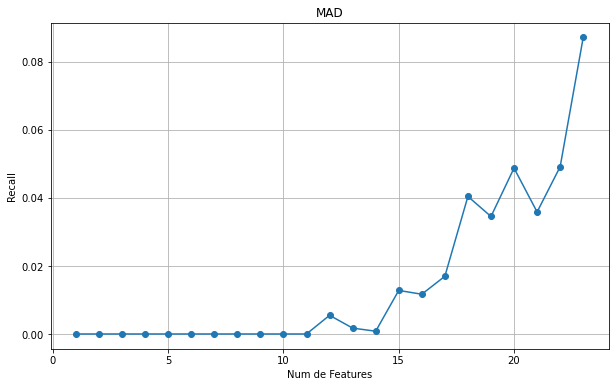

este es el valor de mejor_recall_clase_4: 0.0871685461749466
estos son los valores de recall_values: [0.08026008 0.05648684 0.06705273 0.03677741 0.02357005 0.02224931
 0.01991263 0.03718379 0.02072539 0.00721325 0.01808392 0.0183887
 0.01310576 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
------------------------------------------------------------------------------------------
Valores finales de iteracion_values: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
Valores finales de recall_values: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0131057604388905, 0.0183887026313115, 0.0180839175048257, 0.0072132479934979, 0.0207253886010362, 0.0371837854312709, 0.0199126282637407, 0.0222493142334654, 0.0235700497815706, 0.0367774052626231, 0.067052727826882, 0.05648684344204, 0.0802600833079345, 0.0871685461749466)


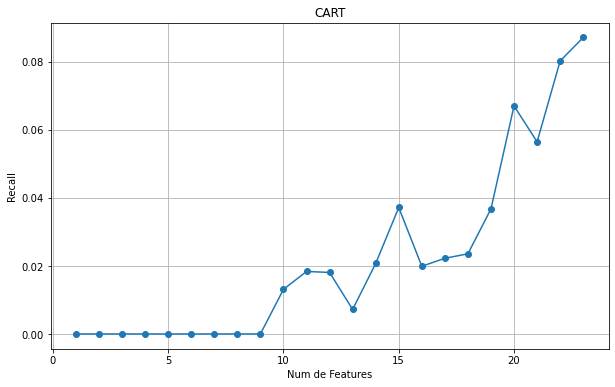

este es el valor de mejor_recall_clase_4: 0.0871685461749466
estos son los valores de recall_values: [0.00843239 0.01107386 0.00568932 0.01310576 0.00071117 0.00111755
 0.00081276 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
------------------------------------------------------------------------------------------
Valores finales de iteracion_values: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
Valores finales de recall_values: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008127603372955, 0.0011175454637813, 0.0007111652951335, 0.0131057604388905, 0.0056893223610687, 0.0110738595956517, 0.0084323884994412, 0.0871685461749466)


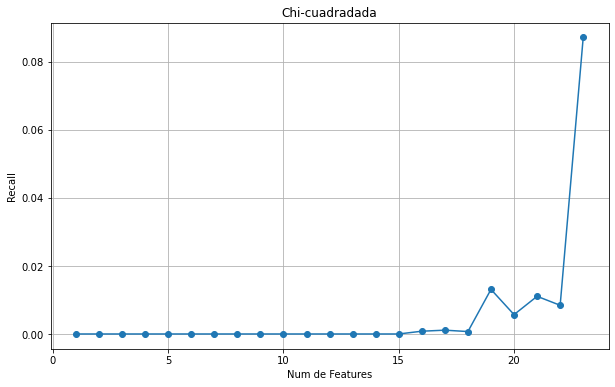

este es el valor de mejor_recall_clase_4: 0.0871685461749466
estos son los valores de recall_values: [0.0410444  0.03667581 0.0347455  0.02834502 0.0163568  0.01300417
 0.01137864 0.02621152 0.00314945 0.01808392 0.01341055 0.00162552
 0.00365742 0.0001016  0.00071117 0.         0.         0.
 0.         0.         0.         0.        ]
------------------------------------------------------------------------------------------
Valores finales de iteracion_values: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
Valores finales de recall_values: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0007111652951335, 0.0001015950421619, 0.0036574215178299, 0.001625520674591, 0.0134105455653764, 0.0180839175048257, 0.0031494463070202, 0.0262115208777811, 0.0113786447221375, 0.0130041653967286, 0.0163568017880727, 0.0283450167631819, 0.0347455044193843, 0.0366758102204612, 0.0410443970334247, 0.0871685461749466)


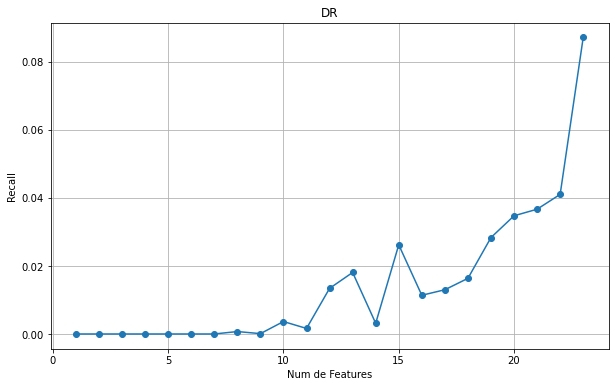

este es el valor de mejor_recall_clase_4: 0.0871685461749466
estos son los valores de recall_values: [0.05211826 0.03931728 0.05374378 0.03362796 0.0205222  0.02438281
 0.01879508 0.04460022 0.02306207 0.02773545 0.00132074 0.01188662
 0.         0.00558773 0.02641471 0.         0.         0.
 0.         0.         0.         0.        ]
------------------------------------------------------------------------------------------
Valores finales de iteracion_values: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
Valores finales de recall_values: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.026414710962105, 0.0055877273189068, 0.0, 0.0118866199329472, 0.0013207355481052, 0.0277354465102103, 0.0230620745707609, 0.0446002235090927, 0.0187950827999593, 0.0243828101188662, 0.0205221985167123, 0.0336279589556029, 0.0537437773036675, 0.0393172813166717, 0.0521182566290765, 0.0871685461749466)


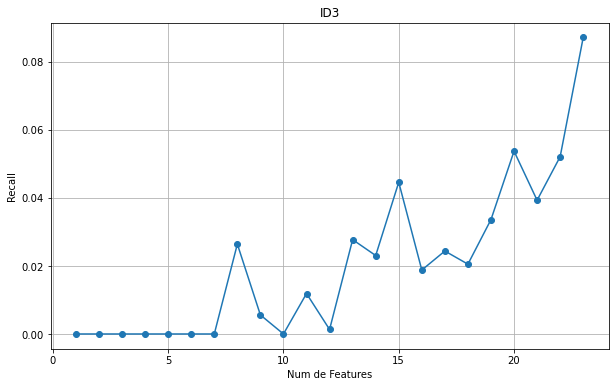

este es el valor de mejor_recall_clase_4: 0.0871685461749466
estos son los valores de recall_values: [0.03332317 0.03433912 0.03748857 0.02296048 0.03830133 0.03149446
 0.0163568  0.01462969 0.01808392 0.00264147 0.01605202 0.00040638
 0.00060957 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
------------------------------------------------------------------------------------------
Valores finales de iteracion_values: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
Valores finales de recall_values: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006095702529716, 0.0004063801686477, 0.0160520166615869, 0.0026414710962105, 0.0180839175048257, 0.0146296860713197, 0.0163568017880727, 0.0314944630702021, 0.0383013308950523, 0.022960479528599, 0.0374885705577567, 0.0343391242507365, 0.0333231738291171, 0.0871685461749466)


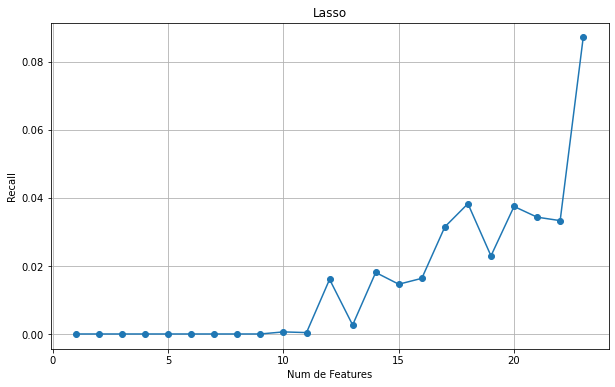

este es el valor de mejor_recall_clase_4: 0.0871685461749466
estos son los valores de recall_values: [0.05018795 0.05181347 0.03210403 0.02743066 0.03200244 0.02235091
 0.02194453 0.03139287 0.02092858 0.00538454 0.02092858 0.00142233
 0.00538454 0.00132074 0.         0.00172712 0.         0.
 0.         0.         0.         0.        ]
------------------------------------------------------------------------------------------
Valores finales de iteracion_values: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
Valores finales de recall_values: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001727115716753, 0.0, 0.0013207355481052, 0.0053845372345829, 0.0014223305902671, 0.0209285786853601, 0.0053845372345829, 0.0209285786853601, 0.0313928680280402, 0.0219445291069795, 0.0223509092756273, 0.0320024382810118, 0.0274306613837244, 0.0321040333231738, 0.0518134715025906, 0.0501879508279995, 0.0871685461749466)


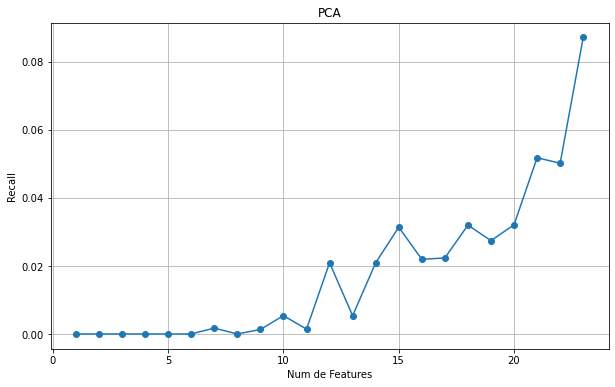

este es el valor de mejor_recall_clase_4: 0.0871685461749466
estos son los valores de recall_values: [0.08574622 0.08046327 0.05994107 0.00538454 0.01168343 0.00040638
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
------------------------------------------------------------------------------------------
Valores finales de iteracion_values: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
Valores finales de recall_values: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0004063801686477, 0.0116834298486233, 0.0053845372345829, 0.059941074875546, 0.0804632733922584, 0.0857462155846794, 0.0871685461749466)


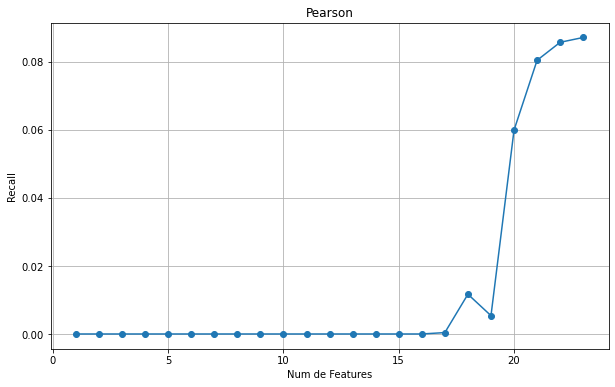

este es el valor de mejor_recall_clase_4: 0.0871685461749466
estos son los valores de recall_values: [0.05953469 0.05232145 0.02844661 0.01148024 0.0020319  0.
 0.01696637 0.         0.         0.         0.00467337 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
------------------------------------------------------------------------------------------
Valores finales de iteracion_values: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
Valores finales de recall_values: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0046733719394493, 0.0, 0.0, 0.0, 0.0169663720410443, 0.0, 0.0020319008432388, 0.0114802397642995, 0.0284466118053439, 0.0523214467134003, 0.0595346947068983, 0.0871685461749466)


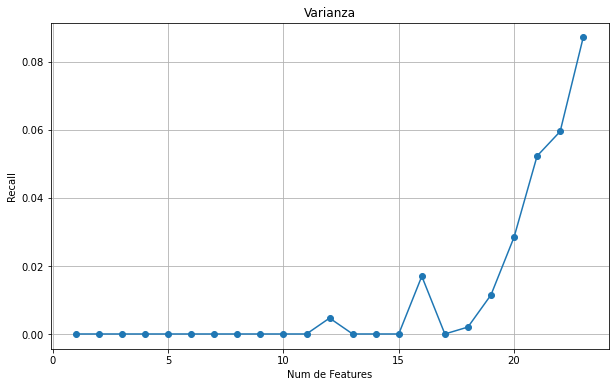

este es el valor de mejor_recall_clase_4: 0.0871685461749466
estos son los valores de recall_values: [0.05953469 0.05232145 0.02844661 0.01148024 0.0020319  0.
 0.01696637 0.         0.         0.         0.00467337 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
------------------------------------------------------------------------------------------
Valores finales de iteracion_values: (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)
Valores finales de recall_values: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0046733719394493, 0.0, 0.0, 0.0, 0.0169663720410443, 0.0, 0.0020319008432388, 0.0114802397642995, 0.0284466118053439, 0.0523214467134003, 0.0595346947068983, 0.0871685461749466)


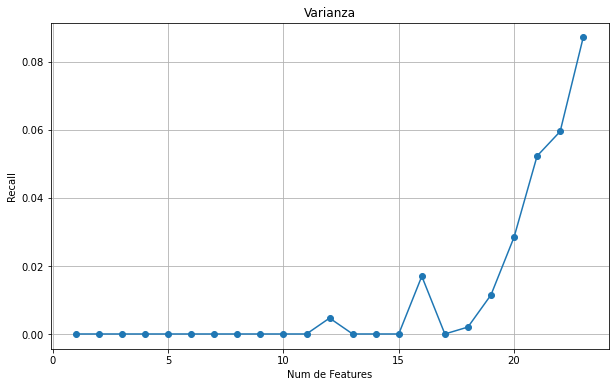

este es el valor de mejor_recall_clase_4: 0.0871685461749466
estos son los valores de recall_values: [0.00081276 0.         0.         0.         0.         0.        ]
------------------------------------------------------------------------------------------
Entré a Varianza y Centralidad
Valores finales de iteracion_values: (1, 2, 4, 5, 8, 12, 13, 23)
Valores finales de recall_values: (0.0, 0.0, 0.0, 0.0, 0.0, 0.000203190084323885, 0.0008127603372955, 0.0871685461749466)


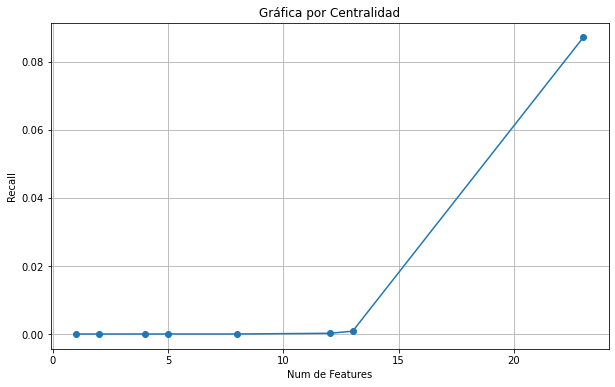

este es el valor de mejor_recall_clase_4: 0.0871685461749466
estos son los valores de recall_values: [0.00081276 0.         0.         0.         0.         0.        ]
------------------------------------------------------------------------------------------
Entré a Varianza y Centralidad
Valores finales de iteracion_values: (1, 2, 4, 5, 8, 12, 13, 23)
Valores finales de recall_values: (0.0, 0.0, 0.0, 0.0, 0.0, 0.000203190084323885, 0.0008127603372955, 0.0871685461749466)


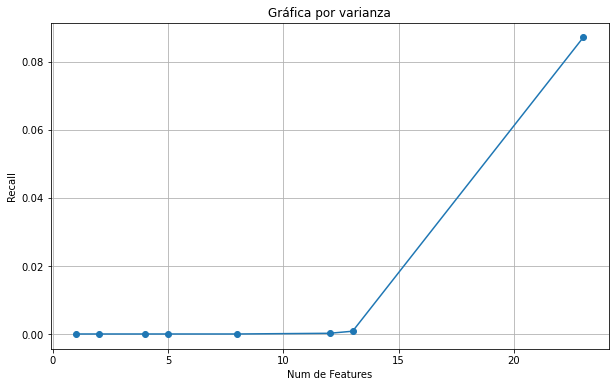

este es el valor de mejor_recall_clase_4: 0.0871685461749466
estos son los valores de recall_values: [0.0001016 0.        0.        0.        0.        0.        0.       ]
------------------------------------------------------------------------------------------
Entré a CART e ID3
Valores finales de iteracion_values: (1, 2, 3, 5, 6, 9, 12, 14, 23)
Valores finales de recall_values: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000203190084323885, 0.0001015950421619, 0.0871685461749466)


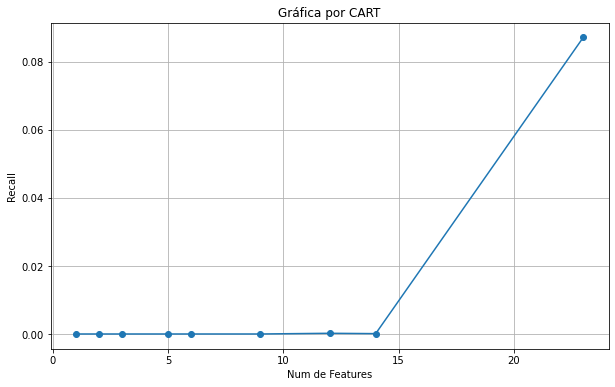

este es el valor de mejor_recall_clase_4: 0.0871685461749466
estos son los valores de recall_values: [0.00101595 0.         0.         0.         0.         0.
 0.        ]
------------------------------------------------------------------------------------------
Entré a CART e ID3
Valores finales de iteracion_values: (1, 2, 3, 5, 6, 9, 12, 14, 23)
Valores finales de recall_values: (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000203190084323885, 0.0010159504216194, 0.0871685461749466)


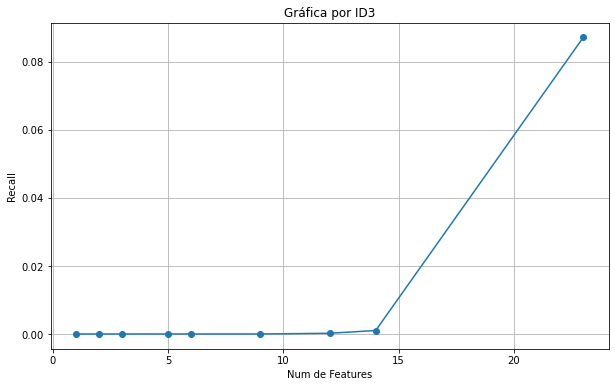

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def graficar_recall_con_punto_adicional(nombre_archivo_mad, nombre_archivo_completo, titulo_grafica):

    # Cargar los datos
    df_mejores_modelos_mad = pd.read_csv(nombre_archivo_mad)
    df_mejores_modelos_completo = pd.read_csv(nombre_archivo_completo)

    # Extraer el mejor recall de la clase 4
    mejor_recall_clase_4 = df_mejores_modelos_completo['Mejor_Recall_Clase_4'].values[0]
    print('este es el valor de mejor_recall_clase_4:', mejor_recall_clase_4)
    
    # Extraer los valores de recall
    recall_values = df_mejores_modelos_mad['Recall'].values.flatten()
    print('estos son los valores de recall_values:', recall_values)
    print('---' * 30)
    
    # Determinar los valores del eje X (iteraciones o número de características)
    if nombre_archivo_mad in ['Aa_Mejores_Modelos_Graficas_centralidad_SEGUNDO_clase4.csv', 
                              'Aa_Mejores_Modelos_Graficas_Varianza_SEGUNDO_clase4.csv']:
        print('Entré a Varianza y Centralidad')
        iteracion_values = [13, 8, 5, 4, 2, 1] 
        # Agregar el punto adicional en (12, 0.000203190084323885)
        iteracion_values.append(12)
        recall_values = np.append(recall_values, 0.000203190084323885)
        
    elif nombre_archivo_mad in ['Aa_Mejores_Modelos_Graficas_CART_SEGUNDO_clase4.csv',
                                'Aa_Mejores_Modelos_Graficas_ID3_SEGUNDO_clase4.csv']:
        print('Entré a CART e ID3')
        iteracion_values = [14, 9, 6, 5, 3, 2, 1] 
        # Agregar el punto adicional en (12, 0.000203190084323885)
        iteracion_values.append(12)
        recall_values = np.append(recall_values, 0.000203190084323885)
        
    else:
        # Para otros archivos, generar una lista descendente de números a partir de 22
        iteracion_values = list(range(22, 22 - len(df_mejores_modelos_mad), -1))

    # Agregar el mejor recall de la clase 4 al inicio
    iteracion_values.append(23)
    recall_values = np.append(recall_values, mejor_recall_clase_4)

    # Ordenar ambos arrays basados en iteracion_values
    iteracion_values, recall_values = zip(*sorted(zip(iteracion_values, recall_values)))

    print('Valores finales de iteracion_values:', iteracion_values)
    print('Valores finales de recall_values:', recall_values)
    
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(iteracion_values, recall_values, marker='o')
    
    plt.xlabel('Num de Features')
    plt.ylabel('Recall')
    plt.title(titulo_grafica)
    plt.grid(True)

    # Mostrar la gráfica
    plt.show()
    
    

nombre_archivo_graficar= 'Aa_Mejores_Modelos_MAD_SEGUNDO_clase4.csv'
nombre_archivo_completo = 'Aa_Mejores_Modelos_CCOMPLETO_CLASE4.csv'
titulo_grafica = 'MAD'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)



nombre_archivo_graficar = 'Aa_Mejores_Modelos_CART_SEGUNDO_clase4.csv'
titulo_grafica = 'CART'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)




nombre_archivo_graficar = 'Aa_Mejores_Modelos_Chi-cuadradada_SEGUNDO_clase4.csv'
titulo_grafica = 'Chi-cuadradada'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)



nombre_archivo_graficar = 'Aa_Mejores_Modelos_DR_SEGUNDO_clase4.csv'
titulo_grafica = 'DR'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)



nombre_archivo_graficar = 'Aa_Mejores_Modelos_ID3_SEGUNDO_clase4.csv'
titulo_grafica = 'ID3'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)



nombre_archivo_graficar = 'Aa_Mejores_Modelos_Lasso_SEGUNDO_clase4_corregido.csv'
titulo_grafica = 'Lasso'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)




nombre_archivo_graficar = 'Aa_Mejores_Modelos_PCA_SEGUNDO_clase4.csv'
titulo_grafica = 'PCA'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)



nombre_archivo_graficar = 'Aa_Mejores_Modelos_Pearson_SEGUNDO_clase4.csv'
titulo_grafica = 'Pearson'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)


nombre_archivo_graficar = 'Aa_Mejores_Modelos_Varianza_SEGUNDO_clase4.csv'
titulo_grafica = 'Varianza'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)


nombre_archivo_graficar = 'Aa_Mejores_Modelos_Varianza_SEGUNDO_clase4.csv'
titulo_grafica = 'Varianza'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)



nombre_archivo_graficar = 'Aa_Mejores_Modelos_Graficas_centralidad_SEGUNDO_clase4.csv'
titulo_grafica = 'Gráfica por Centralidad'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)


nombre_archivo_graficar = 'Aa_Mejores_Modelos_Graficas_Varianza_SEGUNDO_clase4.csv'
titulo_grafica = 'Gráfica por varianza'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)


nombre_archivo_graficar = 'Aa_Mejores_Modelos_Graficas_CART_SEGUNDO_clase4.csv'
titulo_grafica = 'Gráfica por CART'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)


nombre_archivo_graficar = 'Aa_Mejores_Modelos_Graficas_ID3_SEGUNDO_clase4.csv'
titulo_grafica = 'Gráfica por ID3'
graficar_recall_con_punto_adicional(nombre_archivo_graficar, nombre_archivo_completo, titulo_grafica)



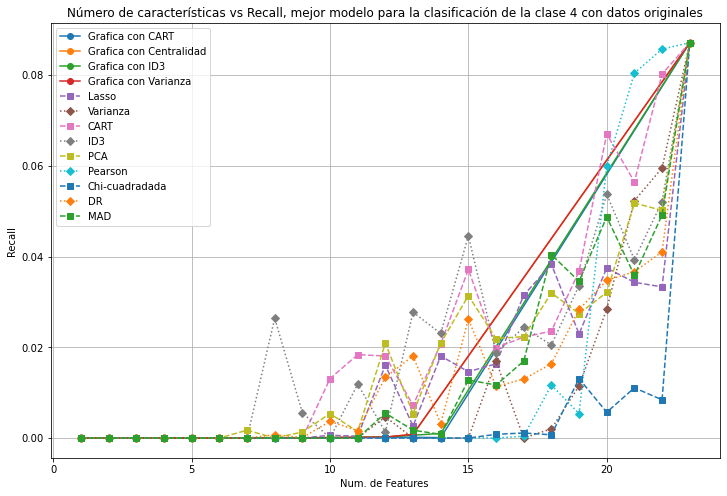

Mejores 5 valores de Recall por iteración (excepto iteraciones 23 y 1):

Iteración 1:
  0.0000  Grafica con CART
  0.0000  Grafica con Centralidad
  0.0000  Grafica con ID3
  0.0000  Grafica con Varianza
  0.0000  Lasso
  0.0000  Varianza

Iteración 2:
  0.0000  Grafica con CART
  0.0000  Grafica con Centralidad
  0.0000  Grafica con ID3
  0.0000  Grafica con Varianza
  0.0000  Lasso
  0.0000  Varianza

Iteración 3:
  0.0000  Grafica con CART
  0.0000  Grafica con ID3
  0.0000  Lasso
  0.0000  Varianza
  0.0000  CART
  0.0000  ID3

Iteración 5:
  0.0000  Grafica con CART
  0.0000  Grafica con Centralidad
  0.0000  Grafica con ID3
  0.0000  Grafica con Varianza
  0.0000  Lasso
  0.0000  Varianza

Iteración 6:
  0.0000  Grafica con CART
  0.0000  Grafica con ID3
  0.0000  Lasso
  0.0000  Varianza
  0.0000  CART
  0.0000  ID3

Iteración 9:
  0.0056  ID3
  0.0013  PCA
  0.0001  DR
  0.0000  Grafica con CART
  0.0000  Grafica con ID3
  0.0000  Lasso

Iteración 12:
  0.0209  PCA
  0.0181  CA

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Estilos para las líneas y puntos
# Todos los que contienen "Gráficas" tendrán el mismo estilo
estilo_graficas = {'linestyle': '-', 'marker': 'o'}
# Los otros tendrán dos estilos diferentes para diferenciarlos
estilo_otros1 = {'linestyle': '--', 'marker': 's'}
estilo_otros2 = {'linestyle': ':', 'marker': 'D'}

def graficar_y_calcular_max(nombre_archivos_graficar, nombre_archivo_completo):
    plt.figure(figsize=(12, 8))
    valores_maximos = {}
    legend_labels = []  # Almacena los labels que serán usados en la leyenda

    for index, (nombre_archivo, titulo_grafica) in enumerate(nombre_archivos_graficar.items()):

        df_mejores_modelos = pd.read_csv(nombre_archivo)
        df_mejores_modelos_completo = pd.read_csv(nombre_archivo_completo)

        # Extraer el mejor recall de la clase 4
        mejor_recall_clase_4 = df_mejores_modelos_completo['Mejor_Recall_Clase_4'].values[0]
        recall_values = df_mejores_modelos['Recall'].values.flatten()

        # Determinar los valores del eje X (iteraciones o número de características)
        if nombre_archivo in ['Aa_Mejores_Modelos_Graficas_centralidad_SEGUNDO_clase4.csv', 
                              'Aa_Mejores_Modelos_Graficas_Varianza_SEGUNDO_clase4.csv']:
            iteracion_values = [13, 8, 5, 4, 2, 1]
            # Insertar el punto adicional en (12, 0.6716)
            iteracion_values.insert(0, 12)
            recall_values = np.insert(recall_values, 0, 0.000203190084323885)
        
        elif nombre_archivo in ['Aa_Mejores_Modelos_Graficas_CART_SEGUNDO_clase4.csv',
                                'Aa_Mejores_Modelos_Graficas_ID3_SEGUNDO_clase4.csv']:
            iteracion_values = [14, 9, 6, 5, 3, 2, 1]
            # Insertar el punto adicional en (12, 0.000203190084323885)
            iteracion_values.insert(0, 12)
            recall_values = np.insert(recall_values, 0, 0.000203190084323885)
            
        else:
            iteracion_values = list(range(22, 22 - len(df_mejores_modelos), -1))

        # Insertar el valor correspondiente al mejor recall clase 4 al inicio
        iteracion_values.insert(0, 23)
        recall_values = np.insert(recall_values, 0, mejor_recall_clase_4)
        
        # Ordenar ambos arrays basados en iteracion_values
        iteracion_values, recall_values = zip(*sorted(zip(iteracion_values, recall_values)))
    
        # Graficar si hay valores disponibles
        if len(iteracion_values) > 0 and len(recall_values) > 0:
            # Asignar estilos según el nombre del archivo
            if "Grafica" in titulo_grafica:
                plt.plot(iteracion_values, recall_values, label=titulo_grafica, **estilo_graficas)
            elif index % 2 == 0:
                plt.plot(iteracion_values, recall_values, label=titulo_grafica, **estilo_otros1)
            else:
                plt.plot(iteracion_values, recall_values, label=titulo_grafica, **estilo_otros2)

            legend_labels.append(titulo_grafica)

        # Guardar valores máximos para cada iteración
        for i, iteracion in enumerate(iteracion_values):
            if iteracion not in valores_maximos:
                valores_maximos[iteracion] = []
            
            # Añadir el valor y el método correspondiente a la lista de la iteración
            valores_maximos[iteracion].append({'valor': recall_values[i], 'metodo': titulo_grafica})

    plt.xlabel('Num. de Features ')
    plt.ylabel('Recall')
    plt.title('Número de características vs Recall, mejor modelo para la clasificación de la clase 4 con datos originales')
    plt.grid(True)

    # Añadir la leyenda solo si hay etiquetas
    if legend_labels:
        plt.legend()
    else:
        print("No hay datos suficientes para generar una leyenda.")

    plt.show()

    # Excluir iteraciones 23 y 1
    iteraciones_excluir = [24, 0]
    
    # Mostrar los mejores 5 valores de Recall por iteración
    print("Mejores 5 valores de Recall por iteración (excepto iteraciones 23 y 1):")
    for iteracion, valores in valores_maximos.items():
        if iteracion not in iteraciones_excluir:
            # Ordenar los valores en orden descendente
            valores_ordenados = sorted(valores, key=lambda x: x['valor'], reverse=True)

            # Tomar los 5 primeros valores o los que haya disponibles
            mejores_valores = valores_ordenados[:6]
            
            # Imprimir los resultados para la iteración
            print(f"\nIteración {iteracion}:")
            for valor_info in mejores_valores:
                print(f"  {valor_info['valor']:.4f}  {valor_info['metodo']}")

# Definición de la variable nombre_archivos_graficar fuera de la función
nombre_archivos_graficar = {
    'Aa_Mejores_Modelos_Graficas_CART_SEGUNDO_clase4.csv': 'Grafica con CART',
    'Aa_Mejores_Modelos_Graficas_centralidad_SEGUNDO_clase4.csv': 'Grafica con Centralidad',
    'Aa_Mejores_Modelos_Graficas_ID3_SEGUNDO_clase4.csv': 'Grafica con ID3',
    'Aa_Mejores_Modelos_Graficas_Varianza_SEGUNDO_clase4.csv': 'Grafica con Varianza',
    'Aa_Mejores_Modelos_Lasso_SEGUNDO_clase4_corregido.csv': 'Lasso',
    'Aa_Mejores_Modelos_Varianza_SEGUNDO_clase4.csv': 'Varianza',
    'Aa_Mejores_Modelos_CART_SEGUNDO_clase4.csv': 'CART',
    'Aa_Mejores_Modelos_ID3_SEGUNDO_clase4.csv': 'ID3',
    'Aa_Mejores_Modelos_PCA_SEGUNDO_clase4.csv': 'PCA',
    'Aa_Mejores_Modelos_Pearson_SEGUNDO_clase4.csv': 'Pearson',
    'Aa_Mejores_Modelos_Chi-cuadradada_SEGUNDO_clase4.csv': 'Chi-cuadradada',
    'Aa_Mejores_Modelos_DR_SEGUNDO_clase4.csv': 'DR',
    'Aa_Mejores_Modelos_MAD_SEGUNDO_clase4.csv': 'MAD'
}

nombre_archivo_completo = 'Aa_Mejores_Modelos_CCOMPLETO_CLASE4.csv'
graficar_y_calcular_max(nombre_archivos_graficar, nombre_archivo_completo)


     Iteración  Recall                   Método
0            1  0.0000         Grafica con CART
1            1  0.0000  Grafica con Centralidad
2            1  0.0000          Grafica con ID3
3            1  0.0000     Grafica con Varianza
4            1  0.0000                    Lasso
..         ...     ...                      ...
105         22  0.0857                  Pearson
106         22  0.0803                     CART
107         22  0.0595                 Varianza
108         22  0.0521                      ID3
109         22  0.0502                      PCA

[110 rows x 3 columns]
     Iteración  Recall                   Método
0            1  0.0000         Grafica con CART
1            1  0.0000  Grafica con Centralidad
2            1  0.0000          Grafica con ID3
3            1  0.0000     Grafica con Varianza
4            1  0.0000                    Lasso
..         ...     ...                      ...
108         22  0.0521                      ID3
105         22  